<a href="https://www.kaggle.com/code/aditidutta/learning-more-about-the-kaggle-community?scriptVersionId=114296427" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div class="alert alert-block alert-info"><p style="text-align:center;"> <span style="font-size:30px;"> <b> Kaggle Survey Analysis 2022  </b> </span> </p></div>

![KagglePic](https://storage.googleapis.com/kaggle-competitions/kaggle/23724/logos/header.png?t=2020-10-31-23-22-58)

Kaggle has been a platform of interest for people looking to learn more, especially for the students. In recent years, it has provided people at various stages of professional and academic levels to explore their knowledge further and learn from the thriving community, by means of multiple competitions, projects and much more. 

> "Kaggle allows users to find and publish data sets, explore and build models in a web-based data-science environment, work with other data scientists and machine learning engineers, and enter competitions to solve data science challenges."  
<br><center>- <i>Source: Wikipedia</i> </center><br>

Hence, it comes as no surprise when this year's survey received <b>23,997</b> responses! 

This gives us an opportunity to learn more about the community we are a part of. As the [summary](https://www.kaggle.com/kaggle-survey-2022) of the survey suggests, the intention of conducting it was to learn about the different backgrounds of the Data Scientist practitioners (or beginners), their preferred technologies and techniques to get a comprehensive view of the current state of Data Science and Machine Learning. 

## Motivation

Before we start, I would like to take a moment to state my motivation for taking up this challenge again this year. Last year, I had performed a similar analysis (_unfortunately could not participate in the competition though!_) of the survey, and it helped me understand where I stand in terms of experience and use of best practices. 
<br>You can find the report in [<b><i>here</i></b>](https://www.kaggle.com/code/aditidutta/learning-about-my-fellow-kagglers).<br>

So this year, I have taken up another attempt at working on exploratory data analysis like last time to test my skills further. And like before, to enhance my creativity skills, I mostly used Plotly, especially because it enabled me to use beautiful interactive visualizations to support my analysis. This notebook is mostly a product of my experimentation with different kinds of graphs and my attempt at making a meaningful story out of the survey. I hope I was also able to learn quite a bit about my fellow Kagglers in the process! 

I am going to focus on trying to understand certain graphical interpretations/observations and see if it helps in answering certain questions. I hope you guys are there with me in this journey and see if we can explore together on this.

![GetStarted](https://media.tenor.com/-PZyCr5qP0EAAAAC/lets-get-started-lets-go.gif)


## Abstract

This is Kaggle's sixth online survey, and true to its data science community, it has given us an opportunity to explore and learn more about the global, diverse, and dynamic nature of the data science and machine learning industry. Being new to the community, I am awed by the variety of questions Kaggle put forward which gave me a better picture in understanding more about the industry (virtually) and try deciphering certain trends/representations/views which are popular currently, adding to the already comprehensive list of questions from last year.

On the first look, some changes in the question and answer patterns are observed which is quite interesting to look at, and could give us a different perspective of analysing the data from before. Let's decipher them step by step with the help of a data story.

><div class="alert alert-block alert-danger">
<b>Disclaimer:</b> <i>Like the competition overview suggest, the data and by extension, the observations from the survey represent only a subset of the data science community. Please note that any unusual observations in the survey may vary from a general observations in the whole community.</i>
</div>

In [1]:
!pip install circlify
!pip install venn

  Preparing metadata (setup.py) ... - done
  Created wheel for venn: filename=venn-0.1.3-py3-none-any.whl size=19716 sha256=ae65456fe68661035871a2b85e5bc6a24e349bc2977d5cb0d05e03292ff0f88c
  Stored in directory: /root/.cache/pip/wheels/85/8c/61/85a84e4c69c79c6475b9689755fc4ee4dae0bdc32b101011cb
Successfully built venn


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.graph_objs as go
import plotly.offline as pyo
import plotly.figure_factory as ff
import plotly.express as px
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot
import plotly.io as pio
from PIL import Image
import circlify
from venn import venn
import gc
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.



In [3]:
df = pd.read_csv('../input/kaggle-survey-2022/kaggle_survey_2022_responses.csv')
df = df.iloc[1:,:] #The first row was describing the columns

## Age of the participants

Now, Kaggle has time and again proved to be a go-to platform for Data Science (DS) enthusiasts across all age. The following graph depicts the same.

In [4]:
blue_colors = ['#189AB4', '#00B5F7','#17BECF','#19D3FE', '#2ED9FF','#0DF9F7', '#1CFFCE','rgb(179,226,205)','rgb(204, 235, 197)','#E6E6E6']

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "bar"}, {"type": "pie"}]])

n_ages = df['Q2'].value_counts().reset_index(name='total')

fig.add_trace(go.Bar(
     x=n_ages['index'], y=n_ages['total'], showlegend=False,
    text =n_ages['total'],
     name="Age-groups"), 
     row=1, col=1)
fig.update_yaxes(visible=False, range=[0,5500])
fig.update_xaxes(categoryarray= ['18-21', '22-24', '25-29','30-34', 
                                 '35-39', '40-44', '45-49', '50-54',    
                                 '55-59', '60-69', '70+'])
fig.update_traces(textposition='outside', marker_color=blue_colors, marker_line_color='rgb(8,48,107)',  marker_line_width=1.5, opacity=0.6)


n_agegroup  = n_ages['index'].values

fig.add_trace(go.Pie(
     values=n_ages['total'],
     labels=n_agegroup, pull=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05], hole=.3, 
    marker_colors=blue_colors, opacity=0.6,
     name="Age-groups"),
    row=1, col=2)


fig.update_layout(title_text='Age groups of the participants', title_x=0.5, title_y=0.94,
                  template="plotly_white",
                 legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5))


fig.show()

We can see from the graphs that most fo the participants are young, falling in the age range of <b>18-29</b>. This could explain the huge popularity of DS among the youngsters. Given the rise in job opportunities in DS (60-70% of which are entry-level jobs), acquiring relevant skills is of the utmost importance. For which, a platform like Kaggle comes to play. With sufficient time and experience, it makes them 'market-ready' and provides them with ample exposure.
>["Data science is a large umbrella term and not a specific skill-set."](https://analyticsindiamag.com/why-data-science-skills-are-the-best-bet-for-youth/)

Though the number of participants above 50 years of age looks small, their participation is commendable, proving the point that one can never be _'too old for Data Science'_. For older career changers or people looking to learn more after retirement, seeking new challenges in DS could be a bit daunting. But by no means, does it undermine their interest. Ageism has always been an issue in tech, yet their experience could benefit their journey and hence be promoted

With the companies understanding the value of data science and hiring people to enrich their data and make it better, it is imperative that the applicants and workers demostrate the necessary skillset to help the companies in their road to success. And this is where Kaggle plays a huge role. Providing people from different age-groups to learn and interact with one another. By providing an online community platform, it helps the budding aspirants and the experts connect. By sharing knowledge, providing online courses, hosting competitions, discussions, etc., it is helping the community to learn from one another and enhance their skills at the same time.


## Gender ratio among the participants

Like ageism, the gender gap has also been an issue in tech. In the real world, it is seen that even though women take up a large portion of the working community, they still lack behind in the techinical sectors by a huge margin.

In [5]:
blue_colors = ['#0099C6','#1CFFCE','rgb(179,226,205)','#E6E6E6']

df_q2_q3 = df.copy()
df_q2_q3 = pd.crosstab(df_q2_q3['Q2'], df_q2_q3['Q3']).reset_index()

fig = go.Figure()
fig.add_trace(go.Bar(x=df_q2_q3['Q2'], y=df_q2_q3['Man'], name = "Man",
                 marker_color = 'rgb(0, 134, 149)', text = df_q2_q3['Man'], textposition = "outside",
))
fig.add_trace(go.Bar(x=df_q2_q3['Q2'], y=-df_q2_q3['Woman'], name = "Woman",
            marker_color = 'orange', text = df_q2_q3['Woman'], textposition = "outside"))
fig.add_trace(go.Bar(x=df_q2_q3['Q2'], y=-df_q2_q3['Nonbinary'], name = "Nonbinary",
            marker_color = '#316395', text = df_q2_q3['Nonbinary'], textposition = "outside"))
fig.add_trace(go.Bar(x=df_q2_q3['Q2'], y=-df_q2_q3['Prefer not to say'], name = "Prefer not to say",
            marker_color = 'rgb(179, 226, 205)', text = df_q2_q3['Prefer not to say'], textposition = "outside"))
fig.add_trace(go.Bar(x=df_q2_q3['Q2'], y=-df_q2_q3['Prefer to self-describe'], name = "Prefer to self-describe",
            marker_color = 'rgb(102,102,102)', text = df_q2_q3['Prefer to self-describe'], textposition = "outside"))
fig.add_annotation(
        x=5.5,
        y=3598,
        xref="x",
        yref="y",
        text="Male participants form more than half of the survey",
        showarrow=False,
            yshift=10,
        bgcolor="#ffffff",
        opacity=0.8
        )

fig.add_shape(type='line',
                x0=-0.5,
                y0=0.31,
                x1=11,
                y1=0.31,
                line=dict(color='black', dash='dot'),
                xref='x',
                yref='paper'
)

fig.update_layout(barmode='relative',
    title_text='Gender Ratio based on age groups', template="plotly_white",
    height=500, title_x = 0.5, yaxis_title=" ", 
    legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5)
)

#fig.update_xaxes(visible=True, categoryorder='total descending')
fig.update_xaxes(visible=True, categoryarray= ['18-21', '22-24', '25-29','30-34', 
                                 '35-39', '40-44', '45-49', '50-54',    
                                 '55-59', '60-69', '70+'])
fig.update_yaxes(visible=False, range=[-2000,4500])

And the same is portrayed through the graph, where we see that more than half of the survey participants are males. While the participation of women younger women are comparitively more, the male-female ratio seem to have decreased as we go over the age of 40, till 59.

Interestingly enough, other/undeclared genders (i.e., genders aside from men and women) are shown to have very less participation. But if we follow the trend observed in this survey, even though it corresponds to the real world, we can say that the other genders are gradually working to become more prominant in the tech industry. And it won't be long until we see more of their participation!


### Gender participation based on countries
Following the previous plot, let us now check where the participants are based at.


In [6]:
df_q3_q4 = df[['Q3', 'Q4']]

n_undisclosed_loc= df_q3_q4.loc[df_q3_q4.Q4 == 'I do not wish to disclose my location', 'Q4'].count()
n_other_loc= df_q3_q4.loc[df_q3_q4.Q4 == 'Other', 'Q4'].count()

df_q3_q4 = df_q3_q4[(df_q3_q4['Q4'] != 'I do not wish to disclose my location') & (df_q3_q4['Q4'] != 'Other')]

#Matching the names with the ISO code
df_q3_q4['Q4'] = np.where((df_q3_q4['Q4'] == 'United States of America'),'United States',df_q3_q4['Q4'])
df_q3_q4['Q4'] = np.where((df_q3_q4['Q4'] == 'United Kingdom of Great Britain and Northern Ireland'),'United Kingdom',df_q3_q4['Q4'])
df_q3_q4['Q4'] = np.where((df_q3_q4['Q4'] == 'Hong Kong (S.A.R.)'),'Hong Kong', df_q3_q4['Q4'])
df_q3_q4['Q4'] = np.where((df_q3_q4['Q4'] == 'Viet Nam'), 'Vietnam', df_q3_q4['Q4'])
df_q3_q4['Q4'] = np.where((df_q3_q4['Q4'] == 'Iran, Islamic Republic of...'), 'Iran', df_q3_q4['Q4'])

df_q3_q4_m = df_q3_q4[df_q3_q4['Q3']=='Man']
df_q3_q4_w = df_q3_q4[df_q3_q4['Q3']=='Woman']
df_q3_q4_o = df_q3_q4[(df_q3_q4['Q3'] != 'Man') & (df_q3_q4['Q3'] != 'Woman')]

n_country = df_q3_q4['Q4'].value_counts().reset_index(name='total')
n_country_m = df_q3_q4_m['Q4'].value_counts().reset_index(name='total')
n_country_w = df_q3_q4_w['Q4'].value_counts().reset_index(name='total')
n_country_o = df_q3_q4_o['Q4'].value_counts().reset_index(name='total')


fig = go.Figure(data=[go.Choropleth(locations = n_country['index'],
                                            z = n_country['total'],
                                            zmid = 3000,
                                            locationmode = 'country names',
                                            colorscale = 'RdBu', name='All'),   
                    go.Choropleth(locations = n_country_m['index'],
                                            z = n_country_m['total'],
                                            zmid = 3000,
                                            locationmode = 'country names',
                                            colorscale = 'Blues', name='Men'),
                    go.Choropleth(locations = n_country_w['index'],
                                            z = n_country_w['total'],
                                            zmid = 1500,
                                            locationmode = 'country names',
                                            colorscale = 'Peach', name='Women'),
                    go.Choropleth(locations = n_country_o['index'],
                                            z = n_country_o['total'],
                                            zmid = 80,
                                            locationmode = 'country names',
                                            colorscale = 'Greens', name='Other/Undisclosed Genders'
                                            )
                ])
fig.update_layout(
    title_text = 'Participations from each countries for all genders', title_x=0.5, title_y=0.90, height=600, width=800, 
                         geo = dict(showframe = False,
                                    showcoastlines = False,
                                    projection_type = 'equirectangular'),
    annotations = [dict(
        x=0.5,
        y=0,    #Trying a negative number makes the caption disappear - I'd like the caption to be below the map
        xref='paper',
        yref='paper',
        text=" No. of total respondants who did not wish to disclose <br> their location: " + str(n_undisclosed_loc) +
           "<br> and who are from other (unlisted) countries: " + str(n_other_loc),
        showarrow = False,
        font=dict(
                family="Muli, sans-serif",
                size=14,
                color="#ffffff"
                ),
        bordercolor="#c7c7c7",
        borderwidth=1,
        borderpad=1,
        bgcolor="#222A2A",
        opacity=0.5
    )], 
    updatemenus=[
        dict(
            active=0,
            buttons=list([
                dict(label="All",
                     method="update",
                     args=[{"visible": [True, False, False, False]}]),
                dict(label="Men",
                     method="update",
                     args=[{"visible": [False, True, False, False]}]),
                dict(label="Women",
                     method="update",
                     args=[{"visible": [False, False, True, False]}]),
                dict(label="Other/Undisclosed Genders",
                     method="update",
                     args=[{"visible": [False, False, False, True]}])
                            ]
                         ))])

fig.update_traces(showscale=False)

fig.show()

We see that most of the participants are from the Asian and American countries. They seem to cover for the vast majority of the participants across all the genders.

India clearly dominating over other countries on the number of particpation. Following behind, are USA and Brazil. The European countries and the Oceania have a fair share of participants though, especially for male and female genders. But the particpations from the Africa and the Middle-East countries seem very less. In fact, many of the countries in Africa have no participation at all. 

One possible explanation could be because of the lack of connectivity, or the access to technology, or it could be because of important socio-economic features like formal education, working with machine learning and yearly compensations.

### Student participation

One of the key addition to this edition of Kaggle survey was to see how much of their community consists of students (i.e., who are currently studying in high school, university, or graduate). Since Kaggle aims to connect people from different machine learning experience, it also can be useful to analyse the demographics of their student community and in devising additional resources as per their needs.

In [7]:
df_q2_q3_q4_q5 = df.copy()

df_q2_q3_q4_q5.Q2 = df_q2_q3_q4_q5.Q2.replace({'18-21': '18-29', '22-24': '18-29', '25-29': '18-29',
                                              '30-34': '30-44', '35-39': '30-44','40-44': '30-44',
                                              '45-49': '45+', '50-54': '45+', '55-59': '45+', '60-69': '45+', '70+': '45+'})


df_q2_q3_q4_q5 = df_q2_q3_q4_q5.groupby(['Q2', 'Q3', 'Q4', 'Q5']).size().reset_index(name='count').sort_values(by=['count'],ascending=False)

n_countries = df_q2_q3_q4_q5['Q4'].value_counts().drop(labels='Other').reset_index(name='total')[:10]['index'].to_numpy()
df_q2_q3_q4_q5 = df_q2_q3_q4_q5[df_q2_q3_q4_q5['Q4'].isin(n_countries)]

df_q2_q3_q4_q5.Q4 = df_q2_q3_q4_q5.Q4.replace({'United Kingdom of Great Britain and Northern Ireland': 'UK & N.Ireland', 
                                               'United States of America': 'USA'})
#df_q2_q3_q4_q5.Q3 = df_q2_q3_q4_q5.Q3.replace(['Prefer not to say', 'Nonbinary',
#                                                'Prefer to self-describe'], 'Others')

df_q2_q3_q4_q5_y = df_q2_q3_q4_q5[df_q2_q3_q4_q5['Q5'] == 'Yes'].drop(columns='Q5')
df_q2_q3_q4_q5_y = df_q2_q3_q4_q5_y.sort_values(by=['count'], ascending = True)
df_q2_q3_q4_q5_n = df_q2_q3_q4_q5[df_q2_q3_q4_q5['Q5'] == 'No'].drop(columns='Q5')
df_q2_q3_q4_q5_n = df_q2_q3_q4_q5_n.sort_values(by=['count'], ascending = True)

#yes
df_q2_q3_q4_q5_y_1 = df_q2_q3_q4_q5_y[(df_q2_q3_q4_q5_y['Q3'] == 'Man')].drop(columns='Q3')
df_q2_q3_q4_q5_y_2 = df_q2_q3_q4_q5_y[(df_q2_q3_q4_q5_y['Q3'] == 'Woman')].drop(columns='Q3')
df_q2_q3_q4_q5_y_3 = df_q2_q3_q4_q5_y[(df_q2_q3_q4_q5_y['Q3'] != 'Man') & (df_q2_q3_q4_q5_y['Q3'] != 'Woman')].drop(columns='Q3')

#no
df_q2_q3_q4_q5_n_1 = df_q2_q3_q4_q5_n[(df_q2_q3_q4_q5_n['Q3'] == 'Man')].drop(columns='Q3')
df_q2_q3_q4_q5_n_2 = df_q2_q3_q4_q5_n[(df_q2_q3_q4_q5_n['Q3'] == 'Woman')].drop(columns='Q3')
df_q2_q3_q4_q5_n_3 = df_q2_q3_q4_q5_n[(df_q2_q3_q4_q5_n['Q3'] != 'Man') & (df_q2_q3_q4_q5_n['Q3'] != 'Woman')].drop(columns='Q3')


#df_q2_q3_q4_q5 = pd.concat([df_q2_q3_q4_q5_1, df_q2_q3_q4_q5_2], axis=0)
#df_q2_q3_q4_q5 = pd.concat([df_q2_q3_q4_q5, df_q2_q3_q4_q5_3], axis=0)
#df_q2_q3_q4_q5 = pd.concat([df_q2_q3_q4_q5, df_q2_q3_q4_q5_4], axis=0)
#df_q2_q3_q4_q5 = pd.concat([df_q2_q3_q4_q5, df_q2_q3_q4_q5_5], axis=0)

#all
#yes
df_q2_q3_q4_q5_y_18_29 = df_q2_q3_q4_q5_y[df_q2_q3_q4_q5_y['Q2'] == '18-29']
df_q2_q3_q4_q5_y_30_44 = df_q2_q3_q4_q5_y[df_q2_q3_q4_q5_y['Q2'] == '30-44']
df_q2_q3_q4_q5_y_45 = df_q2_q3_q4_q5_y[df_q2_q3_q4_q5_y['Q2'] == '45+']
#no
df_q2_q3_q4_q5_n_18_29 = df_q2_q3_q4_q5_n[df_q2_q3_q4_q5_n['Q2'] == '18-29']
df_q2_q3_q4_q5_n_30_44 = df_q2_q3_q4_q5_n[df_q2_q3_q4_q5_n['Q2'] == '30-44']
df_q2_q3_q4_q5_n_45 = df_q2_q3_q4_q5_n[df_q2_q3_q4_q5_n['Q2'] == '45+']

#man
#yes
df_q2_q3_q4_q5_y_1_18_29 = df_q2_q3_q4_q5_y_1[df_q2_q3_q4_q5_y_1['Q2'] == '18-29']
df_q2_q3_q4_q5_y_1_30_44 = df_q2_q3_q4_q5_y_1[df_q2_q3_q4_q5_y_1['Q2'] == '30-44']
df_q2_q3_q4_q5_y_1_45 = df_q2_q3_q4_q5_y_1[df_q2_q3_q4_q5_y_1['Q2'] == '45+']
#no
df_q2_q3_q4_q5_n_1_18_29 = df_q2_q3_q4_q5_n_1[df_q2_q3_q4_q5_n_1['Q2'] == '18-29']
df_q2_q3_q4_q5_n_1_30_44 = df_q2_q3_q4_q5_n_1[df_q2_q3_q4_q5_n_1['Q2'] == '30-44']
df_q2_q3_q4_q5_n_1_45 = df_q2_q3_q4_q5_n_1[df_q2_q3_q4_q5_n_1['Q2'] == '45+']

#woman
#yes
df_q2_q3_q4_q5_y_2_18_29 = df_q2_q3_q4_q5_y_2[df_q2_q3_q4_q5_y_2['Q2'] == '18-29']
df_q2_q3_q4_q5_y_2_30_44 = df_q2_q3_q4_q5_y_2[df_q2_q3_q4_q5_y_2['Q2'] == '30-44']
df_q2_q3_q4_q5_y_2_45 = df_q2_q3_q4_q5_y_2[df_q2_q3_q4_q5_y_2['Q2'] == '45+']
#no
df_q2_q3_q4_q5_n_2_18_29 = df_q2_q3_q4_q5_n_2[df_q2_q3_q4_q5_n_2['Q2'] == '18-29']
df_q2_q3_q4_q5_n_2_30_44 = df_q2_q3_q4_q5_n_2[df_q2_q3_q4_q5_n_2['Q2'] == '30-44']
df_q2_q3_q4_q5_n_2_45 = df_q2_q3_q4_q5_n_2[df_q2_q3_q4_q5_n_2['Q2'] == '45+']

#Others
#yes
df_q2_q3_q4_q5_y_3_18_29 = df_q2_q3_q4_q5_y_3[df_q2_q3_q4_q5_y_3['Q2'] == '18-29']
df_q2_q3_q4_q5_y_3_30_44 = df_q2_q3_q4_q5_y_3[df_q2_q3_q4_q5_y_3['Q2'] == '30-44']
df_q2_q3_q4_q5_y_3_45 = df_q2_q3_q4_q5_y_3[df_q2_q3_q4_q5_y_3['Q2'] == '45+']
#no
df_q2_q3_q4_q5_n_3_18_29 = df_q2_q3_q4_q5_n_3[df_q2_q3_q4_q5_n_3['Q2'] == '18-29']
df_q2_q3_q4_q5_n_3_30_44 = df_q2_q3_q4_q5_n_3[df_q2_q3_q4_q5_n_3['Q2'] == '30-44']
df_q2_q3_q4_q5_n_3_45 = df_q2_q3_q4_q5_n_3[df_q2_q3_q4_q5_n_3['Q2'] == '45+']

fig = make_subplots(rows=1, cols=2, shared_yaxes=True, specs=[[{"type": "bar"}, {"type": "bar"}]], horizontal_spacing = 0.0005)

fig.add_trace(go.Bar(y=df_q2_q3_q4_q5_y_18_29['Q4'], x=df_q2_q3_q4_q5_y_18_29['count'], marker_color='#025043', name='18-29',
                     orientation='h', opacity=0.8), 
                     row=1, col=1)
fig.add_trace(go.Bar(y=df_q2_q3_q4_q5_y_30_44['Q4'], x=df_q2_q3_q4_q5_y_30_44['count'], marker_color='rgb(195, 88, 23)', name='30-44',
                     orientation='h', opacity=0.8), 
                     row=1, col=1)
fig.add_trace(go.Bar(y=df_q2_q3_q4_q5_y_45['Q4'], x=df_q2_q3_q4_q5_y_45['count'], marker_color='#333333', name='45+',
                     orientation='h', opacity=0.8), 
                     row=1, col=1)

fig.add_trace(go.Bar(y=df_q2_q3_q4_q5_n_18_29['Q4'], x=df_q2_q3_q4_q5_n_18_29['count'], marker_color='teal', name='18-29',
                     showlegend=False, orientation='h', opacity=0.8),
                     row=1, col=2)
fig.add_trace(go.Bar(y=df_q2_q3_q4_q5_n_30_44['Q4'], x=df_q2_q3_q4_q5_n_30_44['count'], marker_color='orange', name='30-44',
                     showlegend=False, orientation='h', opacity=0.8),
                     row=1, col=2)
fig.add_trace(go.Bar(y=df_q2_q3_q4_q5_n_45['Q4'], x=df_q2_q3_q4_q5_n_45['count'], marker_color='rgb(102,102,102)', name='45+',
                     showlegend=False, orientation='h', opacity=0.8), 
                     row=1, col=2)

fig.add_trace(go.Bar(y=df_q2_q3_q4_q5_y_1_18_29['Q4'], x=df_q2_q3_q4_q5_y_1_18_29['count'], marker_color='#025043', name='18-29',
                     orientation='h', opacity=0.8), 
                     row=1, col=1)
fig.add_trace(go.Bar(y=df_q2_q3_q4_q5_y_1_30_44['Q4'], x=df_q2_q3_q4_q5_y_1_30_44['count'], marker_color='rgb(195, 88, 23)', name='30-44',
                     orientation='h', opacity=0.8), 
                     row=1, col=1)
fig.add_trace(go.Bar(y=df_q2_q3_q4_q5_y_1_45['Q4'], x=df_q2_q3_q4_q5_y_1_45['count'], marker_color='#333333', name='45+',
                     orientation='h', opacity=0.8), 
                     row=1, col=1)

fig.add_trace(go.Bar(y=df_q2_q3_q4_q5_n_1_18_29['Q4'], x=df_q2_q3_q4_q5_n_1_18_29['count'], marker_color='teal', name='18-29',
                     showlegend=False, orientation='h', opacity=0.8),
                     row=1, col=2)
fig.add_trace(go.Bar(y=df_q2_q3_q4_q5_n_1_30_44['Q4'], x=df_q2_q3_q4_q5_n_1_30_44['count'], marker_color='orange', name='30-44',
                     showlegend=False, orientation='h', opacity=0.8),
                     row=1, col=2)
fig.add_trace(go.Bar(y=df_q2_q3_q4_q5_n_1_45['Q4'], x=df_q2_q3_q4_q5_n_1_45['count'], marker_color='rgb(102,102,102)', name='45+',
                     showlegend=False, orientation='h', opacity=0.8), 
                     row=1, col=2)

fig.add_trace(go.Bar(y=df_q2_q3_q4_q5_y_2_18_29['Q4'], x=df_q2_q3_q4_q5_y_2_18_29['count'], marker_color='#025043', name='18-29',
                     orientation='h', opacity=0.8), 
                     row=1, col=1)
fig.add_trace(go.Bar(y=df_q2_q3_q4_q5_y_2_30_44['Q4'], x=df_q2_q3_q4_q5_y_2_30_44['count'], marker_color='rgb(195, 88, 23)', name='30-44',
                     orientation='h', opacity=0.8), 
                     row=1, col=1)
fig.add_trace(go.Bar(y=df_q2_q3_q4_q5_y_2_45['Q4'], x=df_q2_q3_q4_q5_y_2_45['count'], marker_color='#333333', name='45+',
                     orientation='h', opacity=0.8), 
                     row=1, col=1)

fig.add_trace(go.Bar(y=df_q2_q3_q4_q5_n_2_18_29['Q4'], x=df_q2_q3_q4_q5_n_2_18_29['count'], marker_color='teal', name='18-29',
                     showlegend=False, orientation='h', opacity=0.8),
                     row=1, col=2)
fig.add_trace(go.Bar(y=df_q2_q3_q4_q5_n_2_30_44['Q4'], x=df_q2_q3_q4_q5_n_2_30_44['count'], marker_color='orange', name='30-44',
                     showlegend=False, orientation='h', opacity=0.8),
                     row=1, col=2)
fig.add_trace(go.Bar(y=df_q2_q3_q4_q5_n_2_45['Q4'], x=df_q2_q3_q4_q5_n_2_45['count'], marker_color='rgb(102,102,102)', name='45+',
                     showlegend=False, orientation='h', opacity=0.8), 
                     row=1, col=2)

fig.add_trace(go.Bar(y=df_q2_q3_q4_q5_y_3_18_29['Q4'], x=df_q2_q3_q4_q5_y_3_18_29['count'], marker_color='#025043', name='18-29',
                     orientation='h', opacity=0.8), 
                     row=1, col=1)
fig.add_trace(go.Bar(y=df_q2_q3_q4_q5_y_3_30_44['Q4'], x=df_q2_q3_q4_q5_y_3_30_44['count'], marker_color='rgb(195, 88, 23)', name='30-44',
                     orientation='h', opacity=0.8), 
                     row=1, col=1)
fig.add_trace(go.Bar(y=df_q2_q3_q4_q5_y_3_45['Q4'], x=df_q2_q3_q4_q5_y_3_45['count'], marker_color='#333333', name='45+',
                     orientation='h', opacity=0.8), 
                     row=1, col=1)

fig.add_trace(go.Bar(y=df_q2_q3_q4_q5_n_3_18_29['Q4'], x=df_q2_q3_q4_q5_n_3_18_29['count'], marker_color='teal', name='18-29',
                     showlegend=False, orientation='h', opacity=0.8),
                     row=1, col=2)
fig.add_trace(go.Bar(y=df_q2_q3_q4_q5_n_3_30_44['Q4'], x=df_q2_q3_q4_q5_n_3_30_44['count'], marker_color='orange', name='30-44',
                     showlegend=False, orientation='h', opacity=0.8),
                     row=1, col=2)
fig.add_trace(go.Bar(y=df_q2_q3_q4_q5_n_3_45['Q4'], x=df_q2_q3_q4_q5_n_3_45['count'], marker_color='rgb(102,102,102)', name='45+',
                     showlegend=False, orientation='h', opacity=0.8), 
                     row=1, col=2)

fig['layout']['xaxis'].update(autorange='reversed', title_text='Students')
fig['layout']['xaxis2'].update(title_text='Non-students')

fig.update_yaxes(categoryorder='array', categoryarray= df_q2_q3_q4_q5.Q4.unique(), autorange='reversed')


fig.update_layout(title_text='Contributors in top 10 participant countries based on genders and student status', title_x=0.50, title_y=0.96,
                 template="plotly_white", height=600, width=850, legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.55),
    updatemenus=[
        dict(
            active=0,
            type = "buttons",
            direction = "left",
            pad={"r": 1, "t": 1},
            showactive=True,
            x=0.001,
            xanchor="left",
            y=1.13,
            yanchor="top",
            buttons=list([
                dict(label="All",
                     method="update",
                     args=[{"visible": [True, True, True, True, True, True, 
                                       False, False, False, False, False, False,
                                       False, False, False, False, False, False,
                                       False, False, False, False, False, False]}]),
                dict(label="Man",
                     method="update",
                     args=[{"visible": [False, False, False, False, False, False,
                                       True, True, True, True, True, True, 
                                       False, False, False, False, False, False,
                                       False, False, False, False, False, False]}]),
                dict(label="Woman",
                     method="update",
                     args=[{"visible": [False, False, False, False, False, False,
                                       False, False, False, False, False, False,
                                       True, True, True, True, True, True, 
                                       False, False, False, False, False, False]}]),
                dict(label="Others",
                     method="update",
                     args=[{"visible": [False, False, False, False, False, False,
                                       False, False, False, False, False, False,
                                       False, False, False, False, False, False,
                                       True, True, True, True, True, True]}]),
                            ]
                         )),
                ])

This plot from the top 10 countries in terms of participation give us a clear picture on the popularity of the platform with respect to the participant's student status, based on their gender. 
As we can see from the plot, the age for most of the student population fall in between 18-29, as was expected since it includes high school students as well. Nevertheless, the number of students we see beyond the age of 45 years is commendable and should set a precept of why one must <b>never stop learning</b>.

As stated in this [article](https://www.babyboomers.com/article/why-go-to-study-after-45-50-years-old-/60799045e4b0b57cf5279906), each person has their own reasons for getting an education or learning a new profession in adulthood. The ultimate quote one <b>must</b> have is:
~~~
"Learn for yourself."
~~~
But we see that the proportion of the number of students aged 45 years+ are more in the West, than in the East (apart from India, though still less if compared proportionally). Both USA and Brazil setting a good example in showcasing that. The reason for lesser number in the East could be because of the socio-economical factor, where many of the opportunities are limited and cannot (read: difficult to) be pursued beyond a certain age. Some could call it 'ageism', while others blame it on the huge population in those countries (_Asian population is equivalent to 59.76% of the total world population_) which limits such pursuits.

In any case, the shear number of students and non-students using this platform across all age and genders in different countries really proves how Kaggle has proved to be a helpful engagement platform among the DS community!

### Platforms used and preferred 

As we have been discussing about the learning curve in the previous section, as a beginner or someone looking to brush up their skillset, they might seek guidence on where to go to for getting the best resources available for learning DS.

<div class="alert alert-block alert-info"> <center>"Which is the best platform for learning Data Science? 🤔" </center></div>

The abundance of choices has become a problem (or a blessing!), as it creates a lot of confusion among the learners. Having a clear path in their journey helps. But it also depends on the individuals in question, in figuring out which kind of platform(/s) work best for them. Let's check which platforms are used by the participants, and how helpful they find any (/all) of the platforms.

#### Students

In [8]:
#https://medium.com/kenlok/how-to-create-sankey-diagrams-from-dataframes-in-python-e221c1b4d6b0
def genSankey(df,cat_cols=[],value_cols='',title=''):
    # maximum of 6 value cols -> 6 colors
    colorPalette = ['#0a4963', 'orange', 'lightblue']
    labelList = []
    colorNumList = []
    for catCol in cat_cols:
        labelListTemp =  list(set(df[catCol].values))
        colorNumList.append(len(labelListTemp))
        labelList = labelList + labelListTemp
        
    # remove duplicates from labelList
    labelList = list(dict.fromkeys(labelList))
    
    # define colors based on number of levels
    colorList = []
    for idx, colorNum in enumerate(colorNumList):
        colorList = colorList + [colorPalette[idx]]*colorNum
        
    # transform df into a source-target pair
    for i in range(len(cat_cols)-1):
        if i==0:
            sourceTargetDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            sourceTargetDf.columns = ['source','target','count']
        else:
            tempDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            tempDf.columns = ['source','target','count']
            sourceTargetDf = pd.concat([sourceTargetDf,tempDf])
        sourceTargetDf = sourceTargetDf.groupby(['source','target']).agg({'count':'sum'}).reset_index()
        
    # add index for source-target pair
    sourceTargetDf['sourceID'] = sourceTargetDf['source'].apply(lambda x: labelList.index(x))
    sourceTargetDf['targetID'] = sourceTargetDf['target'].apply(lambda x: labelList.index(x))
    
    # creating the sankey diagram
    data = dict(
        type='sankey',
        node = dict(
          pad = 15,
          thickness = 20,
          line = dict(
            color = "black",
            width = 0.5
          ),
          label = labelList,
          color = colorList
        ),
        link = dict(
          source = sourceTargetDf['sourceID'],
          target = sourceTargetDf['targetID'],
          value = sourceTargetDf['count']
        )
      )
    
    layout =  dict(
        title = title,
        font = dict(
          size = 10
        )
    )
       
    fig = dict(data=[data], layout=layout)
    return fig

In [9]:
df_q4_q6_q7 = df[['Q4', 'Q5', 'Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_5', 'Q6_6',
                  'Q6_7', 'Q6_8', 'Q6_9', 'Q6_10', 'Q6_11', 'Q6_12',
                  'Q7_1', 'Q7_2', 'Q7_3', 'Q7_4', 'Q7_5', 'Q7_6', 'Q7_7']]

df_q4_q6_q7['Q4'] = np.where((df_q4_q6_q7['Q4'] == 'United States of America'),'USA',df_q4_q6_q7['Q4'])
df_q4_q6_q7['Q4'] = np.where((df_q4_q6_q7['Q4'] == 'United Kingdom of Great Britain and Northern Ireland'),'UK & N.Ireland',df_q4_q6_q7['Q4'])
df_q4_q6_q7['Q4'] = np.where((df_q4_q6_q7['Q4'] == 'Hong Kong (S.A.R.)'),'Hong Kong', df_q4_q6_q7['Q4'])
df_q4_q6_q7['Q4'] = np.where((df_q4_q6_q7['Q4'] == 'Viet Nam'), 'Vietnam', df_q4_q6_q7['Q4'])
df_q4_q6_q7['Q4'] = np.where((df_q4_q6_q7['Q4'] == 'Iran, Islamic Republic of...'), 'Iran', df_q4_q6_q7['Q4'])


df_q4_q6_q7_y = df_q4_q6_q7[df_q4_q6_q7['Q5'] == 'Yes'].drop(columns='Q5')
df_q4_q6_q7_n = df_q4_q6_q7[df_q4_q6_q7['Q5'] == 'No'].drop(columns='Q5')

n_countries_y = df_q4_q6_q7_y['Q4'].value_counts().drop(labels='Other').reset_index(name='total')[:10]['index'].to_numpy()
df_q4_q6_q7_y['Q4'] = np.where(df_q4_q6_q7_y['Q4'].isin(list(n_countries_y)), df_q4_q6_q7_y['Q4'], 'Others')


n_countries_n = df_q4_q6_q7_n['Q4'].value_counts().drop(labels='Other').reset_index(name='total')[:10]['index'].to_numpy()
df_q4_q6_q7_n['Q4'] = np.where(df_q4_q6_q7_n['Q4'].isin(list(n_countries_n)), df_q4_q6_q7_n['Q4'], 'Others')


# Student? -Yes

df_q4_q6_q7_y['index'] = df_q4_q6_q7_y.index
df_q4_q6_q7_y_6 = df_q4_q6_q7_y.groupby(['index'])[['Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_5', 'Q6_6', 
                                                  'Q6_7', 'Q6_8', 'Q6_9', 'Q6_10', 'Q6_11', 'Q6_12']].count().unstack().fillna(0).reset_index(name='counts')
df_q4_q6_q7_y_6 = df_q4_q6_q7_y_6.loc[df_q4_q6_q7_y_6.index.repeat(df_q4_q6_q7_y_6.counts)].drop(columns= ['counts'])
df_q4_q6_q7_y_4 = df_q4_q6_q7_y[['index', 'Q4']]
df_q4_q6_q7_y_7 = df_q4_q6_q7_y.groupby(['index'])[['Q7_1', 'Q7_2', 'Q7_3', 'Q7_4', 'Q7_5', 'Q7_6', 'Q7_7']].count().unstack().fillna(0).reset_index(name='counts')
df_q4_q6_q7_y_7 = df_q4_q6_q7_y_7.loc[df_q4_q6_q7_y_7.index.repeat(df_q4_q6_q7_y_7.counts)].drop(columns= ['counts'])
df_q4_q6_q7_y = pd.merge(df_q4_q6_q7_y_4, df_q4_q6_q7_y_6, how ='inner', on =['index'])
df_q4_q6_q7_y = pd.merge(df_q4_q6_q7_y, df_q4_q6_q7_y_7, how ='inner', on =['index']).drop(columns= ['index']).rename(columns={'level_0_x':'Q6', 'Q4_x':'Q4', 'level_0_y':'Q7'})
df_q4_q6_q7_y['Q6'] = np.where((df_q4_q6_q7_y['Q6'] == 'Q6_1'),'Coursera',df_q4_q6_q7_y['Q6'])
df_q4_q6_q7_y['Q6'] = np.where((df_q4_q6_q7_y['Q6'] == 'Q6_2'),'edX',df_q4_q6_q7_y['Q6'])
df_q4_q6_q7_y['Q6'] = np.where((df_q4_q6_q7_y['Q6'] == 'Q6_3'),'Kaggle Learn Courses', df_q4_q6_q7_y['Q6'])
df_q4_q6_q7_y['Q6'] = np.where((df_q4_q6_q7_y['Q6'] == 'Q6_4'), 'DataCamp', df_q4_q6_q7_y['Q6'])
df_q4_q6_q7_y['Q6'] = np.where((df_q4_q6_q7_y['Q6'] == 'Q6_5'), 'Fast.ai', df_q4_q6_q7_y['Q6'])
df_q4_q6_q7_y['Q6'] = np.where((df_q4_q6_q7_y['Q6'] == 'Q6_6'),'Udacity',df_q4_q6_q7_y['Q6'])
df_q4_q6_q7_y['Q6'] = np.where((df_q4_q6_q7_y['Q6'] == 'Q6_7'),'Udemy',df_q4_q6_q7_y['Q6'])
df_q4_q6_q7_y['Q6'] = np.where((df_q4_q6_q7_y['Q6'] == 'Q6_8'),'LinkedIn Learning', df_q4_q6_q7_y['Q6'])
df_q4_q6_q7_y['Q6'] = np.where((df_q4_q6_q7_y['Q6'] == 'Q6_9'), 'Cloud-certification programs', df_q4_q6_q7_y['Q6'])
df_q4_q6_q7_y['Q6'] = np.where((df_q4_q6_q7_y['Q6'] == 'Q6_10'), 'University Courses', df_q4_q6_q7_y['Q6'])
df_q4_q6_q7_y['Q6'] = np.where((df_q4_q6_q7_y['Q6'] == 'Q6_11'), 'None', df_q4_q6_q7_y['Q6'])
df_q4_q6_q7_y['Q6'] = np.where((df_q4_q6_q7_y['Q6'] == 'Q6_12'), 'Other', df_q4_q6_q7_y['Q6'])
df_q4_q6_q7_y['Q7'] = np.where((df_q4_q6_q7_y['Q7'] == 'Q7_1'), 'University courses', df_q4_q6_q7_y['Q7'])
df_q4_q6_q7_y['Q7'] = np.where((df_q4_q6_q7_y['Q7'] == 'Q7_2'), 'Online courses (Coursera, EdX, etc)', df_q4_q6_q7_y['Q7'])
df_q4_q6_q7_y['Q7'] = np.where((df_q4_q6_q7_y['Q7'] == 'Q7_3'), 'Social media platforms (Reddit, Twitter, etc)', df_q4_q6_q7_y['Q7'])
df_q4_q6_q7_y['Q7'] = np.where((df_q4_q6_q7_y['Q7'] == 'Q7_4'), 'Video platforms (YouTube, Twitch, etc)', df_q4_q6_q7_y['Q7'])
df_q4_q6_q7_y['Q7'] = np.where((df_q4_q6_q7_y['Q7'] == 'Q7_5'), 'Kaggle (notebooks, competitions, etc)', df_q4_q6_q7_y['Q7'])
df_q4_q6_q7_y['Q7'] = np.where((df_q4_q6_q7_y['Q7'] == 'Q7_6'), "None / Don't study data science", df_q4_q6_q7_y['Q7'])
df_q4_q6_q7_y['Q7'] = np.where((df_q4_q6_q7_y['Q7'] == 'Q7_7'), 'Other', df_q4_q6_q7_y['Q7'])
df_q4_q6_q7_y = df_q4_q6_q7_y.groupby(['Q4', 'Q6', 'Q7']).size().reset_index(name='count').sort_values(by=['count'], ascending = False)
df_q4_q6_q7_y = df_q4_q6_q7_y.loc[~(df_q4_q6_q7_y['count'] == 0)]
df_q4_q6_q7_y = df_q4_q6_q7_y.loc[~((df_q4_q6_q7_y['Q6'] == 'Other') | (df_q4_q6_q7_y['Q7'] == 'Other'))]
sank_y = genSankey(df_q4_q6_q7_y,cat_cols=['Q4', 'Q6', 'Q7'],value_cols='count')

fig = go.Figure(sank_y)

fig.update_layout(template="simple_white", height=600, width=700, 
                  title_text = 'Relation between used and preferred platforms of study for <b>students</b> based in different countries', 
                  title_x = 0.5, title_y = 0.95,
                  margin=go.layout.Margin(
                            l=0, #left margin
                            r=0, #right margin
                            b=10, #bottom margin
                        ),
                  annotations = [dict(
                            x=1,
                            y=1.1,    
                            xref='paper',
                            yref='paper',
                            text="Platforms <br> preferred",
                            showarrow = False,
                            font=dict(
                                    family="Muli, sans-serif",
                                    size=14,
                                    color="black"
                                    ),
                            bordercolor="white",
                            borderwidth=2,
                            borderpad=4,
                            bgcolor="white",
                            opacity=0.8
                        ),
                                 dict(
                            x=0.5,
                            y=1.1,    
                            xref='paper',
                            yref='paper',
                            text="Platforms used",
                            showarrow = False,
                            font=dict(
                                    family="Muli, sans-serif",
                                    size=14,
                                    color="black"
                                    ),
                            bordercolor="white",
                            borderwidth=2,
                            borderpad=4,
                            bgcolor="white",
                            opacity=0.8
                        ),
                                      dict(
                            x=0,
                            y=1.1,    
                            xref='paper',
                            yref='paper',
                            text="Countries",
                            showarrow = False,
                            font=dict(
                                    family="Muli, sans-serif",
                                    size=14,
                                    color="black"
                                    ),
                            bordercolor="white",
                            borderwidth=2,
                            borderpad=4,
                            bgcolor="white",
                            opacity=0.8
                        )]
                 )

iplot(fig)


As expected, we can see from the plot here that students rely on university courses a lot, which shows in how much they use the course resources. What's interesting though, is that the platform Coursera surpasses that, even though not by a large margin. But still the difference is note-worthy. As discussed in this [blog post](https://towardsdatascience.com/the-10-best-platforms-and-tools-to-learn-data-science-from-scratch-1d93eef1a32), 
> "Coursera is the most popular platform to learn data science. It has more than 75 million registered users. There are more than 5 million users enrolled for Andrew NG’s machine learning course."

The points as discussed in the same blog could account for the reason for its popularity. Apart from the vast amount of resources it contains, the importance it gives to data analysis courses, which forms an important part of any DS projects _(hence we are doing it right now! 🧐)_ might be the primary reason.

While Kaggle follows close behind to both the afore-mentioned platforms, it can be still be stated as the favoured platform for many participants! With the large amount to resources being added up frequently, it helps the learners, especially for the students to not only learn, but also test their skills in the same platform through the different competitions.

Though the usage of other online courses are not as much, when it comes to choosing what they prefer, a huge number of them retain using the online courses. Similarly, video platforms like YouTube is seen to be popular too. This [article](https://files.eric.ed.gov/fulltext/EJ1328807.pdf) states the possible reason as to why it is popular among the students:
> "For students, meeting individual learning needs and having control of the learning environment are essential reasons to prefer YouTube for learning and studying."

This is interesting, and yet could explain why it is often the go-to platform for a quick look at certain concepts, without actually enrolling in a course. Kaggle also has similar number of people preferring it as a platform, but it can be useful in taking examples from the other platforms to increase their preference among its community.

#### Non-students

In [10]:
# Student? -No
df_q4_q6_q7_n['index'] = df_q4_q6_q7_n.index
df_q4_q6_q7_n_6 = df_q4_q6_q7_n.groupby(['index'])[['Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_5', 'Q6_6', 
                                                  'Q6_7', 'Q6_8', 'Q6_9', 'Q6_10', 'Q6_11', 'Q6_12']].count().unstack().fillna(0).reset_index(name='counts')
df_q4_q6_q7_n_6 = df_q4_q6_q7_n_6.loc[df_q4_q6_q7_n_6.index.repeat(df_q4_q6_q7_n_6.counts)].drop(columns= ['counts'])
df_q4_q6_q7_n_4 = df_q4_q6_q7_n[['index', 'Q4']]
df_q4_q6_q7_n_7 = df_q4_q6_q7_n.groupby(['index'])[['Q7_1', 'Q7_2', 'Q7_3', 'Q7_4', 'Q7_5', 'Q7_6', 'Q7_7']].count().unstack().fillna(0).reset_index(name='counts')
df_q4_q6_q7_n_7 = df_q4_q6_q7_n_7.loc[df_q4_q6_q7_n_7.index.repeat(df_q4_q6_q7_n_7.counts)].drop(columns= ['counts'])
df_q4_q6_q7_n = pd.merge(df_q4_q6_q7_n_4, df_q4_q6_q7_n_6, how ='inner', on =['index'])
df_q4_q6_q7_n = pd.merge(df_q4_q6_q7_n, df_q4_q6_q7_n_7, how ='inner', on =['index']).drop(columns= ['index']).rename(columns={'level_0_x':'Q6', 'Q4_x':'Q4', 'level_0_y':'Q7'})
df_q4_q6_q7_n['Q6'] = np.where((df_q4_q6_q7_n['Q6'] == 'Q6_1'),'Coursera',df_q4_q6_q7_n['Q6'])
df_q4_q6_q7_n['Q6'] = np.where((df_q4_q6_q7_n['Q6'] == 'Q6_2'),'edX',df_q4_q6_q7_n['Q6'])
df_q4_q6_q7_n['Q6'] = np.where((df_q4_q6_q7_n['Q6'] == 'Q6_3'),'Kaggle Learn Courses', df_q4_q6_q7_n['Q6'])
df_q4_q6_q7_n['Q6'] = np.where((df_q4_q6_q7_n['Q6'] == 'Q6_4'), 'DataCamp', df_q4_q6_q7_n['Q6'])
df_q4_q6_q7_n['Q6'] = np.where((df_q4_q6_q7_n['Q6'] == 'Q6_5'), 'Fast.ai', df_q4_q6_q7_n['Q6'])
df_q4_q6_q7_n['Q6'] = np.where((df_q4_q6_q7_n['Q6'] == 'Q6_6'),'Udacity',df_q4_q6_q7_n['Q6'])
df_q4_q6_q7_n['Q6'] = np.where((df_q4_q6_q7_n['Q6'] == 'Q6_7'),'Udemy',df_q4_q6_q7_n['Q6'])
df_q4_q6_q7_n['Q6'] = np.where((df_q4_q6_q7_n['Q6'] == 'Q6_8'),'LinkedIn Learning', df_q4_q6_q7_n['Q6'])
df_q4_q6_q7_n['Q6'] = np.where((df_q4_q6_q7_n['Q6'] == 'Q6_9'), 'Cloud-certification programs', df_q4_q6_q7_n['Q6'])
df_q4_q6_q7_n['Q6'] = np.where((df_q4_q6_q7_n['Q6'] == 'Q6_10'), 'University Courses', df_q4_q6_q7_n['Q6'])
df_q4_q6_q7_n['Q6'] = np.where((df_q4_q6_q7_n['Q6'] == 'Q6_11'), 'None', df_q4_q6_q7_n['Q6'])
df_q4_q6_q7_n['Q6'] = np.where((df_q4_q6_q7_n['Q6'] == 'Q6_12'), 'Other', df_q4_q6_q7_n['Q6'])
df_q4_q6_q7_n['Q7'] = np.where((df_q4_q6_q7_n['Q7'] == 'Q7_1'), 'University courses', df_q4_q6_q7_n['Q7'])
df_q4_q6_q7_n['Q7'] = np.where((df_q4_q6_q7_n['Q7'] == 'Q7_2'), 'Online courses (Coursera, EdX, etc)', df_q4_q6_q7_n['Q7'])
df_q4_q6_q7_n['Q7'] = np.where((df_q4_q6_q7_n['Q7'] == 'Q7_3'), 'Social media platforms (Reddit, Twitter, etc)', df_q4_q6_q7_n['Q7'])
df_q4_q6_q7_n['Q7'] = np.where((df_q4_q6_q7_n['Q7'] == 'Q7_4'), 'Video platforms (YouTube, Twitch, etc)', df_q4_q6_q7_n['Q7'])
df_q4_q6_q7_n['Q7'] = np.where((df_q4_q6_q7_n['Q7'] == 'Q7_5'), 'Kaggle (notebooks, competitions, etc)', df_q4_q6_q7_n['Q7'])
df_q4_q6_q7_n['Q7'] = np.where((df_q4_q6_q7_n['Q7'] == 'Q7_6'), "None / Don't study data science", df_q4_q6_q7_n['Q7'])
df_q4_q6_q7_n['Q7'] = np.where((df_q4_q6_q7_n['Q7'] == 'Q7_7'), 'Other', df_q4_q6_q7_n['Q7'])
df_q4_q6_q7_n = df_q4_q6_q7_n.groupby(['Q4', 'Q6', 'Q7']).size().reset_index(name='count').sort_values(by=['count'], ascending = False)
df_q4_q6_q7_n = df_q4_q6_q7_n.loc[~(df_q4_q6_q7_n['count'] == 0)]
df_q4_q6_q7_n = df_q4_q6_q7_n.loc[~((df_q4_q6_q7_n['Q6'] == 'Other') | (df_q4_q6_q7_n['Q7'] == 'Other'))]
sank_n = genSankey(df_q4_q6_q7_n,cat_cols=['Q4', 'Q6', 'Q7'],value_cols='count')

fig = go.Figure(sank_n)

fig.update_layout(template="simple_white", height=600, width=700, 
                  title_text = 'Relation between used and preferred platforms of study for <b>non-students</b> based in different countries', 
                  title_x = 0.5, title_y = 0.95,
                  margin=go.layout.Margin(
                            l=0, #left margin
                            r=0, #right margin
                            b=10, #bottom margin
                        ),
                  annotations = [dict(
                            x=1,
                            y=1.1,    
                            xref='paper',
                            yref='paper',
                            text="Platforms <br> preferred",
                            showarrow = False,
                            font=dict(
                                    family="Muli, sans-serif",
                                    size=14,
                                    color="black"
                                    ),
                            bordercolor="white",
                            borderwidth=2,
                            borderpad=4,
                            bgcolor="white",
                            opacity=0.8
                        ),
                                 dict(
                            x=0.5,
                            y=1.1,    
                            xref='paper',
                            yref='paper',
                            text="Platforms used",
                            showarrow = False,
                            font=dict(
                                    family="Muli, sans-serif",
                                    size=14,
                                    color="black"
                                    ),
                            bordercolor="white",
                            borderwidth=2,
                            borderpad=4,
                            bgcolor="white",
                            opacity=0.8
                        ),
                                      dict(
                            x=0,
                            y=1.1,    
                            xref='paper',
                            yref='paper',
                            text="Countries",
                            showarrow = False,
                            font=dict(
                                    family="Muli, sans-serif",
                                    size=14,
                                    color="black"
                                    ),
                            bordercolor="white",
                            borderwidth=2,
                            borderpad=4,
                            bgcolor="white",
                            opacity=0.8
                        )]
                 )

iplot(fig)

For non-students, seems like the other online courses are more popular than among the students. Kaggle still retains a high number of participation when it comes to usage (university courses to have seemingly lesser relevance in here), but other platforms like Udemy and DataCamp have more usage. Reasons, as outlined in the previous blog-post, could be because of its focus on DS-related courses and interactive environment, which could be a preferred element for the non-students and immensely useful as a beginner. 

Interesting to note in here is the fact that even though online courses are still the most preferred platform, Kaggle overrides video platforms by a larger margin. It could be because Kaggle provides access to real data in real-time to practice solving problems similar to what companies face around the world. Hence, a go-to choice for non-students who would want to explore the platform more because of the same, aside from gaining a great booster for their resume.

___
Both the instances show that Kaggle has huge potential to overtake the current preferred platforms for learning, if more implementations can be introduced to cater to the needs of both the students and the non-students.
___

## Formal Education

Most of the particpants are either pursuing/pursued different levels of formal education, which makes us question if that can explain the huge particpation from the student community. 
Publishers across different fields play an important role in supporting a range of academic and non-academic diaspora by way of knowledge, workshops, training, resource material, digital content, etc.

Let us now see if the certain levels of formal education is useful in publishing academic research work.

In [11]:
df_q8_q9_q10 = df[['Q8', 'Q9', 'Q10_1', 'Q10_2', 'Q10_3']]

n_df_q8_q9_q10 = df_q8_q9_q10['Q8'].value_counts().reset_index(name='count')
n_df_q8_q9_q10= n_df_q8_q9_q10.replace({'Some college/university study without earning a bachelor’s degree': 'College/Uni w/o Bachelor’s degree', 
                                       'I prefer not to answer': 'Prefer not to answer', 'No formal education past high school': 'High school'})
n_df_q8_q9_q10 = n_df_q8_q9_q10[~(n_df_q8_q9_q10['index'] == 'Doctoral degree') | 
                               (n_df_q8_q9_q10['index'] == 'Master’s degree') | (n_df_q8_q9_q10['index'] == 'Professional doctorate')]
n_df_q8_q9_q10 = n_df_q8_q9_q10.rename(columns={'index': 'Q8'})

df_q8_q9_q10_y = df_q8_q9_q10[df_q8_q9_q10['Q9'] == 'Yes'].drop(columns=['Q9'])
df_q8_q9_q10_y = df_q8_q9_q10_y.groupby(['Q8'])[['Q10_1', 'Q10_2', 'Q10_3']].count().unstack().fillna(0).reset_index(name='count').rename(columns={'level_0':'Q10'})

df_q8_q9_q10_n = df_q8_q9_q10[df_q8_q9_q10['Q9'] == 'No'].drop(columns=['Q9', 'Q10_1','Q10_2', 'Q10_3'])
df_q8_q9_q10_n = df_q8_q9_q10_n['Q8'].value_counts().reset_index(name='count').rename(columns={'index': 'Q8'})

df_q8_q9_q10 = pd.concat([n_df_q8_q9_q10, df_q8_q9_q10_n], axis=0).reset_index(drop=True)

df_q8_q9_q10_y_1 = df_q8_q9_q10_y[df_q8_q9_q10_y['Q10'] == 'Q10_1']
df_q8_q9_q10_y_2 = df_q8_q9_q10_y[df_q8_q9_q10_y['Q10'] == 'Q10_2']
df_q8_q9_q10_y_3 = df_q8_q9_q10_y[df_q8_q9_q10_y['Q10'] == 'Q10_3']

fig = go.Figure(
    data=[
        go.Bar(
            name="Degrees with no academic research publications",
            x=df_q8_q9_q10["Q8"],
            y=df_q8_q9_q10["count"], marker_color = '#808588', opacity=0.5,
            #text = df_q8_q9_q10["count"], textposition = "outside", showlegend=False,
            offsetgroup=0,
        ),
        go.Bar(
            name="Research made advances related to some novel machine learning method (theoretical research)",
            x=df_q8_q9_q10_y_1["Q8"],
            y=df_q8_q9_q10_y_1["count"], marker_color = '#45b6fe',
            #text = df_q8_q9_q10_y_1["count"], textposition = "outside",
            offsetgroup=1,
        ),
        go.Bar(
            name="Research made use of machine learning as a tool (applied research)",
            x=df_q8_q9_q10_y_2["Q8"],
            y=df_q8_q9_q10_y_2["count"], marker_color = '#ff6600',
            offsetgroup=1,
            #text = df_q8_q9_q10_y_2["count"], textposition = "outside",
            base=df_q8_q9_q10_y_1["count"],
        ),
        go.Bar(
            name="Research where no machine learning was used",
            x=df_q8_q9_q10_y_3["Q8"],
            y=df_q8_q9_q10_y_3["count"], marker_color = '#3e424b',
            #text = df_q8_q9_q10_y_3["count"], textposition = "outside",
            offsetgroup=1,
            base=df_q8_q9_q10_y_2["count"],
        )
    ],
    layout=go.Layout(height=600, width=800, 
        title_text="Influence of degrees on publishing academic research", title_x=0.50, title_y=0.999,
        xaxis_title="Degrees attained or plan to attain within the next 2 years", template="plotly_white",
        legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5)
    )
)

fig.update_yaxes(visible=False, range=[0,16000])
fig.update_xaxes(categoryorder='array', categoryarray= ['Bachelor’s degree', 'College/Uni w/o Bachelor’s degree',
                                                       'Master’s degree', 'Professional doctorate',  'Doctoral degree',
                                                       'High school', 'Prefer not to answer'])

fig.show()

It seems like there is a clear connection between the formal education one has attained (or will attain within the next 2 years) and the publishing of academic research works. 
<div class="alert alert-block alert-info"> <center> As such, publishing has no formal educational requirements, but higher degrees indicate specialized knowledge in specific fields, and hence can be useful to those who wish to go into textbook publishing or academic publishing positions.</center></div>

This is evident in the plot as well, where we seen only the people with Master's degree or higher to have been active in publishing their work. In fact, this graph portrays how most of the people having (or attaining) have published. As this [blog](https://www.postgrad.com/advice/phd/why_its_important_to_publish/#:~:text=As%20a%20PhD%20student%2C%20you,specialised%20journals%20within%20your%20field.) advices:
>"As a PhD student, you will usually publish the results of your PhD research. Although your research will be described in your PhD thesis, publishing requires writing up your research findings in the form of a journal article and submitting it to one of the specialised journals within your field."

Another observation we get from the graph is that many of those participants who have already published, have not used machine learning in their work. Which could mean that they are using the Kaggle platform to learn and enhance their knowledge in hopes of utilizing the tools and approaches in their future work. 
_[Note: This might be true for other participants who have not published yet as well!]_ 

There are, of course, a lot who have already used ML in both theoretical and applied research work, and it makes sense for them to use Kaggle which is dedicated for practicing ML. 

#### Preference of learning platforms by published/non-published (currently student) authors 

Previously, we found that the group of participants who are the most active in publishing, based on their formal education are:
* Master’s degree
* Doctoral degree
* Professional doctorate

Let's now narrow down our observation to only the group of <b>students</b> who fall under this levels of formal education, and see which online platform they prefer.

In [12]:
df_q5_q8_q9_q7 = df[['Q5', 'Q8', 'Q9', 'Q7_1', 'Q7_2', 'Q7_3', 'Q7_4', 'Q7_5', 'Q7_6', 'Q7_7']]

# Keep only the students
#df_q5_q8_q9_q7 = df_q5_q8_q9_q7[df_q5_q8_q9_q7['Q5'] == 'Yes'].drop(columns=['Q5'])

#Published? Yes
#df_q5_q8_q9_q7_y = df_q5_q8_q9_q7[df_q5_q8_q9_q7['Q9'] == 'Yes'].drop(columns=['Q9'])
df_q5_q8_q9_q7_y = df_q5_q8_q9_q7[(df_q5_q8_q9_q7['Q5'] == 'Yes') & (df_q5_q8_q9_q7['Q9'] == 'Yes')].reset_index(drop=True).drop(columns=['Q9'])
df_q5_q8_q9_q7_y = df_q5_q8_q9_q7_y.groupby(['Q8'])[['Q7_1', 'Q7_2', 'Q7_3', 'Q7_4', 'Q7_5', 'Q7_6', 'Q7_7']].count().unstack().fillna(0).reset_index(name='count').rename(columns={'level_0':'Q7'})
df_q5_q8_q9_q7_y['Q7'] = np.where((df_q5_q8_q9_q7_y['Q7'] == 'Q7_1'), 'University courses', df_q5_q8_q9_q7_y['Q7'])
df_q5_q8_q9_q7_y['Q7'] = np.where((df_q5_q8_q9_q7_y['Q7'] == 'Q7_2'), 'Online courses', df_q5_q8_q9_q7_y['Q7'])
df_q5_q8_q9_q7_y['Q7'] = np.where((df_q5_q8_q9_q7_y['Q7'] == 'Q7_3'), 'Social media platforms', df_q5_q8_q9_q7_y['Q7'])
df_q5_q8_q9_q7_y['Q7'] = np.where((df_q5_q8_q9_q7_y['Q7'] == 'Q7_4'), 'Video platforms', df_q5_q8_q9_q7_y['Q7'])
df_q5_q8_q9_q7_y['Q7'] = np.where((df_q5_q8_q9_q7_y['Q7'] == 'Q7_5'), 'Kaggle', df_q5_q8_q9_q7_y['Q7'])
df_q5_q8_q9_q7_y['Q7'] = np.where((df_q5_q8_q9_q7_y['Q7'] == 'Q7_6'), "None/Don't study DS", df_q5_q8_q9_q7_y['Q7'])
df_q5_q8_q9_q7_y['Q7'] = np.where((df_q5_q8_q9_q7_y['Q7'] == 'Q7_7'), 'Other', df_q5_q8_q9_q7_y['Q7'])

# Since for both of the dataframes, we see only ['Doctoral degree', 'Master’s degree', 'Professional doctorate']
# involved in research, we can make separate groupings for them
df_q5_q8_q9_q7_y_doc = df_q5_q8_q9_q7_y[df_q5_q8_q9_q7_y['Q8'] == 'Doctoral degree'].drop(columns=['Q8'])
df_q5_q8_q9_q7_y_mas = df_q5_q8_q9_q7_y[df_q5_q8_q9_q7_y['Q8'] == 'Master’s degree'].drop(columns=['Q8'])
df_q5_q8_q9_q7_y_profdoc = df_q5_q8_q9_q7_y[df_q5_q8_q9_q7_y['Q8'] == 'Professional doctorate'].drop(columns=['Q8'])


#Published? No
#df_q5_q8_q9_q7_n = df_q5_q8_q9_q7[df_q5_q8_q9_q7['Q9'] == 'No'].drop(columns=['Q9'])
df_q5_q8_q9_q7_n = df_q5_q8_q9_q7[(df_q5_q8_q9_q7['Q5'] == 'Yes') & (df_q5_q8_q9_q7['Q9'] == 'No')].reset_index(drop=True).drop(columns=['Q9'])
df_q5_q8_q9_q7_n = df_q5_q8_q9_q7_n.groupby(['Q8'])[['Q7_1', 'Q7_2', 'Q7_3', 'Q7_4', 'Q7_5', 'Q7_6', 'Q7_7']].count().unstack().fillna(0).reset_index(name='count').rename(columns={'level_0':'Q7'})
df_q5_q8_q9_q7_n['Q7'] = np.where((df_q5_q8_q9_q7_n['Q7'] == 'Q7_1'), 'University courses', df_q5_q8_q9_q7_n['Q7'])
df_q5_q8_q9_q7_n['Q7'] = np.where((df_q5_q8_q9_q7_n['Q7'] == 'Q7_2'), 'Online courses', df_q5_q8_q9_q7_n['Q7'])
df_q5_q8_q9_q7_n['Q7'] = np.where((df_q5_q8_q9_q7_n['Q7'] == 'Q7_3'), 'Social media platforms', df_q5_q8_q9_q7_n['Q7'])
df_q5_q8_q9_q7_n['Q7'] = np.where((df_q5_q8_q9_q7_n['Q7'] == 'Q7_4'), 'Video platforms', df_q5_q8_q9_q7_n['Q7'])
df_q5_q8_q9_q7_n['Q7'] = np.where((df_q5_q8_q9_q7_n['Q7'] == 'Q7_5'), 'Kaggle', df_q5_q8_q9_q7_n['Q7'])
df_q5_q8_q9_q7_n['Q7'] = np.where((df_q5_q8_q9_q7_n['Q7'] == 'Q7_6'), "None/Don't study DS", df_q5_q8_q9_q7_n['Q7'])
df_q5_q8_q9_q7_n['Q7'] = np.where((df_q5_q8_q9_q7_n['Q7'] == 'Q7_7'), 'Other', df_q5_q8_q9_q7_n['Q7'])

df_q5_q8_q9_q7_n_doc = df_q5_q8_q9_q7_n[df_q5_q8_q9_q7_n['Q8'] == 'Doctoral degree'].drop(columns=['Q8'])
df_q5_q8_q9_q7_n_mas = df_q5_q8_q9_q7_n[df_q5_q8_q9_q7_n['Q8'] == 'Master’s degree'].drop(columns=['Q8'])
df_q5_q8_q9_q7_n_profdoc = df_q5_q8_q9_q7_n[df_q5_q8_q9_q7_n['Q8'] == 'Professional doctorate'].drop(columns=['Q8'])


fig = make_subplots(rows=1, cols=2, shared_yaxes=True, specs=[[{"type": "bar"}, {"type": "bar"}]], horizontal_spacing = 0.0005)

fig.add_trace(go.Bar(x=df_q5_q8_q9_q7_y_doc['count'], y=df_q5_q8_q9_q7_y_doc['Q7'], name = "Doctoral degree (yes)",
                 marker_color = '#036c5f', text = df_q5_q8_q9_q7_y_doc['count'], textposition = "outside",
                     orientation='h', opacity=0.8), row=1, col=1)
fig.add_trace(go.Bar(x=df_q5_q8_q9_q7_y_mas['count'], y=df_q5_q8_q9_q7_y_mas['Q7'], name = "Master’s degree (yes)",
                 marker_color = '#ff6600', text = df_q5_q8_q9_q7_y_mas['count'], textposition = "outside",
                     orientation='h', opacity=0.8), row=1, col=1)
fig.add_trace(go.Bar(x=df_q5_q8_q9_q7_y_profdoc['count'], y=df_q5_q8_q9_q7_y_profdoc['Q7'], name = "Professional doctorate (yes)",
                 marker_color = '#3e424b', text = df_q5_q8_q9_q7_y_profdoc['count'], textposition = "outside",
                     orientation='h', opacity=0.8), row=1, col=1)

fig.add_trace(go.Bar(x=df_q5_q8_q9_q7_n_doc['count'], y=df_q5_q8_q9_q7_n_doc['Q7'], name = "Doctoral degree (no)",
                 marker_color = '#4fb9af', text = df_q5_q8_q9_q7_n_doc['count'], textposition = "outside", #marker_pattern_shape=".",
                     orientation='h', opacity=0.8), row=1, col=2)
fig.add_trace(go.Bar(x=df_q5_q8_q9_q7_n_mas['count'], y=df_q5_q8_q9_q7_n_mas['Q7'], name = "Master’s degree (no)",
                 marker_color = '#ff9d5c', text = df_q5_q8_q9_q7_n_mas['count'], textposition = "outside", #marker_pattern_shape=".",
                     orientation='h', opacity=0.8), row=1, col=2)
fig.add_trace(go.Bar(x=df_q5_q8_q9_q7_n_profdoc['count'], y=df_q5_q8_q9_q7_n_profdoc['Q7'], name = "Professional doctorate (no)",
                 marker_color = '#808588', text = df_q5_q8_q9_q7_n_profdoc['count'], textposition = "outside", #marker_pattern_shape=".",
                     orientation='h', opacity=0.8), row=1, col=2)

fig.update_layout(barmode='stack')

fig.update_layout(title_text='Importance of the preferred platforms on publishing academic research <br> among current students', title_x=0.50, title_y=0.95,
                  width=700, height=480,
                  template="plotly_white",
                 legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5))
                  
fig['layout']['xaxis'].update(autorange='reversed', title_text='Published academic research')
fig['layout']['xaxis2'].update(title_text='Not yet published academic research')

fig.update_yaxes(categoryorder='array', categoryarray= ["None/Don't study DS", 'Other', 
                                                       'Social media platforms', 'University courses',
                                                       'Video platforms', 'Kaggle', 'Online courses'])
fig.update_layout(yaxis = dict(tickfont = dict(size=10)), font_size=8)

fig.show()




Like the graph suggests and what we had already anticipated from our previous plots, online courses still seem to be the most preferred among this group of students. There are still some interesting takeaways we have from this figure (which further expands on our previous inference), such as:
- <b>Ratio of students pursuing doctoral degree who have already published to those who are yet to, is much larger than the proportion for the professional doctorates.</b> <br>Possible reason could be that because a PhD is an academic qualification that's highly theoretical and focussed more on generating new knowledge through scientific research (hence more publications), and a professional doctorate is all about putting theory into practice in specific professional settings. <br>
- <b>Video platforms more popular among the students who have not published yet.</b><br>This could be simply because video platforms do not offer a dedicated course plan as such, it is mainly used to break down complex concepts into tiny, easy to learn, visually represented chunks. While these could be useful in learning some specific concepts, for a dedicated research work, it is definitely not that suitable. Also, some videos on these platforms do not have verifiable content, which again is essential in publishing.<br>
- <b>Kaggle overtaking university courses and competing close to the online courses like Coursera and edX.</b><br>Considering that the participants in question are all students who are pursuing higher studies of Master's and beyond, it is commendable that Kaggle garners more preference than the other two. As one of the fellow participant had noted in their [post](https://www.freecodecamp.org/news/i-did-a-kaggle-competition-as-a-semester-project-at-uni-heres-what-i-learned-afe36a99d309/), this is could be one of the reason why:
>"If you’re at university or at a course/program, use the time to learn, experiment, and put yourself in situations where you could fail, but also succeed. My professional relationship with the professor got stronger because of my project."<br>

Hence, with the variety of resources Kaggle is providing, it is not only providing useful resources for people at different levels of educational qualifications, but also being helpful in promoting publishing of academic research.


## Machine learning and coding experience

Now that we have seen how 'resourceful' kaggle is, let us now look at the ML and coding experiences of the participants involved. Since we had previously discussed about the disparity in involvement of other genders in tech, as compared to men, let us also check the differences.

In [13]:
fig = make_subplots(rows=2, cols=1, specs=[[{"type": "scatter"}], [{"type": "scatter"}]],
                   subplot_titles=('Experience 1', 'Experience 2'))

df_q2_q11 = df[['Q3','Q11']]
df_q2_q11['Q3'] = np.where(((df_q2_q11['Q3'] != 'Man') & (df_q2_q11['Q3'] != 'Woman')),'Other/Undisclosed genders',df_q2_q11['Q3'])
df_q2_q11 = pd.crosstab(df_q2_q11.Q3, df_q2_q11.Q11).T.reset_index() 
df_q2_q11 = df_q2_q11.loc(axis=0)[6,5,0,3,4,1,2].reset_index(drop=True)
df_q2_q11['Q11'] = np.where((df_q2_q11.Q11 == 'I have never written code'),'No experience',df_q2_q11.Q11)

df_q3_q16 = df[['Q3','Q16']]
df_q3_q16['Q3'] = np.where(((df_q3_q16['Q3'] != 'Man') & (df_q3_q16['Q3'] != 'Woman')),'Other/Undisclosed genders',df_q3_q16['Q3'])
df_q3_q16 = pd.crosstab(df_q3_q16.Q3, df_q3_q16.Q16).T.reset_index() 
df_q3_q16.iloc[0] = df_q3_q16.iloc[0] + df_q3_q16.iloc[2]
df_q3_q16 = df_q3_q16.drop(2).reset_index(drop=True)
df_q3_q16.iloc[3] = df_q3_q16.iloc[3] + df_q3_q16.iloc[4]
df_q3_q16 = df_q3_q16.drop(4).reset_index(drop=True)
df_q3_q16['Q16'] = np.where((df_q3_q16.Q16 == '1-2 years2-3 years'),'1-3 years',df_q3_q16.Q16)
df_q3_q16['Q16'] = np.where((df_q3_q16.Q16 == '3-4 years4-5 years'),'3-5 years',df_q3_q16.Q16)
df_q3_q16['Q16'] = np.where((df_q3_q16.Q16 == 'Under 1 year'),'< 1 years',df_q3_q16.Q16)
df_q3_q16['Q16'] = np.where((df_q3_q16.Q16 == '20 or more years'),'20+ years',df_q3_q16.Q16)
df_q3_q16['Q16'] = np.where((df_q3_q16.Q16 == 'I do not use machine learning methods'),'No experience',df_q3_q16.Q16)
df_q3_q16 = df_q3_q16.loc(axis=0)[5,6,0,3,4,1,2].reset_index(drop=True)

fig.add_trace(go.Scatter(x=df_q2_q11['Man'], y=df_q2_q11['Q11'], mode = 'markers', name='Man',
                          marker=dict(color='teal', size = 10), showlegend=False
             ), row=1, col=1)
fig.add_trace(go.Scatter(x=df_q2_q11['Woman'], y=df_q2_q11['Q11'], mode = 'markers', name='Woman', showlegend=False,
                         marker=dict(color='orange', size = 10)
            ), row=1, col=1)
fig.add_trace(go.Scatter(x=df_q2_q11['Other/Undisclosed genders'], y=df_q2_q11['Q11'], mode = 'markers', name='Other/Undisclosed genders',showlegend=False,
                         marker=dict(color='lightblue', size = 10)
            ), row=1, col=1)
for i in range(0, len(df_q2_q11)):
    fig.add_shape(type='line',
                              x0 = df_q2_q11['Man'][i],
                              y0 = i,
                              x1 = df_q2_q11['Woman'][i],
                              y1 = i,
                              line=dict(color='#c6ccd8', width = 2), row=1, col=1)
    fig.add_shape(type='line',
                              x0 = df_q2_q11['Woman'][i],
                              y0 = i,
                              x1 = df_q2_q11['Other/Undisclosed genders'][i],
                              y1 = i,
                              line=dict(color='#647087', width = 2), row=1, col=1)

fig.update_xaxes(
    showgrid=True,
    ticks="outside",
    tickson="boundaries",
)
fig.update_yaxes(tickmode='linear')


fig.add_trace(go.Scatter(x=df_q3_q16['Man'], y=df_q3_q16['Q16'], mode = 'markers', name='Man',
                          marker=dict(color='teal', size = 10),
             ), row=2, col=1)
fig.add_trace(go.Scatter(x=df_q3_q16['Woman'], y=df_q3_q16['Q16'], mode = 'markers', name='Woman',
                         marker=dict(color='orange', size = 10),
            ), row=2, col=1)
fig.add_trace(go.Scatter(x=df_q3_q16['Other/Undisclosed genders'], y=df_q3_q16['Q16'], mode = 'markers', name='Other/Undisclosed genders',
                         marker=dict(color='lightblue', size = 10),
            ), row=2, col=1)
for i in range(0, len(df_q3_q16)):
    fig.add_shape(type='line',
                              x0 = df_q3_q16['Man'][i],
                              y0 = i,
                              x1 = df_q3_q16['Woman'][i],
                              y1 = i,
                              line=dict(color='#c6ccd8', width = 2), row=2, col=1)
    fig.add_shape(type='line',
                              x0 = df_q3_q16['Woman'][i],
                              y0 = i,
                              x1 = df_q3_q16['Other/Undisclosed genders'][i],
                              y1 = i,
                              line=dict(color='#647087', width = 2), row=2, col=1)
fig.update_xaxes(matches='x')
fig.update_yaxes(tickmode='linear')

names = {'Experience 1':'Coding Experience', 'Experience 2':'Machine Learning Experience'}
fig.for_each_annotation(lambda a: a.update(text = names[a.text]))

fig.update_layout(height=500, width=800, 
                  margin=dict(b=0,r=20,l=20), 
                  title_text="Coding and ML Experience Comparison by Gender", title_x=0.5, title_y=0.96,
                  template="plotly_white",
                  title_font=dict(size=25, color='#444', family="Muli, sans-serif"),
                  font=dict(color='#8a8d93'),
                  hoverlabel=dict(bgcolor="#f2f2f2", font_size=13, font_family="Lato, sans-serif"),
                  legend=dict(orientation="h", yanchor="bottom", y=1.05, xanchor="center", x=0.5))
fig.update_traces(mode = "markers+lines")

fig.show()

As we can see from these above graphs, the participation disparity of the genders still persists when it comes to both coding and ML experiences. A consistent trend is seen here where the number of participants with experience in ML methods is much less than compared to their coding experience. The gap is more proiminent in male participants with more experience, because machine learning looks to be more popular with beginner-level coders and the ones who are just starting out. The budding growth in popularity of ML could be because of certain factors like:
- The modern challenges are “high-dimensional” in nature.
- With rich data sources, it is important to build models that solve problems in high-dimensional space.
- Through it, the models can be integrated into working software. It supports the kinds of products that are being demanded by the industry.

<div class="alert alert-block alert-info">
<center>In fact, <b>Machine Learning</b> is the Future. Powerful methods have been developed, and the principles are well understood in statistical and probabilistic frameworks.</center>
 </div>

Since this field has matured both in terms of identity, methods and tools, it has varied options and thus the horizon of jobs has increased. Along with the abundance of data to learn from, it helps to understand and improve business processes, reducing wastage of money and time.

## Programming languages used

Now that we have an idea about the level of coding experience of the participants, let us now check which coding languages they prefer. There are two ways I am going to see for top 5 programming languages used:
- Years of coding experience
- Student status

#### Popularity of programming languages among different groups of coding experience
First, let's group the coding and/or programming experience by the years:
- <b>Beginner</b>:- People who are just getting introduced to coding or have 1-3 years of coding experience
- <b>Intermediate</b>:- People who have 3-10 years of coding experience
- <b>Expert</b>:- People who have more than 10 years of coding experience

Based on the different levels of coding experience, is the preference for programming language different then?

In [14]:
df_q11_q12 = df[['Q11',"Q12_1", "Q12_2", "Q12_3",
                "Q12_4", "Q12_5", "Q12_6",
                "Q12_7", "Q12_8", "Q12_9",
                "Q12_10", "Q12_11", "Q12_12",
                "Q12_13", "Q12_14", "Q12_15"]]

df_q11_q12 = df_q11_q12[df_q11_q12['Q11'].notna()]
df_q11_q12['Q11'] = df_q11_q12['Q11'].replace(dict.fromkeys(['I have never written code', '< 1 years', '1-3 years'],'Beginner'))
df_q11_q12['Q11'] = df_q11_q12['Q11'].replace(dict.fromkeys(['3-5 years', '5-10 years'],'Intermediate'))
df_q11_q12['Q11'] = df_q11_q12['Q11'].replace(dict.fromkeys(['10-20 years', '20+ years'],'Expert'))

df_q11_q12 = df_q11_q12.groupby(['Q11'])[["Q12_1", "Q12_2", "Q12_3",
                "Q12_4", "Q12_5", "Q12_6",
                "Q12_7", "Q12_8", "Q12_9",
                "Q12_10", "Q12_11", "Q12_12",
                "Q12_13", "Q12_14", "Q12_15"]].count().unstack().fillna(0).reset_index(name='counts')

df_q11_q12_beginner = df_q11_q12[df_q11_q12['Q11'] == 'Beginner'].drop(columns='Q11').sort_values(by='counts', axis=0, ascending=False)
df_q11_q12_intermediate = df_q11_q12[df_q11_q12['Q11'] == 'Intermediate'].drop(columns='Q11').sort_values(by='counts', axis=0, ascending=False)
df_q11_q12_expert = df_q11_q12[df_q11_q12['Q11'] == 'Expert'].drop(columns='Q11').sort_values(by='counts', axis=0, ascending=False)

df_q11_q12 = pd.merge(df_q11_q12_beginner, df_q11_q12_intermediate, on='level_0')
df_q11_q12 = pd.merge(df_q11_q12, df_q11_q12_expert, on='level_0')
names = ['Q12', 'Beginner', 'Intermediate', 'Expert']
df_q11_q12.columns = names
df_q11_q12["All"] = df_q11_q12.sum(axis=1)

df_q11_q12 = df_q11_q12.replace({'Q12' : 
                                 { 'Q12_1' : 'Python', "Q12_2" : 'R' ,  "Q12_3" : 'SQL' , 
                                 'Q12_4' : 'C', "Q12_5" : 'C#' ,  "Q12_6" : 'C++' ,
                                  'Q12_7' : 'Java', "Q12_8" : 'Javascript' ,  "Q12_9" : 'Bash' ,
                                  'Q12_10' : 'PHP', "Q12_11" : 'MATLAB' ,  "Q12_12" : 'Julia' ,
                                  'Q12_13' : 'Go', "Q12_14" : 'None' ,  "Q12_15" : 'Other' 
                                 }})

data1 = [{'id': 'World', 'datum': df_q11_q12.value_counts().sum(), 'children' : [
              {'id' : df_q11_q12['Q12'].iloc[0], 'datum' : df_q11_q12['All'].iloc[0],  
                   'children' : [ 
                     {'id' : "Beginner", 'datum' : df_q11_q12['Beginner'].iloc[0]},
                     {'id' : "Intermediate", 'datum' : df_q11_q12['Intermediate'].iloc[0]},
                     {'id' : "Expert", 'datum' : df_q11_q12['Expert'].iloc[0]}
                   ]},
              {'id' : df_q11_q12['Q12'].iloc[1], 'datum' : df_q11_q12['All'].iloc[1],  
                   'children' : [ 
                     {'id' : "Beginner", 'datum' : df_q11_q12['Beginner'].iloc[1]},
                     {'id' : "Intermediate", 'datum' : df_q11_q12['Intermediate'].iloc[1]},
                     {'id' : "Expert", 'datum' : df_q11_q12['Expert'].iloc[1]}
                   ]},
              {'id' : df_q11_q12['Q12'].iloc[2], 'datum' : df_q11_q12['All'].iloc[2],  
                   'children' : [ 
                     {'id' : "Beginner", 'datum' : df_q11_q12['Beginner'].iloc[2]},
                     {'id' : "Intermediate", 'datum' : df_q11_q12['Intermediate'].iloc[2]},
                     {'id' : "Expert", 'datum' : df_q11_q12['Expert'].iloc[2]}
                   ]},
              {'id' : df_q11_q12['Q12'].iloc[3], 'datum' : df_q11_q12['All'].iloc[3],  
                               'children' : [ 
                     {'id' : "Beginner", 'datum' : df_q11_q12['Beginner'].iloc[3]},
                     {'id' : "Intermediate", 'datum' : df_q11_q12['Intermediate'].iloc[3]},
                     {'id' : "Expert", 'datum' : df_q11_q12['Expert'].iloc[3]}
                               ]},
              {'id' : df_q11_q12['Q12'].iloc[4], 'datum' : df_q11_q12['All'].iloc[4],  
                               'children' : [ 
                     {'id' : "Beginner", 'datum' : df_q11_q12['Beginner'].iloc[4]},
                     {'id' : "Intermediate", 'datum' : df_q11_q12['Intermediate'].iloc[4]},
                     {'id' : "Expert", 'datum' : df_q11_q12['Expert'].iloc[4]}
                               ]}
    ]}]

circles = circlify.circlify(
    data1, 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

child_circle_groups = []
for i in range(len(data1)):
    child_circle_groups.append(circlify.circlify(
        data1, 
        show_enclosure=False, 
        target_enclosure=circlify.Circle(x=circles[i].x, y=circles[i].y, r=circles[i].r)
    ))

    
fig = go.Figure()

fig.update_xaxes(
    range=[-1.05, 1.05], # making slightly wider axes than -1 to 1 so no edge of circles cut-off
    showticklabels=False,
    showgrid=False,
    zeroline=False
)

fig.update_yaxes(
    range=[-1.05, 1.05],
    showticklabels=False,
    showgrid=False,
    zeroline=False,
)

for circle in circles:
    if circle.level != 2:
        continue
    x, y, r = circle    
    label = circle.ex["id"]
    value = circle.ex['datum']
    fig.add_shape(type="circle",
        xref="x", yref="y",
        x0=x-r, y0=y-r, x1=x+r, y1=y+r,
        line_color="LightSeaGreen",
        line_width=2,
        fillcolor="rgb(179, 226, 205)", 
    )
    fig.add_annotation(
        x=x,
        y=y,
        xref="x",
        yref="y",showarrow=False, xshift=30, yshift=-30,
        text= str(label) + ": " + str(value),
        font=dict(
            family="Muli, sans-serif",
            size=10,
            color="black"
            ),
        align="center",
        bordercolor="#c7c7c7",
        borderwidth=2,
        borderpad=4,
        bgcolor="#ffffff",
        opacity=1
        )
    fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
    
    
for circle in circles:
    if circle.level != 3:
        continue
    x, y, r = circle
    label = circle.ex["id"]
    value = circle.ex['datum']
    fig.add_shape(type="circle",
        xref="x", yref="y",
        x0=x-r, y0=y-r, x1=x+r, y1=y+r,
        line_color="LightSeaGreen",
        line_width=2,
        fillcolor="rgb(82, 188, 163)",
    )
    fig.add_annotation(
        x=x,
        y=y, 
        xref="x", yref="y",showarrow=False, xshift=3, yshift=-5,
        text= str(label) + ": " + str(value),
        font=dict(
            family="Muli, sans-serif",
            size=10,
            color="black"
            ),
        align="center",
        opacity=0.8,
        )
    fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', width=500, height=500, plot_bgcolor="white",
                      margin=go.layout.Margin(
                            l=0, #left margin
                            r=0, #right margin
                            b=0, #bottom margin
                            t=0, #top margin
                        ), title_text='Top 5 programming languages used regularly', title_x=0.5, title_y=1,
                      )
fig.show()

From the above graphs, we see a clear domination of Python over other coding languages, when it comes to working on data science. Among the top 5 languages used and chosen by the participants, we can see that many have worked on various languages other than Python, but still not as much. While the other languages form a considerably large portion of the daily usage of certain participants, they look inconsistent with the languages chosen, even by advance-level coders. Languages like SQL, R, C++ and C used to form a greater portion of the earlier years of the tech industry (and might still be), but maybe because of the simplicity and readability of Python, it is more preferred. Similarly, we can say that maybe there could be a portion of the participants who chose some of the other coding languages because they are yet to be introduced to data science, or maybe because they had worked with those other languages before, they feel familiar and more confident to use those over Python. This trend may be valid more for the older participants. Yet, all the programming languages seem to have the similar usage pattern across all the participants of different stages of coding background.

There could be various explanations for the particular popularity of a few of these programming languages over others, and vice-versa. Here are some assumptions we can make out of it:

- <div style="background-color:#D3D3D3">Python is a high level, a robust programming language which has become one of the fastest growing programming languages making it the obvious choice for developing applications with machine learning, AI, big data and IoT. It's general use and speciality lie in web application and AI. And considering the number of job opportunity it provides, it can easily be seen why it is a mass favourite among all levels of coders (especially who work/show interest in machine learning), hence the people using and recommending it is fairly similar. Python also plays a vital role in AI coding language by providing it with good frameworks like scikit-learn: machine learning in Python, which fulfils almost every need in this field.</div>
- Among the other languages in the options, Java and SQL are known to be very popular among the coders. Yet they somehow fall back to Python by a large margin, with Java not even making to the top 5 list. SQL is a very useful language which is easy to moderate and specializes in data queries. But it is rarely seen as a primary skillset in current jobs, even though it is an useful skillset, especially if it is in machine learning applications. On the other hand, AI developers prefer Python over Java because of its ease of use, accessibility and simplicity. Java has a better performance than Python but Python requires lesser code and can compile even when there are bugs in your code. C++ is also faster than Java, which makes it to the top 5 list. So both of the polpular languages- Java and SQL are lesser preferred by the participants.
- <div style="background-color:#D3D3D3">SQL finds a popular spot in the list of used coding languages. While many modern industries have geared their product management with NoSQL, SQL remains the ideal choice for many CRM, business intelligence tools and in office operations. The fact is, a Data Scientist needs SQL in order to handle structured data. This structured data is stored in relational databases. Therefore, in order to query these databases, a data scientist must have a sound knowledge of SQL. Which could be the reason why it is seen to be the second most popular choice of programming lamguage. Not only that, it is also essential for carrying out data wrangling and preparation and hence used while dealing with various Big Data tools.</div>
- R, on the other hand, is created for predictive analysis and statistics, and that is why it’s mostly used in data science. R is easy to understand and has a lot of packages and material libraries that can speed up the learning process, just like Python, which might be the reason why it can be seen to be used a lot for machine learning, even more than the other popular languages like Java. R provides a good selection of libraries for data science along with libraries for machine learning and statistics. It also has a powerful infrastructure and is a smart programming language, which add up to why programmers prefer using it for DS projects.
- <div style="background-color:#D3D3D3">C++ too looks popular coding languages as used by the participants. It may not be the first choice when developing an AI application; it is, however, perfect for people working in an embedded environment who can't afford the overhead cost of the Java Virtual Machine. C++ is used for resource-intensive applications, AI in games and robot locomotion, and rapid execution of projects due to its high level of performance and efficiency. It has fast in-code execution and a better level and efficiency of control.It is often arguably seen to be a better choice than Java, which might explain its position in the top 5.</div>
- C standard library has been ported to many platforms, so it is viable in many use cases. However, the low-level systems programming it is typically used for is a more specialized skill than general application programming. Unlike Java and C++ (apart from Python), it does not have much scope for job opportunities. It can primarily be seen as a programming language for time-sensitive AI/machine learning projects. It works great with statistical AI approach, which is a part of neural networks. 
- <div style="background-color:#D3D3D3">In case of C and C++, both are good, but python is the better choice for ML/AI unless one is doing some extremely time critical things. In fact, they are also used for the development of numerous machine learning/deep learning libraries. But even though they are possible choices, but not a preferred one as compared to Python for coders.</div>


#### Popularity of programming languages among students and non-students
Now that we know which coding languages are preferred among different coders, let us know more about it with respect to their student status (i.e., if they are student or not).

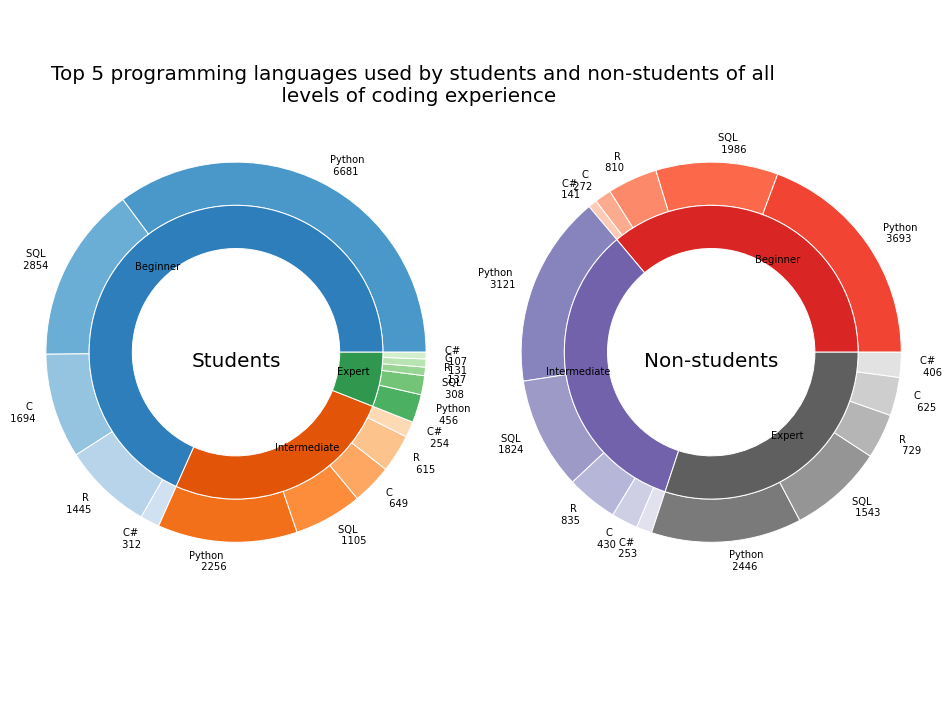

In [15]:
#https://www.python-graph-gallery.com/163-donut-plot-with-subgroups

df_q5_q11_q12 = df[['Q5' ,'Q11',"Q12_1", "Q12_2", "Q12_3",
                "Q12_4", "Q12_5", "Q12_6",
                "Q12_7", "Q12_8", "Q12_9",
                "Q12_10", "Q12_11", "Q12_12",
                "Q12_13", "Q12_14", "Q12_15"]]

df_q5_q11_q12 = df_q5_q11_q12[df_q5_q11_q12['Q11'].notna()]
df_q5_q11_q12['Q11'] = df_q5_q11_q12['Q11'].replace(dict.fromkeys(['I have never written code', '< 1 years', '1-3 years'],'Beginner'))
df_q5_q11_q12['Q11'] = df_q5_q11_q12['Q11'].replace(dict.fromkeys(['3-5 years', '5-10 years'],'Intermediate'))
df_q5_q11_q12['Q11'] = df_q5_q11_q12['Q11'].replace(dict.fromkeys(['10-20 years', '20+ years'],'Expert'))

df_q5_q11_q12_y = df_q5_q11_q12[df_q5_q11_q12['Q5'] == "Yes"].drop(columns=['Q5'])

df_q5_q11_q12_y = df_q5_q11_q12_y.groupby(['Q11'])[["Q12_1", "Q12_2", "Q12_3",
                "Q12_4", "Q12_5", "Q12_6",
                "Q12_7", "Q12_8", "Q12_9",
                "Q12_10", "Q12_11", "Q12_12",
                "Q12_13", "Q12_14", "Q12_15"]].count().unstack().fillna(0).reset_index(name='counts').rename(columns={'level_0':'Q12'})
df_q5_q11_q12_y = df_q5_q11_q12_y.replace({'Q12' : 
                                 { 'Q12_1' : 'Python', "Q12_2" : 'R' ,  "Q12_3" : 'SQL' , 
                                 'Q12_4' : 'C', "Q12_5" : 'C#' 
                                 }})

df_q5_q11_q12_y_beg = df_q5_q11_q12_y[df_q5_q11_q12_y['Q11'] == "Beginner"][:5].reset_index(drop=True).sort_values(by='counts', ascending=False)
df_q5_q11_q12_y_int = df_q5_q11_q12_y[df_q5_q11_q12_y['Q11'] == "Intermediate"][:5].reset_index(drop=True).sort_values(by='counts', ascending=False)
df_q5_q11_q12_y_exp = df_q5_q11_q12_y[df_q5_q11_q12_y['Q11'] == "Expert"][:5].reset_index(drop=True).sort_values(by='counts', ascending=False)

df_q5_q11_q12_y = pd.concat([df_q5_q11_q12_y_beg, df_q5_q11_q12_y_int], axis=0).reset_index(drop=True)
df_q5_q11_q12_y = pd.concat([df_q5_q11_q12_y, df_q5_q11_q12_y_exp], axis=0).reset_index(drop=True)


df_q5_q11_q12_n = df_q5_q11_q12[df_q5_q11_q12['Q5'] == "No"].drop(columns=['Q5'])

df_q5_q11_q12_n = df_q5_q11_q12_n.groupby(['Q11'])[["Q12_1", "Q12_2", "Q12_3",
                "Q12_4", "Q12_5", "Q12_6",
                "Q12_7", "Q12_8", "Q12_9",
                "Q12_10", "Q12_11", "Q12_12",
                "Q12_13", "Q12_14", "Q12_15"]].count().unstack().fillna(0).reset_index(name='counts').rename(columns={'level_0':'Q12'})

df_q5_q11_q12_n_beg = df_q5_q11_q12_n[df_q5_q11_q12_n['Q11'] == "Beginner"][:5].reset_index(drop=True).sort_values(by='counts', ascending=False)
df_q5_q11_q12_n_int = df_q5_q11_q12_n[df_q5_q11_q12_n['Q11'] == "Intermediate"][:5].reset_index(drop=True).sort_values(by='counts', ascending=False)
df_q5_q11_q12_n_exp = df_q5_q11_q12_n[df_q5_q11_q12_n['Q11'] == "Expert"][:5].reset_index(drop=True).sort_values(by='counts', ascending=False)

df_q5_q11_q12_n = pd.concat([df_q5_q11_q12_n_beg, df_q5_q11_q12_n_int], axis=0).reset_index(drop=True)
df_q5_q11_q12_n = pd.concat([df_q5_q11_q12_n, df_q5_q11_q12_n_exp], axis=0).reset_index(drop=True)

df_q5_q11_q12_n = df_q5_q11_q12_n.replace({'Q12' : 
                                 { 'Q12_1' : 'Python', "Q12_2" : 'R' ,  "Q12_3" : 'SQL' , 
                                 'Q12_4' : 'C', "Q12_5" : 'C#' 
                                 }})

group_names_y=list(df_q5_q11_q12_y.Q11.unique())
beg_y= df_q5_q11_q12_y[df_q5_q11_q12_y['Q11'] == "Beginner"].counts.sum()
int_y =df_q5_q11_q12_y[df_q5_q11_q12_y['Q11'] == "Intermediate"].counts.sum()
exp_y =df_q5_q11_q12_y[df_q5_q11_q12_y['Q11'] == "Expert"].counts.sum()
group_size_y=[beg_y, int_y, exp_y]
df_q5_q11_q12_y['subgroup'] = df_q5_q11_q12_y.apply(lambda x:'%s \n %s' % (x['Q12'],x['counts']),axis=1)
subgroup_names_y=list(df_q5_q11_q12_y.subgroup)
subgroup_size_y=list(df_q5_q11_q12_y.counts)

group_names_n=list(df_q5_q11_q12_n.Q11.unique())
beg_n= df_q5_q11_q12_n[df_q5_q11_q12_n['Q11'] == "Beginner"].counts.sum()
int_n =df_q5_q11_q12_n[df_q5_q11_q12_n['Q11'] == "Intermediate"].counts.sum()
exp_n =df_q5_q11_q12_n[df_q5_q11_q12_n['Q11'] == "Expert"].counts.sum()
group_size_n=[beg_n, int_n, exp_n]
df_q5_q11_q12_n['subgroup'] = df_q5_q11_q12_n.apply(lambda x:'%s \n %s' % (x['Q12'],x['counts']),axis=1)
subgroup_names_n=list(df_q5_q11_q12_n.subgroup)
subgroup_size_n=list(df_q5_q11_q12_n.counts)

# Create colors
a, b, c=[plt.cm.Blues, plt.cm.Oranges, plt.cm.Greens]
d, e, f=[plt.cm.Reds, plt.cm.Purples, plt.cm.Greys]

#Yes
# First Ring (outside)
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(8, 8))
ax1.axis('equal')
mypie, _ = ax1.pie(subgroup_size_y, radius=2.2, labels=subgroup_names_y, 
                   colors=[a(0.6), a(0.5), a(0.4), a(0.3), a(0.2), b(0.6), b(0.5), b(0.4), b(0.3), b(0.2), c(0.6), c(0.5), c(0.4), c(0.3), c(0.2), c(0.2)] )
plt.setp(mypie, width=0.5, edgecolor='white')

# Second Ring (Inside)
mypie2, _ = ax1.pie(group_size_y, radius=2-0.3, labels=group_names_y, labeldistance=0.7, 
                    colors=[a(0.7), b(0.7), c(0.7)])
plt.setp(mypie2, width=0.5, edgecolor='white')

#No
# First Ring (outside)
ax2.axis('equal')
mypie3, _ = ax2.pie(subgroup_size_n, radius=2.2, labels=subgroup_names_n, 
                    colors=[d(0.6), d(0.5), d(0.4), d(0.3), d(0.2), e(0.6), e(0.5), e(0.4), e(0.3), e(0.2), f(0.6), f(0.5), f(0.4), f(0.3), f(0.2), c(0.2)] )
plt.setp(mypie3, width=0.5, edgecolor='white')

# Second Ring (Inside)
mypie4, _ = ax2.pie(group_size_n, radius=2-0.3, labels=group_names_n, labeldistance=0.7, 
                    colors=[d(0.7), e(0.7), f(0.7)])
plt.setp(mypie4, width=0.5, edgecolor='white')

plt.margins(0,0)

# set the spacing between subplots
plt.subplots_adjust(left=0,
                    bottom=0,
                    right=1.2,
                    top=1.2,
                    wspace=1.2,
                    hspace=0)


fig.suptitle("Top 5 programming languages used by students and non-students of all \n levels of coding experience", fontsize=20).set_y(1.1)
ax1.set_title('Students', y=0.5, pad=-14, fontsize=20)
ax2.set_title('Non-students', y=0.5, pad=-14, fontsize=20)



plt.show()


From the donut charts, we can observe a few things, which is quite different from our previous graph:
- <div style="background-color:#D3D3D3"><b>C#</b> has replaced C++ in the top 5 coding languages used, across all of the levels of coding, both among students and non-students. It seems to be an unusual choice for DS, doesn't it? This could be because of the variety of backgrounds the participants (both students and non-students) come from, which would be discussed in a later section. But this could explain why C# is seen to overtake C++ in here. It is used in modern application development, and has a better memory management than C++ as it is performed automatically by the garbage collector.</div>
- We see that most of the student participants have beginner level coding experience (or no experience at all). This could explain the participation of youngsters, and ALSO the particpations of other community members who might be from other professions and deciding to explore this field, or who want to switch to data science in the future. While they explore a lot of languages, Python looks to be a clear winner for beginners, with a whopping 6681 usages among the participants, which is way ahead of the 2nd most used language among the beginners (i.e., SQL).
- <div style="background-color:#D3D3D3">Following from the previous point, we see a lot of beginners among the non-students, even though it is not as much, since the majority of them fall in intermediate and expert levels of coding. But the number still matters, as it proves the interest of many beginner-level coders (or with no coding experience at all) are looking to learn coding and enhance their knowledge.</div>
- In case of students, the intermediate-level coders could account for the young participants who have computational background, possibly in higher levels of education. And the expert-level coders could include the participants who are professionals (or have had professional experiences) deciding to go back to school for pursuing higher education, at both part-time and full-time capacity.
- <div style="background-color:#D3D3D3">For non-students, it presumably accounts for professionals mostly. Again, when we go to the later sections on the different professional backgrounds they have, we will see that most of the professions the non-student participants come from need coding background. And that should explain why the proportions of intermediate and expert-level coders are high within this group.</div>


## Machine Learning frameworks vs Data Visualization tools

### ML frameworks
Machine learning relies on algorithms. A machine learning framework, then, simplifies machine learning algorithms. An ML framework is any tool, interface, or library that lets you develop ML models easily, without understanding the underlying algorithms.

### DV tools
Data visualisation is basically the graphical representation of information and data. It could be seen as a form of visual art for grabbing our interest, which could also be termed as ["story-telling with a purpose"](https://www.tableau.com/en-gb/learn/articles/data-visualization).

<div class="alert alert-block alert-info"><i>📌  &nbsp  Also, the importance of DV cannot come with a better example than this survey analysis, which should further illustrate the need for DV for all kinds of analysis.</i></div>

#### Why do we need both though?
As outlined in [here](https://www.sisense.com/blog/how-machine-learning-improves-data-visualization/), the ML algorithms can help identify outliers and unexpected (AND expected) outcomes. Combining DV and ML lets one establish baseline metrics for performance before scanning for any situation that breaks that mold. This can help in reacting faster, more effectively, and avoid downtime across all the  operations.

To understand the relation between both, check out this [post](https://neptune.ai/blog/visualizing-machine-learning-models) which provides with a guideline:
> "Machine learning models are being trained with terabytes of data with the goal of increasing efficiency while making good decisions at the same time, something that humans do pretty well. The responsibility that we’re putting on ML models means that we need to be able to make them as transparent as possible because otherwise, we can’t trust them. To do so, we need to visualize ML models."

#### Popularity of ML frameworks & DV tools between the two groups
From the previous section, since we have already seen that both students and non-students prefer the same kind of programming languages at the different stages of their ML experience, let us now see if the same follows through on their preferences with ML frameworks and DV tools.

But first we group the different levels of usages of ML methods into three parts based on their experience:
- <b>Beginner</b>:- People who are just getting introduced to coding or have 0-2 years of experience in ML methods
- <b>Intermediate</b>:- People who have 2-5 years of experience in ML methods
- <b>Advanced</b>:- People who have more than 5 years of experience in ML methods


In [16]:
df_q5_q15_q16_q17 = df.copy()

df_q5_q15_q16_q17['Q16'] = df_q5_q15_q16_q17['Q16'].replace(dict.fromkeys(['I do not use machine learning methods', 'Under 1 year', '1-2 years'],'Beginner'))
df_q5_q15_q16_q17['Q16'] = df_q5_q15_q16_q17['Q16'].replace(dict.fromkeys(['2-3 years', '3-4 years', '4-5 years'],'Intermediate'))
df_q5_q15_q16_q17['Q16'] = df_q5_q15_q16_q17['Q16'].replace(dict.fromkeys(['5-10 years', '10-20 years', '20 or more years'],'Advanced'))

df_q5_q15_q16_q17_y = df_q5_q15_q16_q17[df_q5_q15_q16_q17['Q5'] == "Yes"]
df_q5_q15_q16_q17_n = df_q5_q15_q16_q17[df_q5_q15_q16_q17['Q5'] == "No"]

# 15

#Yes
df_q5_q15_q16_q17_y_15 = df_q5_q15_q16_q17_y.groupby(['Q16'])[["Q15_1", "Q15_2", "Q15_3",
                                                              "Q15_4", "Q15_5", "Q15_6",
                                                              "Q15_7", "Q15_8", "Q15_9",
                                                              "Q15_10", "Q15_11", "Q15_12",
                                                              "Q15_13", "Q15_14", "Q15_15"] 
                                 ].count().unstack().fillna(0).reset_index(name='15_counts').rename(columns={'level_0': 'Q15'})

df_q5_q15_q16_q17_y_15 = df_q5_q15_q16_q17_y_15.replace({'Q15' : 
                                 { 'Q15_1' : 'Matplotlib', 'Q15_2' : 'Seaborn',
                                 "Q15_3" : ' Plotly / Plotly Express' ,  "Q15_4" : 'Ggplot / ggplot2',     
                                "Q15_5" : 'Shiny', "Q15_6" : 'D3 js',
                                "Q15_7" : ' Altair', "Q15_8" :' Bokeh', 
                                "Q15_9" : ' Geoplotlib',  "Q15_10" : 'Leaflet / Folium', 
                                "Q15_11" : 'Pygal', "Q15_12": 'Dygraphs',
                                  "Q15_13" : 'Highcharter', "Q15_14": 'None', "Q15_15" : 'Other'
                                 }})

#No 
df_q5_q15_q16_q17_n_15 = df_q5_q15_q16_q17_n.groupby(['Q16'])[["Q15_1", "Q15_2", "Q15_3",
                                                              "Q15_4", "Q15_5", "Q15_6",
                                                              "Q15_7", "Q15_8", "Q15_9",
                                                              "Q15_10", "Q15_11", "Q15_12",
                                                              "Q15_13", "Q15_14", "Q15_15"] 
                                 ].count().unstack().fillna(0).reset_index(name='15_counts').rename(columns={'level_0': 'Q15'})


df_q5_q15_q16_q17_n_15 = df_q5_q15_q16_q17_n_15.replace({'Q15' : 
                                 { 'Q15_1' : 'Matplotlib', 'Q15_2' : 'Seaborn',
                                 "Q15_3" : ' Plotly / Plotly Express' ,  "Q15_4" : 'Ggplot / ggplot2',     
                                "Q15_5" : 'Shiny', "Q15_6" : 'D3 js',
                                "Q15_7" : ' Altair', "Q15_8" :' Bokeh', 
                                "Q15_9" : ' Geoplotlib',  "Q15_10" : 'Leaflet / Folium', 
                                "Q15_11" : 'Pygal', "Q15_12": 'Dygraphs',
                                  "Q15_13" : 'Highcharter', "Q15_14": 'None', "Q15_15" : 'Other'
                                 }})

df_q5_q15_q16_q17_15 = pd.merge(df_q5_q15_q16_q17_y_15, df_q5_q15_q16_q17_n_15,  how='left', left_on=['Q15','Q16'], right_on = ['Q15','Q16']).rename(columns={'15_counts_x': 'Yes' ,'15_counts_y': 'No'})
df_q5_q15_q16_q17_15 = df_q5_q15_q16_q17_15[df_q5_q15_q16_q17_15['Q15'].str.contains("None") == False]

df_q5_q15_q16_q17_15_beg = df_q5_q15_q16_q17_15[df_q5_q15_q16_q17_15['Q16'] == "Beginner"].drop(columns='Q16')
df_q5_q15_q16_q17_15_int = df_q5_q15_q16_q17_15[df_q5_q15_q16_q17_15['Q16'] == "Intermediate"].drop(columns='Q16')
df_q5_q15_q16_q17_15_adv = df_q5_q15_q16_q17_15[df_q5_q15_q16_q17_15['Q16'] == "Advanced"].drop(columns='Q16')


# 17

#Yes
df_q5_q15_q16_q17_y_17 = df_q5_q15_q16_q17_y.groupby(['Q16'])[["Q17_1", "Q17_2", "Q17_3",
                                                              "Q17_4", "Q17_5", "Q17_6",
                                                              "Q17_7", "Q17_8", "Q17_9",
                                                              "Q17_10", "Q17_11", "Q17_12",
                                                              "Q17_13", "Q17_14", "Q17_15"] 
                                 ].count().unstack().fillna(0).reset_index(name='17_counts').rename(columns={'level_0': 'Q17'})

df_q5_q15_q16_q17_y_17 = df_q5_q15_q16_q17_y_17.replace({'Q17' : 
                                 { 'Q17_1' : 'Scikit-learn', 'Q17_2' : 'TensorFlow',
                                 "Q17_3" : 'Keras' ,  "Q17_4" : 'PyTorch',     
                                "Q17_5" : 'Fast.ai', "Q17_6" : 'Xgboost',
                                "Q17_7" : ' LightGBM', "Q17_8" :' CatBoost', 
                                "Q17_9" : ' Caret',  "Q17_10" : 'Tidymodels', 
                                "Q17_11" : 'JAX', "Q17_12": 'PyTorch Lightning',
                                  "Q17_13" : 'Huggingface', "Q17_14": 'None', "Q17_15" : 'Other'
                                 }})

#No
df_q5_q15_q16_q17_n_17 = df_q5_q15_q16_q17_n.groupby(['Q16'])[["Q17_1", "Q17_2", "Q17_3",
                                                              "Q17_4", "Q17_5", "Q17_6",
                                                              "Q17_7", "Q17_8", "Q17_9",
                                                              "Q17_10", "Q17_11", "Q17_12",
                                                              "Q17_13", "Q17_14", "Q17_15"] 
                                 ].count().unstack().fillna(0).reset_index(name='17_counts').rename(columns={'level_0': 'Q17'})

df_q5_q15_q16_q17_n_17 = df_q5_q15_q16_q17_n_17.replace({'Q17' : 
                                 { 'Q17_1' : 'Scikit-learn', 'Q17_2' : 'TensorFlow',
                                 "Q17_3" : 'Keras' ,  "Q17_4" : 'PyTorch',     
                                "Q17_5" : 'Fast.ai', "Q17_6" : 'Xgboost',
                                "Q17_7" : ' LightGBM', "Q17_8" :' CatBoost', 
                                "Q17_9" : ' Caret',  "Q17_10" : 'Tidymodels', 
                                "Q17_11" : 'JAX', "Q17_12": 'PyTorch Lightning',
                                  "Q17_13" : 'Huggingface', "Q17_14": 'None', "Q17_15" : 'Other'
                                 }})

df_q5_q15_q16_q17_17 = pd.merge(df_q5_q15_q16_q17_y_17, df_q5_q15_q16_q17_n_17,  how='left', left_on=['Q17','Q16'], right_on = ['Q17','Q16']).rename(columns={'17_counts_x': 'Yes' ,'17_counts_y': 'No'})
df_q5_q15_q16_q17_17 = df_q5_q15_q16_q17_17[df_q5_q15_q16_q17_17['Q17'].str.contains("None") == False]

df_q5_q15_q16_q17_17_beg = df_q5_q15_q16_q17_17[df_q5_q15_q16_q17_17['Q16'] == "Beginner"].drop(columns='Q16')
df_q5_q15_q16_q17_17_int = df_q5_q15_q16_q17_17[df_q5_q15_q16_q17_17['Q16'] == "Intermediate"].drop(columns='Q16')
df_q5_q15_q16_q17_17_adv = df_q5_q15_q16_q17_17[df_q5_q15_q16_q17_17['Q16'] == "Advanced"].drop(columns='Q16')


fig = make_subplots(rows=1, cols=4, specs=[[{"type": "bar"}, {"type": "bar"}, {"type": "bar"}, {"type": "bar"}]], horizontal_spacing = 0.005)

fig.add_trace(go.Bar(y=df_q5_q15_q16_q17_15_adv['Q15'], x=df_q5_q15_q16_q17_15_adv['Yes'], marker_color='#48494b', name='Advanced(5 years+) [Student]',
                     orientation='h', opacity=0.8),
                     row=1, col=1)
fig.add_trace(go.Bar(y=df_q5_q15_q16_q17_15_int['Q15'], x=df_q5_q15_q16_q17_15_int['Yes'], marker_color='#ed7014', name='Intermediate(2-5 years) [Student]',
                     orientation='h', opacity=0.8),
                     row=1, col=1)
fig.add_trace(go.Bar(y=df_q5_q15_q16_q17_15_beg['Q15'], x=df_q5_q15_q16_q17_15_beg['Yes'], marker_color='#036c5f', name='Beginner(0-2 years) [Student]',
                     orientation='h', opacity=0.8),
                     row=1, col=1)
fig['layout']['xaxis'].update(visible=False, autorange='reversed', title_text='DV tools')

fig.add_trace(go.Bar(y=df_q5_q15_q16_q17_15_adv['Q15'], x=df_q5_q15_q16_q17_15_adv['No'], marker_color='#828282', name='Advanced(5 years+) [Non-student]',
                     orientation='h', opacity=0.8),
                     row=1, col=2)
fig.add_trace(go.Bar(y=df_q5_q15_q16_q17_15_int['Q15'], x=df_q5_q15_q16_q17_15_int['No'], marker_color='#fcae1e', name='Intermediate(2-5 years) [Non-student]',
                     orientation='h', opacity=0.8),
                     row=1, col=2)
fig.add_trace(go.Bar(y=df_q5_q15_q16_q17_15_beg['Q15'], x=df_q5_q15_q16_q17_15_beg['No'], marker_color='#81cdc6', name='Beginner(0-2 years) [Non-student]',
                     orientation='h', opacity=0.8),
                     row=1, col=2)
fig['layout']['xaxis2'].update(visible=False)

fig.add_trace(go.Bar(y=df_q5_q15_q16_q17_17_adv['Q17'], x=df_q5_q15_q16_q17_17_adv['Yes'], marker_color='#48494b', name='Advanced(5 years+)',
                     showlegend=False, orientation='h', opacity=0.8),
                     row=1, col=3)
fig.add_trace(go.Bar(y=df_q5_q15_q16_q17_17_int['Q17'], x=df_q5_q15_q16_q17_17_int['Yes'], marker_color='#ed7014', name='Intermediate (2-5 years)',
                     showlegend=False, orientation='h', opacity=0.8 ),
                     row=1, col=3)
fig.add_trace(go.Bar(y=df_q5_q15_q16_q17_17_beg['Q17'], x=df_q5_q15_q16_q17_17_beg['Yes'], marker_color='#036c5f', name='Beginner (0-2 years)',
                     showlegend=False, orientation='h', opacity=0.8), 
                     row=1, col=3)
fig['layout']['xaxis3'].update(visible=False, autorange='reversed')

fig.add_trace(go.Bar(y=df_q5_q15_q16_q17_17_adv['Q17'], x=df_q5_q15_q16_q17_17_adv['No'], marker_color='#828282', name='Advanced(5 years+)',
                    showlegend=False, orientation='h', opacity=0.8),
                     row=1, col=4)
fig.add_trace(go.Bar(y=df_q5_q15_q16_q17_17_int['Q17'], x=df_q5_q15_q16_q17_17_int['No'], marker_color='#fcae1e', name='Intermediate (2-5 years)',
                     showlegend=False, orientation='h', opacity=0.8 ),
                     row=1, col=4)
fig.add_trace(go.Bar(y=df_q5_q15_q16_q17_17_beg['Q17'], x=df_q5_q15_q16_q17_17_beg['No'], marker_color='#81cdc6', name='Beginner (0-2 years)',
                     showlegend=False, orientation='h', opacity=0.8), 
                     row=1, col=4)
fig['layout']['xaxis4'].update(visible=False)

Q15_order = list(df_q5_q15_q16_q17_15.groupby(['Q15'])['Yes','No'].sum().sum(axis=1).reset_index(name='No').sort_values('No')['Q15'].to_list())
Q17_order = list(df_q5_q15_q16_q17_17.groupby(['Q17'])['Yes','No'].sum().sum(axis=1).reset_index(name='No').sort_values('No')['Q17'].to_list())

fig['layout']['yaxis'].update(categoryorder='array', categoryarray= Q15_order)
fig['layout']['yaxis2'].update(visible=False, categoryorder='array', categoryarray= Q15_order)
fig['layout']['yaxis3'].update(visible=False, categoryorder='array', categoryarray= Q17_order)
fig['layout']['yaxis4'].update(categoryorder='array', categoryarray= Q17_order)

fig.update_layout(title_text='Participants using data visualization (DV) tools and machine learning (ML) frameworks as per <br> participant\'s (both students and non-students) experience in ML', title_x=0.5, title_y=0.97, font_size=11.5,
                 legend=dict(orientation="h", yanchor="bottom", y=1.15, xanchor="center", x=0.5, font_size=5),
                    yaxis=dict(side='left') , yaxis4=dict(side='right'),
                  annotations = [dict(
        x=0.12,
        y=-0.1,    #Trying a negative number makes the caption disappear - I'd like the caption to be below the map
        xref='paper',
        yref='paper',
        text="Data Visualization Tools",
        showarrow = False,
        font=dict(
                family="Muli, sans-serif",
                size=14,
                color="#ffffff"
                ),
        bordercolor="#c7c7c7",
        borderwidth=2,
        borderpad=4,
        bgcolor="#222A2A",
        opacity=0.8
    ),
            dict(
        x=0.92,
        y=-0.1,    #Trying a negative number makes the caption disappear - I'd like the caption to be below the map
        xref='paper',
        yref='paper',
        text="Machine Learning Frameworks",
        showarrow = False,
        font=dict(
                family="Muli, sans-serif",
                size=14,
                color="#ffffff"
                ),
        bordercolor="#c7c7c7",
        borderwidth=2,
        borderpad=4,
        bgcolor="#222A2A",
        opacity=0.8
    )]
                 )




Some general trends are observed in the usage of the ML frameworks for both students and non-students with differing levels of ML experience. It is known that TensorFlow, PyTorch, and scikit-learn are the most popular ML frameworks, even though choosing which framework to use will depend on the work one is trying to perform. And it is similarly reflected in this graph. These frameworks are oriented towards mathematics and statistical modeling (machine learning) as opposed to neural network training (deep learning).

Analysis of the top few most used ML framework gives us the following observations:
- <div style="background-color:#D3D3D3">Scikit-learn has been around a long time and would be most familiar to R programmers, but it comes with a big caveat: it is not built to run across a cluster. </div>
- TensorFlow and PyTorch are direct competitors because of their similarity. They both provide a rich set of linear algebra tools, and they can run regression analysis.
- <div style="background-color:#D3D3D3">Keras, a neural network library built on top of TensorFlow to make ML modelling straightforward. It simplifies some of the coding steps, like offering all-in-one models, Keras can also use the same code to run on a CPU or a GPU.</div>
- Two of the most popular frameworks that are based on Gradient Boosted Machines are XGBoost and LightGBM. And can be seen from here, that they are used quite frequently among both the groups, with good usages. The algorithm we want to use often depends upon the type of processing unit we have for running the models. Although XGBoost is comparatively slower than LightGBM on GPU, it is actually faster on CPU. While working in institutions (both academic and non-academic) with access to GPUs and strong CPUs, people often prefer XGBoost as it is more scalable than LightGBM. This could explain why students and non-students both use it more.

While most of the observation across the ML framework suggest similar pattern, there are some key takeaways one could have from there. For example, for <b>LightGBM, Huggingface </b> and <b>Caret</b>, it is more popular among intermediate non-student ML practitioners as opposed to the general trend. Possible reasons could be:

- <div style="background-color:#D3D3D3">If one has GPUs and strong CPUs, then XGBoost is more recommended since it is more scalable than LightGBM. But while building on a personal environment with no GPU and limited CPU power, LightGBM is mostly used in the early stages because it's faster and provides more time for feature egineering. This could be the reason for it being more popular among intermediate non-students.</div>
- Hugging Face has become extremely popular due to its open source efforts, focus on AI ethics and easy to deploy tools. As it states on its [website](https://huggingface.co/), it is "on a journey to advance and democratize NLP for everyone. Along the way, contributing to the development of technology for the better." With its wide variety of tools and NLP libraries, it is no wonder a popular choice among others.
- <div style="background-color:#D3D3D3">Caret, a comprehensive framework for building machine learning models in R. With R having so many implementations of ML algorithms, it can be challenging to keep track of which algorithm resides in which package. This is where Caret comes in handy, because no matter which package the algorithm resides, caret will remember that for us. It will just prompt to run install package for that particular algorithm's package. Hence, a reason why it is popular choice among intermediate non-students.</div>

While the beginner-level and the intermediate level ML practitioners work with almost all of the ML algorithms listed above (some being more popular than the other), but the usage of DV tools among all the participants seem to be heavily predominated by a selected few tools only. Also, the beginners seem to work more with DV tools than with the ML algorithms. Why?

Data Visualization is one of the most important skills. It provides an important suite of tools for identifying a qualitative understanding. In ML, it is important to understand how data is used in a particular machine learning model before using it with any of the algorithms, and DV helps in analyzing that. It is better for beginners to learn about the data more before diving into it. Otherwise all the intermediate and expert level ML practioners seem to have an equal usage of both the DV tools and ML algorithms.

- <div style="background-color:#D3D3D3">Matplotlib and Seaborn act as the backbone of data visualization through Python, and the plot testifies to the same with the vast amount of usages for both across all levels of ML experiences, among students and non-students both. While Matplotlib plots various graphs using Pandas and Numpy, Seaborn (which is an extended version of Matplotlib) uses Matplotlib along with Numpy and Pandas for plotting graphs. Matplotlib is mainly deployed for basic plotting, hence a very popular choice among beginners, while Seaborn provides a variety of visualization patterns. </div>
- Some prefer Plotly over matlplotlib and Seaborn, only for interactive visualizations _(case in point: myself 🤓)_, which could be the reason why it is seen as the third most popular DV tool. Plotly allows users to further improve the visualization experience by using customizable interactive tools, and it is especially helpful while working on notebooks, as it gives the liberty for the other users to communicate with the visualizations as per the needs (within the visualization limit of course).
- <div style="background-color:#D3D3D3">Another notable DV tool is Ggplot, which is an open-source data visualization package for the statistical programming language R. For participants who work primarily in R, this could be their preferred tool. It is declaratively and efficiently to create data visualization based on The Grammar of Graphics. This layered grammar makes developing charts structural and effusive.</div>

### ML algorithms

A machine learning algorithm is the method by which the AI system conducts its task, generally predicting output values from given input data. While ML frameworks provide end-to-end support for the ML life cycle, ML algorithms are the engines of machine learning, meaning it is the algorithms that turn a data set into a model.

#### Intersection of ML algorithms with DV tools

Since we had already discussed why need both algorithms and visualization together, let's explore if the participants use both in their regular practices.

In [17]:
df_q15 = df.loc[:,['Q15_1', 'Q15_2', 'Q15_3', 'Q15_4', 'Q15_5', 'Q15_6', 'Q15_7', 
                   'Q15_8', 'Q15_9', 'Q15_10', 'Q15_11', 'Q15_12', 'Q15_13', 'Q15_14', 'Q15_15']]
df_q15 = pd.DataFrame(df_q15.stack()).rename(columns={0:'Q15'})
index = pd.MultiIndex.from_tuples(df_q15.index, names=["first", "second"])
df_q15['index']= index.get_level_values("first")
df_q15 = df_q15.reset_index(drop=True).reindex(columns=["index", "Q15"])
df_q15 = df_q15[df_q15['Q15'].str.contains("None") == False]


df_q18 = df.loc[:,['Q18_1', 'Q18_2', 'Q18_3', 'Q18_4', 'Q18_5', 'Q18_6', 'Q18_7', 
                   'Q18_8', 'Q18_9', 'Q18_10', 'Q18_11', 'Q18_12', 'Q18_13', 'Q18_14']]
df_q18 = pd.DataFrame(df_q18.stack()).rename(columns={0:'Q18'})
index = pd.MultiIndex.from_tuples(df_q18.index, names=["first", "second"])
df_q18['index']= index.get_level_values("first")
df_q18 = df_q18.reset_index(drop=True).reindex(columns=["index", "Q18"])
df_q18 = df_q18[df_q18['Q18'].str.contains("None") == False]
df_q18 = df_q18[df_q18['Q18'].str.contains("Other") == False]
df_q18.Q18 = df_q18.Q18.replace({'Gradient Boosting Machines (xgboost, lightgbm, etc)': 'Gradient Boosting'})
#df_q18.Q18 = df_q18.Q18.replace({'Decision Trees or Random Forests': 'Decision Trees'})
df_q18.Q18 = df_q18.Q18.replace({'Transformer Networks (BERT, gpt-3, etc)': 'Transformers'})
df_q18.Q18 = df_q18.Q18.replace({'Dense Neural Networks (MLPs, etc)': 'Dense Neural Networks'})
df_q18.Q18 = df_q18.Q18.replace({'Autoencoder Networks (DAE, VAE, etc)': 'Autoencoder Networks'})


df_q15_q18 = pd.merge(df_q15, df_q18, on ='index').drop(columns='index')
df_q15_q18 = df_q15_q18.rename(columns={
                                'Q18': 'Machine Learning Algorithm',
                                'Q15': 'Data Visualization Tool'
                                    })
df_q15_q18 = pd.crosstab(df_q15_q18['Machine Learning Algorithm'], df_q15_q18['Data Visualization Tool'])


px.imshow(df_q15_q18, color_continuous_scale = 'YlGnBu', color_continuous_midpoint=5000,
         title="ML algorithms vs DV tools used by participants on a regular basis")

Evident from our previous plots, it is clear that Matplotlib, Seaborn, Plotly and Ggplot are the clear frontrunners for daily usages. But we know from our previous graphs that Python and R dominates over the other programming language, especially when it comes to work in DS (or related) field, so we can try to view it from that perspective. Though ggplot is popular, it still is primarily for the R users. While matplotlib and seaborn are primarily Python based, and owing to vast number of people working in Python, their greater usage is expected. Plotly, on the other hand, has users from both Python and R. By definition, it is ["is an R package for creating interactive web-based graphs via the open source JavaScript graphing library plotly.js."](https://plotly.com/r/getting-started/#:~:text=plotly%20is%20an%20R%20package,js%20.), but has its usage across a range of programming languages.


#### Influence of experience in ML methods on the same

Given that we see how popular the ML algorithms have become, it still needs more exploration. To explore data and present outputs, visualizations for clear, immediate insights into the data are necessary. 

> Extracting information from data of various structures could be difficult, yet necessary in further exploration. Capturing meaningful inferences through visualizations in the data exploration phase can help in the subsequent modelling phase, and hence very useful in every stage of the data science pipeline. 

Let's check if the participants who work (or have worked) in ML methods before have explored the DV tools as much. Since these applications could be fairly specific and may need prior coding experience and basic knowledge of AI and ML technologies, we will check with their experience in using ML methods.



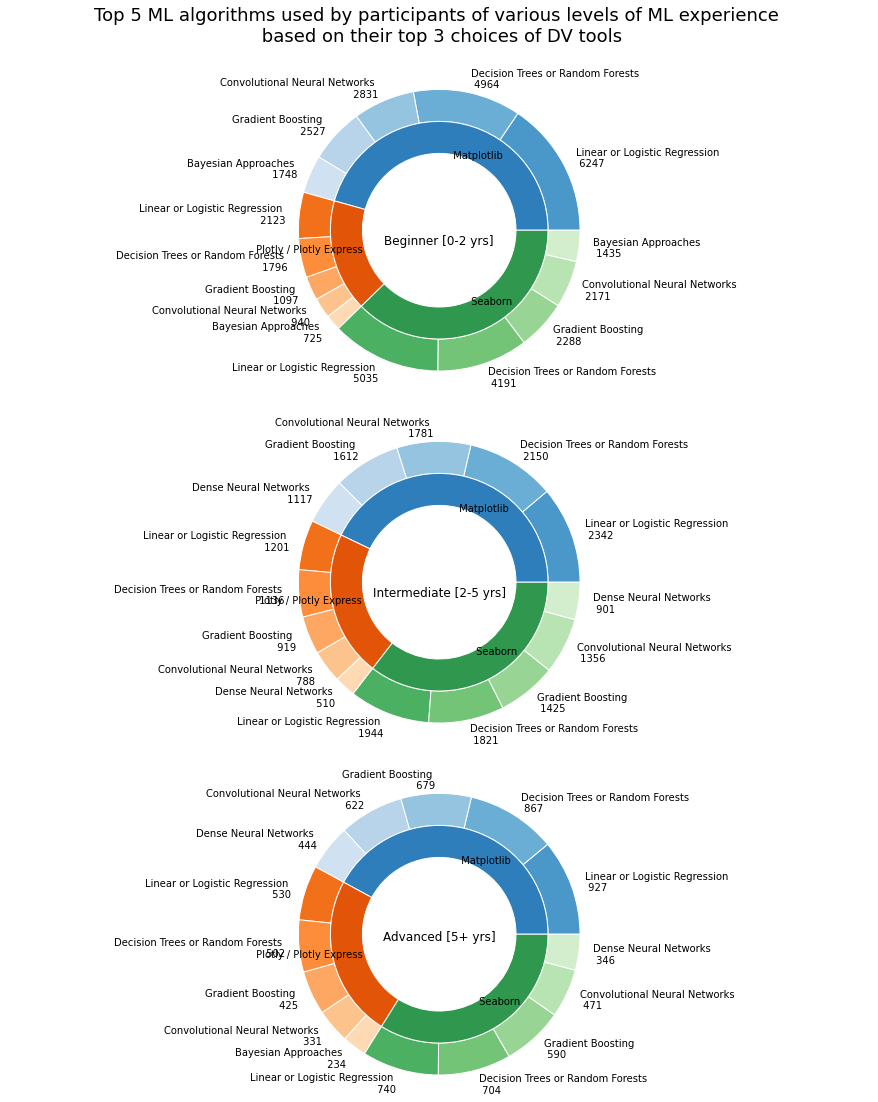

In [18]:
df_q16 = df[['Q16']].dropna()
df_q16['index'] = df_q16.index
df_q16['Q16'] = df_q16['Q16'].replace(dict.fromkeys(['I do not use machine learning methods', 'Under 1 year', '1-2 years'],'Beginner'))
df_q16['Q16'] = df_q16['Q16'].replace(dict.fromkeys(['2-3 years', '3-4 years', '4-5 years'],'Intermediate'))
df_q16['Q16'] = df_q16['Q16'].replace(dict.fromkeys(['5-10 years', '10-20 years', '20 or more years'],'Advanced'))

df_q15_q16_q18 = pd.merge(df_q15, df_q18, on ='index')
df_q15_q16_q18 = pd.merge(df_q15_q16_q18, df_q16, on ='index').drop(columns='index')

df_q15_q16_q18_beg = df_q15_q16_q18[df_q15_q16_q18['Q16'] == "Beginner"].drop(columns='Q16')
df_q15_q16_q18_int = df_q15_q16_q18[df_q15_q16_q18['Q16'] == "Intermediate"].drop(columns='Q16')
df_q15_q16_q18_adv = df_q15_q16_q18[df_q15_q16_q18['Q16'] == "Advanced"].drop(columns='Q16')

#Top 5 of every Q18 category

#Beginners
df_q15_q16_q18_beg = df_q15_q16_q18_beg.value_counts().reset_index(name='count')
df_q15_q16_q18_beg= df_q15_q16_q18_beg.groupby('Q18').head(3).reset_index(drop=True) # to get top 3 DV tools of every Q18 (Inner circle)
# to get top 5 ML algos used for every DV tools (Inner circle)
df_q15_q16_q18_beg = (df_q15_q16_q18_beg.loc[df_q15_q16_q18_beg.groupby('Q15', sort=True)['count'].nlargest(5)
              .index.get_level_values(1)]
       .reset_index(drop=True))
group_names_beg=list(df_q15_q16_q18_beg.Q15.unique())
dv_1_beg = sum(df_q15_q16_q18_beg[df_q15_q16_q18_beg['Q15'] == group_names_beg[0]]['count']) 
dv_2_beg = sum(df_q15_q16_q18_beg[df_q15_q16_q18_beg['Q15'] == group_names_beg[1]]['count']) 
dv_3_beg = sum(df_q15_q16_q18_beg[df_q15_q16_q18_beg['Q15'] == group_names_beg[2]]['count']) 
group_size_beg = [dv_1_beg, dv_2_beg, dv_3_beg]
df_q15_q16_q18_beg['subgroup'] = df_q15_q16_q18_beg.apply(lambda x:'%s \n %s' % (x['Q18'],x['count']),axis=1)
subgroup_names_beg=list(df_q15_q16_q18_beg.subgroup)
subgroup_size_beg=list(df_q15_q16_q18_beg['count'])

#Intermediate
df_q15_q16_q18_int = df_q15_q16_q18_int.value_counts().reset_index(name='count')
df_q15_q16_q18_int= df_q15_q16_q18_int.groupby('Q18').head(3).reset_index(drop=True) # to get top 3 DV tools of every Q18 (Outer circle)
# to get top 5 ML algos used for every DV tools (Inner circle)
df_q15_q16_q18_int = (df_q15_q16_q18_int.loc[df_q15_q16_q18_int.groupby('Q15', sort=True)['count'].nlargest(5)
              .index.get_level_values(1)]
       .reset_index(drop=True))
group_names_int=list(df_q15_q16_q18_int.Q15.unique())
dv_1_int = sum(df_q15_q16_q18_int[df_q15_q16_q18_int['Q15'] == group_names_int[0]]['count']) 
dv_2_int = sum(df_q15_q16_q18_int[df_q15_q16_q18_int['Q15'] == group_names_int[1]]['count']) 
dv_3_int = sum(df_q15_q16_q18_int[df_q15_q16_q18_int['Q15'] == group_names_int[2]]['count']) 
group_size_int = [dv_1_int, dv_2_int, dv_3_int]
df_q15_q16_q18_int['subgroup'] = df_q15_q16_q18_int.apply(lambda x:'%s \n %s' % (x['Q18'],x['count']),axis=1)
subgroup_names_int=list(df_q15_q16_q18_int.subgroup)
subgroup_size_int=list(df_q15_q16_q18_int['count'])

#Advanced
df_q15_q16_q18_adv = df_q15_q16_q18_adv.value_counts().reset_index(name='count')
df_q15_q16_q18_adv= df_q15_q16_q18_adv.groupby('Q18').head(3).reset_index(drop=True) # to get top 3 DV tools of every Q18 (Inner circle)
# to get top 5 ML algos used for every DV tools (Inner circle)
df_q15_q16_q18_adv = (df_q15_q16_q18_adv.loc[df_q15_q16_q18_adv.groupby('Q15', sort=True)['count'].nlargest(5)
              .index.get_level_values(1)]
       .reset_index(drop=True))
group_names_adv=list(df_q15_q16_q18_adv.Q15.unique())
dv_1_adv = sum(df_q15_q16_q18_adv[df_q15_q16_q18_adv['Q15'] == group_names_adv[0]]['count']) 
dv_2_adv = sum(df_q15_q16_q18_adv[df_q15_q16_q18_adv['Q15'] == group_names_adv[1]]['count']) 
dv_3_adv = sum(df_q15_q16_q18_adv[df_q15_q16_q18_adv['Q15'] == group_names_adv[2]]['count']) 
group_size_adv = [dv_1_adv, dv_2_adv, dv_3_adv]
df_q15_q16_q18_adv['subgroup'] = df_q15_q16_q18_adv.apply(lambda x:'%s \n %s' % (x['Q18'],x['count']),axis=1)
subgroup_names_adv=list(df_q15_q16_q18_adv.subgroup)
subgroup_size_adv=list(df_q15_q16_q18_adv['count'])

a, b, c=[plt.cm.Blues, plt.cm.Oranges, plt.cm.Greens]

fig, ((ax1, ax2, ax3)) = plt.subplots(ncols=1, nrows=3, figsize=(10, 10))

# Beginner
# First Ring (outside)
ax1.axis('equal')
mypie1, _ = ax1.pie(subgroup_size_beg, radius=2.2, labels=subgroup_names_beg, 
                   colors=[a(0.6), a(0.5), a(0.4), a(0.3), a(0.2), b(0.6), b(0.5), b(0.4), b(0.3), b(0.2), c(0.6), c(0.5), c(0.4), c(0.3), c(0.2), c(0.2)] )
plt.setp(mypie1, width=0.5, edgecolor='white')

# Second Ring (Inside)
mypie2, _ = ax1.pie(group_size_beg, radius=2-0.3, labels=group_names_beg, labeldistance=0.7, 
                    colors=[a(0.7), b(0.7), c(0.7)])
plt.setp(mypie2, width=0.5, edgecolor='white')

# Intermediate 
# First Ring (outside)
ax2.axis('equal')
mypie3, _ = ax2.pie(subgroup_size_int, radius=2.2, labels=subgroup_names_int, 
                   colors=[a(0.6), a(0.5), a(0.4), a(0.3), a(0.2), b(0.6), b(0.5), b(0.4), b(0.3), b(0.2), c(0.6), c(0.5), c(0.4), c(0.3), c(0.2), c(0.2)] )
plt.setp(mypie3, width=0.5, edgecolor='white')

# Second Ring (Inside)
mypie4, _ = ax2.pie(group_size_int, radius=2-0.3, labels=group_names_int, labeldistance=0.7, 
                    colors=[a(0.7), b(0.7), c(0.7)])
plt.setp(mypie4, width=0.5, edgecolor='white')

# Advanced 
# First Ring (outside)
ax3.axis('equal')
mypie5, _ = ax3.pie(subgroup_size_adv, radius=2.2, labels=subgroup_names_adv, 
                   colors=[a(0.6), a(0.5), a(0.4), a(0.3), a(0.2), b(0.6), b(0.5), b(0.4), b(0.3), b(0.2), c(0.6), c(0.5), c(0.4), c(0.3), c(0.2), c(0.2)] )
plt.setp(mypie5, width=0.5, edgecolor='white')

# Second Ring (Inside)
mypie6, _ = ax3.pie(group_size_adv, radius=2-0.3, labels=group_names_adv, labeldistance=0.7, 
                    colors=[a(0.7), b(0.7), c(0.7)])
plt.setp(mypie6, width=0.5, edgecolor='white')

plt.margins(0,0)

# set the spacing between subplots
plt.subplots_adjust(left=0,
                    bottom=0,
                    right=1.2,
                    top=1.2,
                    wspace=0,
                    hspace=1.2)


fig.suptitle("Top 5 ML algorithms used by participants of various levels of ML experience \n based on their top 3 choices of DV tools", fontsize=18, x= 0.6).set_y(1.4)
ax1.set_title('Beginner [0-2 yrs]', y=0.5, pad=-14, fontsize=12)
ax2.set_title('Intermediate [2-5 yrs]', y=0.5, pad=-14, fontsize=12)
ax3.set_title('Advanced [5+ yrs]', y=0.55, pad=-14, fontsize=12)

plt.show()


As was evident before, the top 3 DV tools for all three levels of ML experience are <b>Matplotlib, Seaborn</b> and <b>Plotly</b>. 

Analysizing the donut-charts in different ways, we can come up with the following observations:
- Most beginners and professions are using Seaborn as visualization tool for EDA. Choice is simple as Seaborn make visualization lot easier and nicer than any other visualization too. But Plotly seem to be more popular among the intermediate and (especially) advanced-level ML practitioners, with almost comparable usage with thr other two. Could be because Plotly is rich in many visalizations which are yet to be implemented by the former ones and can be easily adapted for EDA. 
- Linear or Logistic Regression with all the 3 DV tools is the most sought after ML algorithm used by all ML practioners. And it is seen to top the other ML algorithms by a large margin, across all the DV tools, for the beginners. This could be because it is the first binary response models that undergraduate statistics students learn to use, which could account for its usage.
- Intermediate and advance-level ML practitioners share similar usages of all the ML algorithms for each of the DV tools. Otherwise, the top 5 ML algorithms seem consistent through all the levels of ML experience and DV tools. They can be listed in the following way:<ol><li>Linear or Logistic Regression</li><li>Decision Trees or Random Forest</li><li>Gradient Boosting</li><li>Convolutional Neural Networks</li><li>Dense Neural Networks</li></ol>

The reason for the similar practices of ML algorithms across different levels of ML experience is that these methods are a requirement across all levels. Not only are they easier to start with, they are also considered to be an expected knowledge one is supposed to have, when they are working in DS (or related) field. 


## Domains of deep learning architecture

Moving on from ML algorithms, it is important to focus on the different domains of deep learning architecture to see how the participants have explored it. <b>Computer Vision (CV)</b> and <b>Natural Language Processing (NLP)</b>, both are one of the most actively developing machine learning research areas. Data Science really can be termed as a blanket term for several disciplines, but the benefit of specializing in NLP or Computer Vision is that one will know what you are getting into, and can focus on learning and improving on those specific skills required by each, respective position. Both are good at tackling certain circumscribed tasks. But still, it can be seen that the number of participations in both is not similar. While some may prefer either or both, a general observation shows that NLP seems to be the less popular of the two. Why? It could be because of the following reasons:

- High accuracy in problem-solving. Many of the basic computer vision issues, like Object Detection and Face Recognition, have been solved with solid accuracy.
- Ubiquitous product coverage. Such big names like Facebook working in Facial Recognition and Google Goggles working in Object Detection have helped the computer vision technology become more mature.
- Great interest in image technologies. Many tech companies have been concentrating more on images than text. This could be one of the major reasons why participants prefer Computer Vision over NLP, because of its massive interest and support from Huge Tech Companies
- Advances in hardware.

In [19]:
df_q19 = df.loc[:,['Q19_1', 'Q19_2', 'Q19_3', 'Q19_4', 'Q19_5', 'Q19_6', 'Q19_7', 'Q19_8']]
df_q19 = df_q19.stack().value_counts().rename_axis('Computer Vision methods').reset_index(name='count')

df_q19['Computer Vision methods'] = np.where((df_q19['Computer Vision methods'] == 'Generative Networks (GAN, VAE, etc)'),'Generative Networks',df_q19['Computer Vision methods'])
df_q19['Computer Vision methods'] = np.where((df_q19['Computer Vision methods'] == 'Image classification and other general purpose networks (VGG, Inception, ResNet, ResNeXt, NASNet, EfficientNet, etc)'),
                                             'Image classification methods',df_q19['Computer Vision methods'])
df_q19['Computer Vision methods'] = np.where((df_q19['Computer Vision methods'] == 'Image segmentation methods (U-Net, Mask R-CNN, etc)'),
                                             'Image segmentation methods',df_q19['Computer Vision methods'])
df_q19['Computer Vision methods'] = np.where((df_q19['Computer Vision methods'] == 'Object detection methods (YOLOv3, RetinaNet, etc)'),
                                             'Object detection methods',df_q19['Computer Vision methods'])
df_q19['Computer Vision methods'] = np.where((df_q19['Computer Vision methods'] == 'General purpose image/video tools (PIL, cv2, skimage, etc)'),
                                             'General purpose image/video tools',df_q19['Computer Vision methods'])

df_q19['Computer Vision methods'] = np.where((df_q19['Computer Vision methods'] == 'Object detection methods (YOLOv6, RetinaNet, etc)'),
                                             'Object detection methods',df_q19['Computer Vision methods'])
df_q19['Computer Vision methods'] = np.where((df_q19['Computer Vision methods'] == 'Vision transformer networks (ViT, DeiT, BiT, BEiT, Swin, etc)'),
                                             'Vision transformer networks',df_q19['Computer Vision methods'])

df_q20 = df.loc[:,['Q20_1', 'Q20_2', 'Q20_3', 'Q20_4', 'Q20_5',  'Q20_6']]
df_q20 = df_q20.stack().value_counts().rename_axis('NLP methods').reset_index(name='count')

df_q20['NLP methods'] = np.where((df_q20['NLP methods'] == 'Word embeddings/vectors (GLoVe, fastText, word2vec)'),
                                             'Word embeddings/vectors',df_q20['NLP methods'])
df_q20['NLP methods'] = np.where((df_q20['NLP methods'] == 'Transformer language models (GPT-3, BERT, XLnet, etc)'),
                                             'Transformer language models',df_q20['NLP methods'])
df_q20['NLP methods'] = np.where((df_q20['NLP methods'] == 'Encoder-decoder models (seq2seq, vanilla transformers)'),
                                             'Encoder-decorder models',df_q20['NLP methods'])
df_q20['NLP methods'] = np.where((df_q20['NLP methods'] == 'Contextualized embeddings (ELMo, CoVe)'),
                                             'Contextualized embeddings',df_q20['NLP methods'])

df_q19_q20 = pd.concat([df_q19, df_q20], axis=1)
column_names =['CV methods', 'CV counts', 'NLP methods', 'NLP counts']
df_q19_q20.columns = column_names

blue_colors = ['#045669','#045D5D', '#1b7a8f', '#429eb3', '#69bed1', '#91d4e3', '#caf1fa']
orange_colors = ['#ad7309','#c28d2d','#d4ac63','#e6cc9c','#FFA500']

fig = go.Figure()
fig.add_trace(go.Bar(x=df_q19_q20['CV methods'], y=df_q19_q20['CV counts'], name = "CV methods",
                 marker_color = blue_colors, text = df_q19_q20['CV counts'], textposition = "outside",
))
fig.add_trace(go.Bar(x=df_q19_q20['NLP methods'], y=-df_q19_q20['NLP counts'], name = "NLP methods",
            marker_color = orange_colors, text = df_q19_q20['NLP counts'], textposition = "outside"))


fig.update_layout(barmode='relative',                  
    title_text='Participants using the two of the major areas of deep learning',
    height=500, width=800, title_x = 0.5, yaxis_title=" ", xaxis_title="Methods",
    legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5)
)

fig.update_xaxes(visible=True, categoryorder='total descending')
fig.update_yaxes(visible=False, range=[-3500,5000])
fig.show()

In comparison between the two domains, it seems like CV has a higher usage among the participants. Some question if it means that CV is progressing at a slower speed than NLP. As a NLP researcher myself, I do not quite agree with this assumption. <br>_[Would like to hear your thoughts on this in the comment section too!]_<br>
But the basis of this assumption could stem from the fact that many of the CV problems seem to have solved with good accuracies. That does not however define the progress.
Like this Quora [post](https://qr.ae/pv0WVi) states:
> "For a while, NLP was advancing more rapidly, in part because the NLP community was doing a good job of creating large annotated datasets that could be used to train supervised machine learning algorithms. CV took note several years ago and started to use this approach too. Both fields have gotten reasonably good at tackling certain circumscribed tasks, and new tasks are introduced from time to time by creative people.
But there's a great deal left to do in both fields. We are still very far from achieving human-level common sense in either domain, or doing unsupervised learning under the conditions available to humans."

Though the participation of people practicing the domain might differ, but it no way determines its popularity of one over the other. It simply reflects the personal choices of the participants, and which (or both) they prefer. Recent studies have in fact shown real-world breakthroughs while identifying the potential business benefits of integrating NLP and CV for better accessibility. 

`One example of integration could be enabling the design of assistive technology solutions for people who are deaf, converting their sign language into visuals or text.`

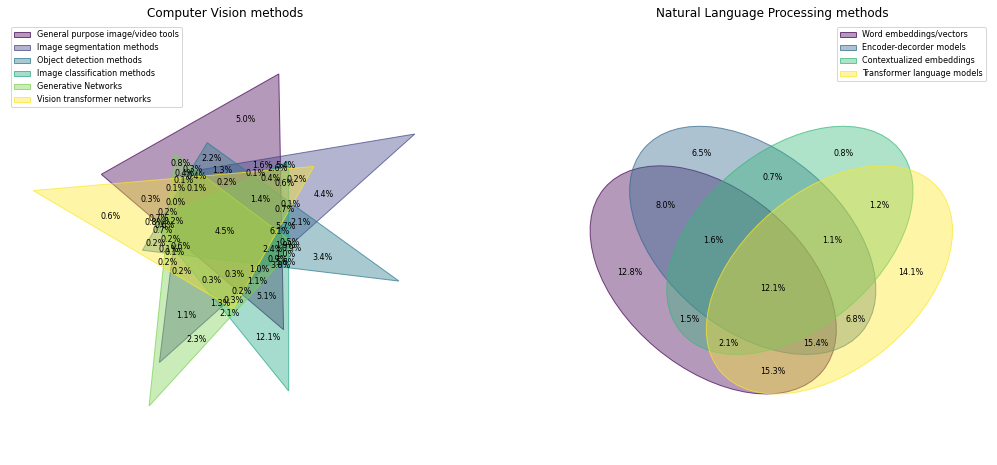

In [20]:
d1 = df[~df['Q20_1'].isnull()].index.tolist() 
d2 = df[~df['Q20_2'].isnull()].index.tolist() 
d3 = df[~df['Q20_3'].isnull()].index.tolist() 
d4 = df[~df['Q20_4'].isnull()].index.tolist()
d5 = df[~df['Q19_1'].isnull()].index.tolist() 
d6 = df[~df['Q19_2'].isnull()].index.tolist() 
d7 = df[~df['Q19_3'].isnull()].index.tolist() 
d8 = df[~df['Q19_4'].isnull()].index.tolist() 
d9 = df[~df['Q19_5'].isnull()].index.tolist() 
d10 = df[~df['Q19_6'].isnull()].index.tolist() 

_, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(18, 8))
labels = ['Word embeddings/vectors', 'Encoder-decorder models',
 'Contextualized embeddings', 'Transformer language models',
 'General purpose image/video tools', 'Image segmentation methods',
 'Object detection methods', 'Image classification methods',
 'Generative Networks', 'Vision transformer networks']
letters = iter(labels)

for n_sets, ax in zip(range(1,2), (ax1, ax2)):
    dataset_dict1 = {
        labels[4]: set(d5),
    labels[5]: set(d6),
    labels[6]: set(d7),
    labels[7]: set(d8),
    labels[8]: set(d9),
    labels[9]: set(d10),
    }
    venn(dataset_dict1, fmt="{percentage:.1f}%", fontsize=8, legend_loc="upper left", ax=ax1)
    ax1.title.set_text('Computer Vision methods')
    dataset_dict2 = {
        labels[0]: set(d1),
    labels[1]: set(d2),
    labels[2]: set(d3),
    labels[3]: set(d4),
    }
    venn(dataset_dict2, fmt="{percentage:.1f}%", fontsize=8, legend_loc="upper right", ax=ax2)
    ax2.title.set_text('Natural Language Processing methods')


Now let us understand more about each of them, and reach some conclusions for usage of the given methods in their respective areas:
<div class="alert alert-block alert-info"><center><b>Computer Vision</b></center></div>
 
- <div style="background-color:#D3D3D3">The participants working on Computer Vision is seen to share working in different CV methods like  General purpose image/video tools (PIL, cv2, skimage, etc); Image segmentation methods (U-Net, Mask R-CNN, etc); Object detection methods (YOLOv3, RetinaNet, etc); Image classification and other general purpose networks (VGG, Inception, ResNet, ResNeXt, NASNet, EfficientNet, etc); and, Generative Networks (GAN, VAE, etc); among other less popular ones. About 6.7% of them work with ALL of these methods, but the most popular one among them is the image classification method with a whopping majority over the next popular one. </div>
- Image clarification comprises of a variety of challenges, including viewpoint variation, scale variation, intra-class variation, image deformation, image occlusion, illumination conditions, and background clutter. CV researchers have come up with a data-driven approach to classify images into distinct categories. They provide the computer with a few examples of each image class and expand learning algorithms. Convolutional Neural Networks (CNNs) is the most famous architecture used for image classification. An average use case for CNNs is where one feeds the network images, and the network categorises the data. CNNs tend to start with an input “scanner” that isn’t intended to parse all the training data at once. For instance, to input an image of 100×100 pixels, one wouldn’t want a layer with 10,000 nodes.
- <div style="background-color:#D3D3D3">While image classification was already known to be the most popular one among the other methods generally, it was similarly refelected in the above graph. But the participants here are mostly seen to work only with image classification, and not a lot of them work with other methods. It could be because most of the beginners start with image classification, since most of the courses begin with an introduction to building classification models, before introducing to other methods.</div>
- Apart from that, 4 other methods find a place in the top 5 list, which includes Object Detection, Object Tracking, Semantic Segmentation, and Instance Segmentation. The 4th and the 5th collectively form the image segmentation <i>(Two major types of Image Segmentation: Semantic Segmentation: Objects classified with the same pixel values are segmented with the same colormaps. Instance Segmentation: It differs from semantic segmentation because different instances of the same object are segmented with different color maps.)</i> From the above graph it is similarly reflected here since it occupies the 2nd position in the list, and it seems like the many of the participants here otherwise also indulge in working with Object detection and general purpose image/video tools.   
- <div style="background-color:#D3D3D3">Image segmentation is the process of dividing an image into multiple segments. In this process, every pixel in the image is associated with an object type. Before detecting the objects and even before classifying the image, we need to understand what the image consists of, and this is where image segmentation helps. By applying Object Detection models, one can only be able to build a bounding box corresponding to each class in the image, not telling anything about the shape of the object as the bounding boxes are either rectangular or square in shape. Image Segmentation models on the other hand will create a pixel-wise mask for each object in the image. This technique gives a far more granular understanding of the object(s) in the image. Which explains why it has more popularity than object detection.</div>
- Object detection is the task to identify objects within images usually involving outputting bounding boxes and labels for individual items. It differs from the classification task by using classification and localization to many objects instead of a single dominant object. There are only two classes of object classification. One is object bounding boxes, and other is non-object bounding boxes. For instance, in vehicle detection, one has to identify all vehicles, including two-wheelers and four-wheelers, in a given image with their bounding boxes. In short, it presents many sizable challenges beyond what is required for image classification, particularly because of these five challenges: dual priorities, speed, multiple scales, limited data, and class imbalance. Because of all these reasons and the fact that it needs to be conducted in a controlled environment, it seems to be much less popular than image classification, but almost at par with image segmentation. 
- <div style="background-color:#D3D3D3">While we see much less participants working solely on object detection (being a challenging field), many of the participants also work on image segmentation and general purpose image/video tools. If we look at it from another angle, it might be suffice to say that object detection is popular to many people, but most of them seem to be pursuing it alongside other approaches. Could be because of the challenges it entails, and the lack of solutions to these problems. If more progress is made in this field, maybe it could gain even greater popularity in the future.</div>
- Among all of the CV methods, general purpose image/video tools seem to be the most sought after for sole experiementation with image/video processing (more than 15%). Now this could be because of various reasons. The most obvious one could be that since image processing is a method to perform some operations on an image, to get an enhanced image or to extract some useful information from it, it can be used <b>without</b> the use of the other CV methods. An analysis could be very useful for understanding the image data and performing other functions like image enhancement, restoration, encoding, and compression. <b>Other than that,an interesting point should be noted. Most of these processing tools either support Python along with some other langauges, or just Python. This further explains how the enhancement in various tools in Python has helped in the popularity and use of that language.</b>
- <div style="background-color:#D3D3D3">Generative Networks do not seem as popular as all the other CV methods, even though popular generative networks like GANs remain as the most versatile neural network architectures in use today. It could be because of the problems: non-convergence (the model parameters oscillate, destabilize and never converge); mode collapse (the generator collapses which produces limited varieties of samples), and diminished gradient (the discriminator gets too successful that the generator gradient vanishes and learns nothing, but this could be improved by modification of the loss function in order to remove the vanishing gradient challenge). But maybe because overall generative networks are hard to train, they are not much popular among the participants.</div>
   
   


<div class="alert alert-block alert-info"><center><b>Natural Language Processing</b></center></div>

- <div style="background-color:#D3D3D3">The participants working on Computer Vision is seen to share working in different NLP methods like: word embeddings/vectors (GLoVe, fastText, word2vec); encoder-decoder models (seq2seq, vanilla transformers); contextualized embeddings (ELMo, CoVe), transformer language models (GPT-3, BERT, XLnet, etc); among other less popular ones. Unfortunately from the graph, it seems that not any participant work with all of the listed methods. In fact, very little correlation is seen between all of them. </div>
- In NLP, word embedding is a term used for the representation of words for text analysis, typically capturing the semantic, syntactic context or a word/term that help understand how similar/dissimilar it is to other terms in an article, blog, etc. And it is known to be the most popular method among all, and it seems to show the same in the graph (over 40%). And the participants using word embeddings/vectors seem to use 2 of the other top methods listed here. The reason might be:
    - It can be learnt standalone, where a model is trained to learn the embedding, which is saved and used as a part of another model for your task later. This is a good approach if one would like to use the same embedding in multiple models.
    - Or, can be learnt jointly where the embedding is learned as part of a large task-specific model. This is a good approach if one only intend to use the embedding on one task.
- <div style="background-color:#D3D3D3">Because of its diverse nature, most of the NLP projects use pretrained word-embedding before using the other NLP models. Which is why we see many unions between word embeddings and other methods. Like image, it is always important to analyze text as well before working with it, and using word embeddings/vectors help us do that. But of course one only uses a new embedding (both static and updated types) if it results in better performance on your problem. Hence, it is popular, but not always required before approaching the other methods. </div>
- Transformers form the 2nd most popular of the list, but amazingly falls quite behind word embeddings, given that it is often termed as the <i>"coolest new NLP model"</i>. The idea behind Transformer is to handle the dependencies between input and output with attention and recurrence completely. BERT, one of the most used model, uses the transformer architecture in addition to a number of different techniques to train the model, resulting in a model that performs at a SOTA level on a wide range of different tasks.While XLNet (arguably considered better than BERT), uses a different approach than BERT to achieve bidirectional dependencies (i.e. being able to learn context by not just processing input sequentially). It also uses an extension of the transformer architecture known as Transformer XL, which enables longer-term dependencies than the original transformer architecture. These models gained popularity because of being able to handle the dependencies between input and output with attention and recurrence completely. Additionally, it allows for significantly more parallelization and can reach a new state of the art in translation quality. All these perks might be the reason why it is so popular among the participants. And people working with transformers otherwise seem to work together with word embeddings than with other models. Or maybe the participants working with it are also well versed with the other models of NLP. 
- <div style="background-color:#D3D3D3"> The 3rd one, encoder decoder models (in some cases known as Sequence to Sequence (Seq2Seq) model) can be used for image captioning, semantic analysis and translation. Being a key model for understanding the advances in NLP (forms the seed for attention models and transformers), it can be used for many interesting works applications such as video captioning or question and answer. But all the information needs to be summarized in one dimensional vector, for long input sequences that can be extremely difficult to achieve. And also because of its limitations as an end-to-end approach, it can not be used for diverse applications. And like it was predicted, many of the participants who work with encoder decoder models, also work with transformers and word embeddings. </div>
- Contextualized embeddings seem to be the least popular of all the methods and also used solely by the participants who work on it (may be for specialization purposes), because none of the participants who work on other method is seen to be working on this. One of the most used contextualized embedding, ELMO is embeddings from language models, hence a deep contextualized word representation (CoVe uses a supervised task like machine translation while ELMo uses an unsupervised task like language modelling). It is a breakout version of word token vectors or contextual word vectors and it learns word token vectors using long contexts, not context windows. It learns a deep bi-NLM and uses all its layers in prediction. (t uses Recurrent Neural Networks (RNNs) in the form of Long Short Term Memory (LSTM) architecture to generate contextualized word embeddings. ELMo, unlike BERT, is <b>not</b> built on the transformer architecture. However, it struggles with context-dependency on larger sentences because of that. It uses LSTMs to process sequential text. ELMo is like a bridge between the previous approaches such as GLoVe and Word2Vec and the transformer approaches such as BERT. But it is better to train the language model in the corpus that is related to the task that one is working on, and also use several techniques to improve the Language Model by including CNN character features or more deeper models as long as one gets a hidden representation to the words. This is where the other models come to play.


### ML model hubs/repositories
First, a little introduction to what they mean. The hubs and/or repositories usually offer a range of models, datasets, and ML demo apps, all open source and publicly available, in an online platform where people can easily collaborate and build ML together. These repositories of trained machine learning models and frameworks are then ready for fine-tuning and deployment anywhere. Let's now focus on their usage.

In [21]:
df_q21 = df.loc[:,['Q21_1', 'Q21_2', 'Q21_3', 'Q21_4',
       'Q21_5', 'Q21_6', 'Q21_7', 'Q21_8', 'Q21_9', 'Q21_10']]

df_q21 = pd.DataFrame(list(df_q21.stack().value_counts().items()), columns = ['Hubs', 'count'])
df_q21['Hubs'] = df_q21['Hubs'].replace({'No, I do not download pre-trained model weights on a regular basis': 'Never/seldom downloaded'})
df_q21['Hubs'] = df_q21['Hubs'].replace({'Other storage services (i.e. google drive)': 'Other storage services'})


df_q22 = df['Q22'].value_counts().reset_index(name='count')
df_q22['blob_count'] = df_q22.apply(lambda x: x["count"] / 25, axis = 1)
df_q22['index'] = df_q22['index'].replace({'Other storage services (i.e. google drive)': 'Other storage services'})

colors = ['lightslategray',] * 10
colors[0] = 'crimson'

fig = tools.make_subplots(rows=1, cols=1, shared_xaxes=True,
                                    shared_yaxes=False)

trace0 = go.Scatter(
                x=df_q22['index'],
                y=df_q22['count'],
                mode='markers',
                marker_size=df_q22['blob_count'], 
                #line=dict(color='teal'),
                showlegend=False,
                name='ML model hubs/repositories',
                marker=dict(
            color='midnightblue',
            size=20,
            line=dict(
                color='black',
                width=2
            )
        )
)

trace1 = go.Bar(
                x=df_q21['Hubs'], y=df_q21['count'], showlegend=False, text =df_q21['count'],
                marker=dict(color='lightblue',line=dict(color='teal',width=1)), textposition='outside',
                name='ML model hubs/repositories', marker_color=colors, opacity=0.8
                
)
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 1)
fig.update_yaxes(range=[0,7700])

fig.update_layout(height=500, width=800, 
                  margin=dict(b=0,r=20,l=20), 
                  title_text="Usage of different ML model hubs/repositories", title_x=0.5, title_y=0.86,
                  template="plotly_white",
                  title_font=dict(size=20, color='#444', family="Muli, sans-serif"),
                  font=dict(color='#8a8d93'),
                  hoverlabel=dict(bgcolor="#f2f2f2", font_size=13, font_family="Lato, sans-serif"))

fig.show()

The graph compares the frequency of usage of the repositories/hubs to how much the participants have (or attempted to have) downloaded pre-trained model weights from the same. As we can see from there, a fair number of participants have never or seldom downloaded from these hubs/repositories. For others, their most usages of the repositories are somehow inconsistent to how much they have downloaded resources from the same. 

Kaggle holds a clear majority in terms of usage as well as download frequencies. But for the others, some of the repositories/hubs are popular, while some are not as much, even if they are used quite frequently by some of the participants. For frameworks like Tensorflow and PyTorch, while a larger people have tried them, they are proportionally not used as much for building and deploying machine learning models on a daily basis. Task-specific models like Huggingface and Timm are proportionally used and frequented more. 


## Professions
Like we had discovered, most of the participants are students, consisting of more than a quarter of the lot. Considering that the Kaggle platform is very much useful for the beginners and ameteurs in learning, pursuing and enhancing their data science skillsets, it is no wonder that they form a large chunk of the Kaggle community. But what are the different job roles of the working professionals who are a part of our community? Are they all DS-related? Let us now analyze it from different angles.

### Yearly compensation and ML experience
First, we see the job roles and see how much they are compensated yearly with respect to their experience in using ML methods. Maybe we can find some correlations between the two with respect to the job roles in the current state, that might be useful for the student population who are looking to be introduced in (or go back to) the job market in the coming years.

But before we take a look at the code, it should be noted that the income ranges have been further divided into four major groups (lower income, lower-middle income, upper-middle income, and upper income) for this plot study. They are:

- Lower income bracket: '0-999', '1,000-1,999', '2,000-2,999', '3,000-3,999','4,000-4,999', '5,000-7,499', '7,500-9,999'
- Lower middle income bracket: '10,000-14,999', '15,000-19,999', '20,000-24,999', '25,000-29,999', '30,000-39,999', '40,000-49,999'
- Upper middle income bracket: '50,000-59,999', '60,000-69,999', '70,000-79,999', '80,000-89,999', '90,000-99,999', '100,000-124,999', '125,000-149,999'
- Upper income bracket: '150,000-199,999','200,000-249,999', '250,000-299,999', '300,000-499,999', '500,000-999,999', '>1,000,000'

<div class="alert alert-block alert-danger">
<b>Disclaimer:</b> 
     Please note that it is taken into account that the range of income limits might vary depending on countries, companies and for various other reasons. But for this study, it is assumed that a standard income bracket is maintained by the companies of all the participants, irrespective of their countries. <b>All income bracket ranges are in US dollars($).</b>
</div>

In [22]:
df_q16_q23_q29 = df[['Q16', 'Q23', 'Q29']].dropna() 

df_q16_q23_q29 ['Q16'] = df_q16_q23_q29['Q16'].replace(dict.fromkeys(['Under 1 year', '1-2 years', '2-3 years'],'Beginner'))
df_q16_q23_q29 ['Q16'] = df_q16_q23_q29['Q16'].replace(dict.fromkeys(['3-4 years', '4-5 years', '5-10 years'],'Intermediate'))
df_q16_q23_q29 ['Q16'] = df_q16_q23_q29['Q16'].replace(dict.fromkeys(['10-20 years', '20 or more years'],'Advanced'))
df_q16_q23_q29 ['Q16'] = df_q16_q23_q29['Q16'].replace({'I do not use machine learning methods': 'No experience'})

df_q16_q23_q29 ['Q29'] = df_q16_q23_q29['Q29'].replace(dict.fromkeys([ '$0-999', '1,000-1,999', '2,000-2,999', '3,000-3,999',
                                                                       '4,000-4,999', '5,000-7,499', '7,500-9,999'],'Lower-income bracket'))
df_q16_q23_q29 ['Q29'] = df_q16_q23_q29['Q29'].replace(dict.fromkeys([ '10,000-14,999', '15,000-19,999', 
                                                                      '20,000-24,999', '25,000-29,999', '30,000-39,999',
                                                                       '40,000-49,999'],'Lower-middle-income bracket'))
df_q16_q23_q29 ['Q29'] = df_q16_q23_q29['Q29'].replace(dict.fromkeys([ '50,000-59,999', '60,000-69,999', '70,000-79,999',
                                                                      '80,000-89,999', '90,000-99,999', '100,000-124,999',
                                                                       '125,000-149,999'],'Upper-middle income bracket'))
df_q16_q23_q29 ['Q29'] = df_q16_q23_q29['Q29'].replace(dict.fromkeys(['150,000-199,999','200,000-249,999',
                                                                       '250,000-299,999', '300,000-499,999',
                                                                       '$500,000-999,999', '>$1,000,000'],'Upper-income bracket'))

df_q16_q23_q29 ['Q23'] = df_q16_q23_q29['Q23'].replace({'Data Analyst (Business, Marketing, Financial, Quantitative, etc)': 'Data Analyst'})
df_q16_q23_q29 ['Q23'] = df_q16_q23_q29['Q23'].replace({'Engineer (non-software)': 'Engineer'})
df_q16_q23_q29 ['Q23'] = df_q16_q23_q29['Q23'].replace({'Machine Learning/ MLops Engineer': 'ML/MLops Engineer'})
df_q16_q23_q29 ['Q23'] = df_q16_q23_q29['Q23'].replace({'Manager (Program, Project, Operations, Executive-level, etc)': 'Manager'})
df_q16_q23_q29 ['Q23'] = df_q16_q23_q29['Q23'].replace({'Teacher / professor': 'Teacher/Professor'})

df_q16_q23_q29 = round(pd.crosstab(df_q16_q23_q29['Q29'], [df_q16_q23_q29['Q23'],df_q16_q23_q29['Q16']], normalize='index'), 2).T.reset_index()

df_q16_q23_q29_inexperience = df_q16_q23_q29[df_q16_q23_q29['Q16']=='No experience']
df_q16_q23_q29_beginner = df_q16_q23_q29[df_q16_q23_q29['Q16']=='Beginner']
df_q16_q23_q29_intermediate = df_q16_q23_q29[df_q16_q23_q29['Q16']=='Intermediate']
df_q16_q23_q29_expert = df_q16_q23_q29[df_q16_q23_q29['Q16']=='Advanced']

fig = make_subplots(rows=1, cols=4, shared_yaxes=True, horizontal_spacing=0, vertical_spacing=0) 

fig.add_trace(go.Bar(y=df_q16_q23_q29_beginner['Q23'], x=df_q16_q23_q29_beginner['Lower-income bracket'], marker_color='teal', name='Beginner-level',
                    orientation='h', opacity=0.8,),
                     row=1, col=1)
fig.add_trace(go.Bar(y=df_q16_q23_q29_intermediate['Q23'], x=df_q16_q23_q29_intermediate['Lower-income bracket'], marker_color='orange', name='Intermediate-level',
                     orientation='h', opacity=0.8),
                     row=1, col=1)
fig.add_trace(go.Bar(y=df_q16_q23_q29_expert['Q23'], x=df_q16_q23_q29_expert['Lower-income bracket'], marker_color='rgb(102, 102, 102)', name='Expert-level',
                     orientation='h', opacity=0.8),
                     row=1, col=1)
fig.add_trace(go.Bar(y=df_q16_q23_q29_inexperience['Q23'], x=df_q16_q23_q29_inexperience['Lower-income bracket'], marker_color='#fee135', name='No experience',
                     orientation='h', opacity=0.8),
                     row=1, col=1)

fig.add_trace(go.Bar(y=df_q16_q23_q29_beginner['Q23'], x=df_q16_q23_q29_beginner['Lower-middle-income bracket'], marker_color='teal', name='Beginner-level',
                     showlegend=False, orientation='h', opacity=0.8,),
                     row=1, col=2)
fig.add_trace(go.Bar(y=df_q16_q23_q29_intermediate['Q23'], x=df_q16_q23_q29_intermediate['Lower-middle-income bracket'], marker_color='orange', name='Intermediate-level',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=2)
fig.add_trace(go.Bar(y=df_q16_q23_q29_expert['Q23'], x=df_q16_q23_q29_expert['Lower-middle-income bracket'], marker_color='rgb(102, 102, 102)', name='Expert-level',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=2)
fig.add_trace(go.Bar(y=df_q16_q23_q29_inexperience['Q23'], x=df_q16_q23_q29_inexperience['Lower-middle-income bracket'], marker_color='#fee135', name='No experience',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=2)

fig.add_trace(go.Bar(y=df_q16_q23_q29_beginner['Q23'], x=df_q16_q23_q29_beginner['Upper-middle income bracket'], marker_color='teal', name='Beginner-level',
                     showlegend=False, orientation='h', opacity=0.8,),
                     row=1, col=3)
fig.add_trace(go.Bar(y=df_q16_q23_q29_intermediate['Q23'], x=df_q16_q23_q29_intermediate['Upper-middle income bracket'], marker_color='orange', name='Intermediate-level',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=3)
fig.add_trace(go.Bar(y=df_q16_q23_q29_expert['Q23'], x=df_q16_q23_q29_expert['Upper-middle income bracket'], marker_color='rgb(102, 102, 102)', name='Expert-level',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=3)
fig.add_trace(go.Bar(y=df_q16_q23_q29_inexperience['Q23'], x=df_q16_q23_q29_inexperience['Upper-middle income bracket'], marker_color='#fee135', name='No experience',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=3)

fig.add_trace(go.Bar(y=df_q16_q23_q29_beginner['Q23'], x=df_q16_q23_q29_beginner['Upper-income bracket'], marker_color='teal', name='Beginner-level',
                     showlegend=False, orientation='h', opacity=0.8,),
                     row=1, col=4)
fig.add_trace(go.Bar(y=df_q16_q23_q29_intermediate['Q23'], x=df_q16_q23_q29_intermediate['Upper-income bracket'], marker_color='orange', name='Intermediate-level',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=4)
fig.add_trace(go.Bar(y=df_q16_q23_q29_expert['Q23'], x=df_q16_q23_q29_expert['Upper-income bracket'], marker_color='rgb(102, 102, 102)', name='Expert-level',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=4)
fig.add_trace(go.Bar(y=df_q16_q23_q29_inexperience['Q23'], x=df_q16_q23_q29_inexperience['Upper-income bracket'], marker_color='#fee135', name='No experience',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=4)

fig.update_layout(height=450, width=800, 
                  title_text="Yearly compensation of participants based on the industrial sector <br> they work in and their experience in using ML methods", title_x =0.5, title_y = 0.96,
                  template="plotly_white", barmode='stack',
                  autosize=True,
                 # margin=dict(t=80, b=50, l=70, r=40),
                 plot_bgcolor='white', paper_bgcolor='white', 
                title_font=dict(size=18, color='#222A2A', family="Muli, sans-serif"),
                         font=dict(color='#222A2A'),
                         legend=dict(orientation="h", yanchor="bottom", y=1.005, xanchor="center", x=0.45),
                  margin=go.layout.Margin(
                            l=0, #left margin
                            r=0, #right margin
                            b=0, #bottom margin
                            t=80,
                        ),
                 )

fig['layout']['xaxis'].update(title_text='Lower income bracket', title_font=dict(size=11))
fig['layout']['xaxis2'].update(title_text='Lower-middle income bracket', title_font=dict(size=11))
fig['layout']['xaxis3'].update(title_text='Upper-middle income bracket', title_font=dict(size=11))
fig['layout']['xaxis4'].update(title_text='Upper income bracket', title_font=dict(size=11))


df_q16_q23_q29_yorder = list(df_q16_q23_q29.groupby(['Q23'])['Lower-income bracket','Lower-middle-income bracket',
                                                         'Upper-income bracket','Upper-middle income bracket'].sum().sum(axis=1).reset_index(name='counts').sort_values('counts')['Q23'].to_numpy())
fig.update_yaxes(categoryorder='array', categoryarray= df_q16_q23_q29_yorder)


fig.update_xaxes(zeroline=False,showticklabels=False, ticks="")
fig.update_layout(yaxis = dict(tickfont = dict(size=10)))
fig.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))

fig.show()

If we go by the graph above, it is evident that participants with lesser experience form the majority of the lower to lower-middle income groups, while the ones with most experiences are in the upper-income bracket. This is expected because it gives a general perception how experience in ML is valued in (possibly senior) positions for services in data science field. Interestingly enough, it is also seen that there are a good amount of beginners as well who fall into the upper-income bracket. Could it be that they have already mastered working on data science in the short span and hence secured good positions? Or maybe their job is based on some other field (which offers high compensation), but they themselves are budding data science practitioners, or maybe looking to switch their jobs. A general trend observed, is the same as whar was seen before, that the top 3 most popular industries offer more opportunities to all levels of ML coders than the others. Some outliers do lie in the lower-income bracket where people with expert-level coding experience are still present. What reason could that be? Here, it is worthwhile if we go back to the disclaimer as stated at the beginning, where we do not consider the income rates of different countries and companies, which possibly could be a reason with this unusual behavior. And this might be true for the lower and middle income groups as well. As expected, the lower income (and lower-middle) group has mostly the beginners, and as we go up the curve, more industries seem to provide more compensations to people with more experience. Some even compensating their workers accordingly, hence showing only beginners for the lower income and lower-middle income groups, and salary hike for those with more experience(like hospitality/ sports/ entertainment and military/ security/ defence). A general observation could be that for all of the industries stated here, the industries offer lesser positions, but more compensations to people with more experience (i.e., the senior positions). Yet there are a few sectors which are yet to implement data science in their work properly and hence offer less compensations (even less positions maybe) for their workload, like in Shipping/Transportation and Non-profit/Service.


### Gender vs Yearly compensation & Industry

Technology has long been seen as a domain which has been dominated by men for a long time.
~~~
"Women are still in minority in tech."
~~~

Stats from Tech Nation also suggested only 19% of the tech workforce are women. This figure is even less for black and Hispanic women at just 3% and Asian women just 5%.

> "According to females working in Silicon Valley in America, where three-quarters of the workforce is male, women are discouraged from perusing jobs in technology because of the ‘brogrammer’ tech culture which is bought in from college campuses. Another reason for there being so little women in technology is due to the lack of a talent pool. Figures show that fewer women are studying technology based subjects at school and university meaning employers have fewer women to choose from when recruiting." <br>- [Women in Tech](https://www.womenintech.co.uk/why-are-there-so-little-women-in-technology)

According to the [Data Scientist Demographics and Statistics in the US](https://www.zippia.com/data-scientist-jobs/demographics/):
~~~
Women Earn 92¢ For Every $1 Earned By Men
~~~

Hence, let us see how men and women (and other genders) predominate in the DS positions and their compensations over time, since these two reasons could explain their lesser participation.

#### Yearly compensations

In [23]:
df_q3_q29 = df[['Q3', 'Q29']].dropna(subset=['Q29'])
df_q3_q29['Q3'] = np.where(df_q3_q29['Q3'].isin(['Man', 'Woman']), df_q3_q29['Q3'], 'Others/Undisclosed')

df_q3_q29['Q29'] = df_q3_q29['Q29'].replace(dict.fromkeys([ '1,000-1,999', '2,000-2,999', '3,000-3,999'],'$1,000-3,999'))

df_q3_q29['Q29'] = df_q3_q29['Q29'].replace(dict.fromkeys([ '4,000-4,999', '5,000-7,499', '7,500-9,999'],'$4,000-9,999'))
df_q3_q29['Q29'] = df_q3_q29['Q29'].replace(dict.fromkeys([ '10,000-14,999', '15,000-19,999'],'$10,000-19,999'))
df_q3_q29['Q29'] = df_q3_q29['Q29'].replace(dict.fromkeys([ '20,000-24,999', '25,000-29,999', ],'$20,000-29,999'))
df_q3_q29['Q29'] = df_q3_q29['Q29'].replace(dict.fromkeys([ '30,000-39,999',
                                                                       '40,000-49,999'],'$30,000-49,999'))
df_q3_q29['Q29'] = df_q3_q29['Q29'].replace(dict.fromkeys(['40,000-49,999', '50,000-59,999'],'$40,000-59,999'))
df_q3_q29['Q29'] = df_q3_q29['Q29'].replace(dict.fromkeys(['60,000-69,999', '70,000-79,999',
                                                                      '80,000-89,999'],'$60,000-89,999'))
df_q3_q29['Q29'] = df_q3_q29['Q29'].replace(dict.fromkeys(['90,000-99,999', '100,000-124,999',
                                                                       '125,000-149,999'],'$90,000-149,999'))
df_q3_q29['Q29'] = df_q3_q29['Q29'].replace(dict.fromkeys(['150,000-199,999','200,000-249,999',
                                                                       '250,000-299,999'],'$150,000-299,999'))
df_q3_q29['Q29'] = df_q3_q29['Q29'].replace(dict.fromkeys(['300,000-499,999',
                                                                       '$500,000-999,999'],'$300,000-999,999'))

df_q3_q29 = pd.crosstab(df_q3_q29['Q29'], df_q3_q29['Q3']).reset_index()

df_q3_q29['total'] = df_q3_q29[['Man', 'Woman', 'Others/Undisclosed']].sum(axis=1)
df_q3_q29 = df_q3_q29.sort_values(by ='total', ascending=False)

fig = go.Figure()
fig.add_trace(go.Bar(x=df_q3_q29['Q29'], y=df_q3_q29['Man'], name = "Man",
                 marker_color = 'rgb(0, 134, 149)', text = df_q3_q29['Man'], textposition = "outside",
))
fig.add_trace(go.Bar(x=df_q3_q29['Q29'], y=-df_q3_q29['Woman'], name = "Woman", 
            marker_color = 'orange', text = df_q3_q29['Woman'], textposition = "outside"))
fig.add_trace(go.Bar(x=df_q3_q29['Q29'], y=-df_q3_q29['Others/Undisclosed'], name = "Others/Undisclosed",
            marker_color = 'grey', text = df_q3_q29['Others/Undisclosed'], textposition = "outside"))

fig.add_shape(type='line',
                x0=-0.5,
                y0=0.332,
                x1=11,
                y1=0.332,
                line=dict(color='black', dash='dot'),
                xref='x',
                yref='paper'
)

fig.update_layout(barmode='relative', 
    title_text='Gender Ratio based on yearly compensation', template="plotly_white",
    height=450, width=800, title_x = 0.5, yaxis_title=" ", 
    legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5)
)
fig.update_yaxes(visible=False, range=[-500,1000])
fig.update_xaxes(visible=True, categoryorder='array', 
                 categoryarray= ['$0-999', '$1,000-3,999', '$4,000-9,999', '$10,000-19,999',
       '$20,000-29,999', '$30,000-49,999', '$40,000-59,999', '$60,000-89,999', '$90,000-149,999',
       '$150,000-299,999', '$300,000-999,999', '>$1,000,000'])


This graph when arranged in ascending order of yearly compensations does not shade much light in the proportional differences in pays with respect to gender (other than the participation of the different genders, which is anticipated anyway because of their lesser number). 

#### Industry

In [24]:
df_q3_q24 = df[['Q3', 'Q24']]
df_q3_q24['Q3'] = np.where(((df_q3_q24['Q3'] != 'Man') & (df_q3_q24['Q3'] != 'Woman')),'Other/Undisclosed genders',df_q3_q24['Q3'])
df_q3_q24 = pd.crosstab(df_q3_q24['Q24'], df_q3_q24['Q3']).reset_index()

fig = go.Figure()
fig.add_trace(go.Bar(x=df_q3_q24['Q24'], y=df_q3_q24['Man'], name = "Man",
                 marker_color = 'teal', text = df_q3_q24['Man'], textposition = "outside",
))
fig.add_trace(go.Bar(x=df_q3_q24['Q24'], y=-df_q3_q24['Woman'], name = "Woman",
            marker_color = 'orange', text = df_q3_q24['Woman'], textposition = "outside"))
fig.add_trace(go.Bar(x=df_q3_q24['Q24'], y=-df_q3_q24['Other/Undisclosed genders'], name = "Other/Undisclosed genders",
            marker_color = 'lightblue', text = df_q3_q24['Other/Undisclosed genders'], textposition = "outside"))

fig.update_layout(barmode='relative',  template="plotly_white",                 
    title_text='Gender Ratio based on their current industry',
    height=500, width=800, title_x = 0.45, yaxis_title=" ", xaxis_title="Industries",
    legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5),
                  margin=go.layout.Margin(
                            l=0, #left margin
                            r=0, #right margin
                            b=0, #bottom margin
                            t=70,
                        ),
                  
)

fig.update_xaxes(visible=True, categoryorder='total descending')
fig.update_yaxes(visible=False, range=[-800,2500])
fig.show()

Looking at this graph, it can be verified that those study results are true since the 3 industries- <b>Computers/Technology, Academics/Education</b> and <b>Accounting/Finance</b>) seem to dominate a lot over the other industrial sectors. While the reading is differentiated based on gender to see if any of the sectors show a different hiring trend than the other, it is clear that irrespective of the genders, most of them show a similar trend in hiring. But the proportion of the genders again is an issue here. While the academics and technology see to employ a much higher number of other genders (not male) as compared to the others, especially in academia, the other industries however seem to show even lesser proportion. The financial sector seems to be lagging behind in terms of participation/hiring of other genders. <b>A report on Wall Street Financial Firms had shown that it the most important reason it was dominated by men is because the largest gap in pay between women and men is in the financial services sector.</b>

Hence, it is of great need that the participation of other genders are equally promoted in all the sectors to support a fair and just environment where everyone can progress based on their hard work, not on their gender.

Let us now check the relation between the job roles and the industry sectors.



#### Industry vs Job Role
Going by the previous observation, let us now check with the intersection between the two based on genders.

In [25]:
#box plot of sectors and jobs based on gender
df_q3_q23_q24 = df[['Q3', 'Q23', 'Q24']].dropna()
df_q3_q23_q24['Q3'] = np.where(((df_q3_q23_q24['Q3'] != 'Man') & (df_q3_q23_q24['Q3'] != 'Woman')),'Other/Undisclosed genders',df_q3_q23_q24['Q3'])

df_q3_q23_q24['Q23'] = df_q3_q23_q24['Q23'].replace({'Engineer (non-software)': 'Engineer'})
df_q3_q23_q24['Q24'] = df_q3_q23_q24['Q24'].replace({'Online Service/Internet-based Services': 'Online/Internet Services'})
df_q3_q23_q24['Q23'] = df_q3_q23_q24['Q23'].replace({'Data Analyst (Business, Marketing, Financial, Quantitative, etc)': 'Data Analyst'})
df_q3_q23_q24['Q23'] = df_q3_q23_q24['Q23'].replace({'Manager (Program, Project, Operations, Executive-level, etc)': 'Manager'})
df_q3_q23_q24 = df_q3_q23_q24[df_q3_q23_q24['Q24'].str.contains("Other") == False]

names = ['Gender', 'Job role', 'Industry']
df_q3_q23_q24.columns = names

df_q3_q23_q24 = df_q3_q23_q24[(df_q3_q23_q24['Job role'] != "Student") & (df_q3_q23_q24['Job role'] != "Currently not employed")] # Since they cannot be working in any industry right now


fig = px.box(df_q3_q23_q24, y="Job role", x="Industry", notched=True, color="Gender")
fig.update_layout(title_text ="Occupation vs Industry Sector based on all the genders", title_x = 0.5, title_y = 0.98)
fig.update_xaxes( categoryorder='total ascending')
fig.update_layout(yaxis = dict(tickfont = dict(size=9)), xaxis = dict(tickfont = dict(size=9)))
fig.update_layout(height=450, width=850, legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5, font_size=8)) 

fig.show()

Studying the plot above, it can be seen that most of the occupations in data science are spread around a few selected industry sectors. In fact, it further demonstrate what we had seen in the previous plot, that is, the three major sectors- take up for most of the participants, in quite a few job roles (with technology showing the bulk number). 
Also, since this data can be termed as a sample collection, including the notches give us an useful insight about our data. Notches are used to show the most likely values expected for the median when the data represents a sample. When a comparison is made between groups, you can tell if the difference between medians are statistically significant based on if their ranges overlap. If any of the notch areas overlap, then it is said that the medians are statistically different; if they do not have overlap, then we can have good confidence that the true medians differ. But many of them seem to have the overlap around the region near 'other' industry sector. Otherwise for the other values, the medians do show that they are statistically different, hence indicating unique distributions which have skews and outliers.

The gender distribution across different industries based on their job roles are also crucial as it gives us an idea of their involvement across the sectors. Typically the other/undisclosed gender is shown here to have a much lesser participation (as evident from the gender distribution we saw previously), while the men and women have more compact distributions across the plot. Their spread or distribution across the different industry and profession is almost equal, apart from the differences in their participation (based on the levels of equivalent boxes for both across the plot). 

```So, we can infer from these plots that we need more participation from both the under-represented genders (female and others/undisclosed), alongwith equal pay for the same level of profession in any industry.```



## Company sizes

Being in the job market is tough. Even tougher is to find the roles which are suitable for you. Often times, people do not get the chance much of a choice in getting the role they want, or in the company they want to work in. So they eventually end up thinking,
~~~
"Is this the right job for me?"
~~~
The question is especially daunting for someone who are about to step into the professional life for the first time. So, it helps in getting an idea of the current job market, and hence give an idea of where they should look for. The choice however is individualistic and would depend on a person's preference. So there's no such thing as _THE_ right job, but there are of course different factors one should consider while applying. This would help them to decide which kind of work environment suits best for them.

>["There are lot of different factors to consider when deciding what kind of companies to work for. It’s definitely helpful to know the generic comparison, but you should always try to learn as much as possible about the specific company you’re considering in order to make better judgements since there ARE outliers to the general trend. You also might want different things at a different stage of your career, so it’s not uncommon for people to switch between different types of companies; don’t be afraid of making the wrong choice, you can always try things out and make the switch when it’s not working out."](https://towardsdatascience.com/should-you-join-a-big-corporation-or-a-small-startup-as-a-data-scientist-1b7f4d83f5c6)

According to this [article](https://candor.co/articles/career-paths/data-science-careers-does-company-size-matter):
<div class="alert alert-block alert-info"><center>"Not all data scientist jobs are built the same and company size matters A LOT."</center></div>

Picking the right company is important for anyone looking for jobs, since the job interpretation of the same role might vary at different growth stages which is based on the company sizes.

Some usual kinds of company types based on the company sizes are:
- Under 150 people: Startups & Small Companies Building Data Products
- Under 300 people: Startups & Small Companies Analyzing Their Own Data
- Over 10,000 people: Fortune 500 & Mid-Sized Companies
  <br><i>FAANG & Large Companies With Mature Data Teams also fall under this category.</i>

Let us look at certain ways one can analyze depending on the company sizes
#### Individual workloads
Let us now see how many people are responsible for DS workloads based on the company sizes. But why is it important?

Primarily because of work-life balance. While some kind of work culture might be suitable for some, it might not be for some other. Seeing how different companies operate would be helpful.

In [26]:
df_q25_q26 = pd.crosstab(df['Q25'], df['Q26']).reset_index().reindex(['Q25', '0', '1-2', '3-4', '5-9', '10-14', '15-19', '20+'], axis=1)

# Normalizing along each company sizes
df_q25_q26[['0', '1-2', '3-4', '5-9', '10-14', '15-19', '20+']] = round(df_q25_q26[['0', '1-2', '3-4', '5-9', '10-14', '15-19', '20+']].apply(lambda x: x/x.sum(), axis=1), 3)
df_q25_q26['Q25'] = df_q25_q26['Q25'].replace({
                                            '0-49 employees': '0-49', 
                                            '10,000 or more employees': '10,000+',
                                            '1000-9,999 employees': '1,000-9,999', 
                                            '250-999 employees': '250-999', 
                                            '50-249 employees': '50-249'
                                            })

fig = go.Figure()

fig = go.Figure(data=[
    go.Bar(x=df_q25_q26["Q25"], y=df_q25_q26['0'], marker_color = '#065769', name='People responsible: 0',textposition = 'outside', text = df_q25_q26['0']),
    go.Bar(x=df_q25_q26["Q25"], y=df_q25_q26['1-2'], marker_color = '#15778c', name='People responsible: 1-2',textposition = 'outside', text = df_q25_q26['1-2']),
    go.Bar(x=df_q25_q26["Q25"], y=df_q25_q26['3-4'], marker_color = '#2d9cb5', name='People responsible: 3-4',textposition = 'outside', text = df_q25_q26['3-4']),
    go.Bar(x=df_q25_q26["Q25"], y=df_q25_q26['5-9'], marker_color = '#41b7d1', name='People responsible: 5-9', textposition = 'outside',text = df_q25_q26['5-9']),
    go.Bar(x=df_q25_q26["Q25"], y=df_q25_q26['10-14'], marker_color = '#55cbe6', name='People responsible: 10-14', textposition = 'outside',text = df_q25_q26['10-14']),
    go.Bar(x=df_q25_q26["Q25"], y=df_q25_q26['15-19'], marker_color = '#6ddaf2', name='People responsible: 15-19',textposition = 'outside', text = df_q25_q26['15-19']),
    go.Bar(x=df_q25_q26["Q25"], y=df_q25_q26['20+'], marker_color = '#92e9fc', name='People responsible: 20+',textposition = 'outside', text = df_q25_q26['20+']),
    go.Line(x=df_q25_q26["Q25"], y=df_q25_q26['0'], marker_color = '#065769', showlegend=False),
    go.Line(x=df_q25_q26["Q25"], y=df_q25_q26['1-2'], marker_color = '#15778c', showlegend=False),
    go.Line(x=df_q25_q26["Q25"], y=df_q25_q26['3-4'], marker_color = '#2d9cb5', showlegend=False),
    go.Line(x=df_q25_q26["Q25"], y=df_q25_q26['5-9'], marker_color = '#41b7d1', showlegend=False),
    go.Line(x=df_q25_q26["Q25"], y=df_q25_q26['10-14'], marker_color = '#55cbe6', showlegend=False),
    go.Line(x=df_q25_q26["Q25"], y=df_q25_q26['15-19'], marker_color = '#6ddaf2', showlegend=False),
    go.Line(x=df_q25_q26["Q25"], y=df_q25_q26['20+'], marker_color = '#92e9fc', showlegend=False)
])

fig.update_layout(                
    title_text='Company size and number of individuals who are responsible <br> for data science workloads',
    height=400, width=800,  title_x = 0.5, yaxis_title=" ", xaxis_title="Number of employees in the companies", title_y = 0.95,
    legend=dict(orientation="h", yanchor="bottom", y=0.999, xanchor="center", x=0.5, font_size=8)
)

fig.update_xaxes(visible=True, matches='x', categoryorder='array', 
                 categoryarray= ['0-49', '50-249', '250-999', '1,000-9,999', '10,000+',])
fig.update_yaxes(visible=False)

fig.show()

Commonly, with increase in the size of companies, the companies should hire more employees to certain key positions. Data science has recently gained much popularity, thanks to the diversity it possesses and the usefulness it provides. One of the advantages of data science is that organizations can find when and where their products sell best. This can help deliver the right products at the right time—and can help companies develop new products to meet their customers' needs. But it is still seen that many companies keep a fairly low employees in these key positions. The proportion and balance is clearly missing, and it has been reflected similarly in the above graph. Maybe some conclusions can be taken out of it.

While it is impressive to see that many small-sized companies employ a lot of data science workers (having 20+ on the team, for a company sized at less than 50 is impressive), it could be because those companies are more focused on data science like the second company type stated before (e.g., some firms provide data science consultancy services). And the curve of having more data science members for bigger-sized companies is seen, as expected. But it is still seen that many companies with more employees have a really small data science team. This could be because these companies might have independent teams, which are dispersed; or that they have a different job focus. While it may be that most of them appoint external services for their data science works, it is better if they still employ more people to handle the data. And for the bigger companies which are more data-centric, they have large scale data sets, touch on the most cutting-edge data problems, and use the best tools. Hence, the number of people responsible are also much more.

#### Industry
With the increasing number of companies in recent years, creating new programs within the company is an imperative for success. 'Industry' by definition, refers to a much more specific group of companies or businesses.
>"The term industry refers to a series of companies that operate in a similar business sphere, and its categorization is more narrow." <br>
-[Investopedia](https://www.investopedia.com/ask/answers/05/industrysector.asp)

Taking a closer look at how companies of different sizes operate in the different industries. First, we group the company sizes as the following:
- <b>Low</b>: Having 0-249 employees
- <b>Meidum</b>: Having 250-9,999 employees
- <b>High</b>: Having 10,000+ employees

In [27]:
#Low company size
df_q24_q25_l = df[(df['Q25'] == '0-49 employees') | (df['Q25'] == '50-249 employees')][['Q24', 'Q25']]
df_q24_q25_l = df_q24_q25_l['Q24'].value_counts().rename_axis('Industry').reset_index(name='Counts').sort_values(by=['Counts'], ascending=False)
df_q24_q25_l['Company size'] = 'Low'

#Medium company size
df_q24_q25_m = df[(df['Q25'] == '250-999 employees') | (df['Q25'] == '1000-9,999 employees')][['Q24', 'Q25']]
df_q24_q25_m = df_q24_q25_m['Q24'].value_counts().rename_axis('Industry').reset_index(name='Counts').sort_values(by=['Counts'], ascending=False)
df_q24_q25_m['Company size'] = 'Medium'

#high company size
df_q24_q25_h = df[df['Q25'] == '10,000 or more employees'][['Q24', 'Q25']]
df_q24_q25_h = df_q24_q25_h['Q24'].value_counts().rename_axis('Industry').reset_index(name='Counts').sort_values(by=['Counts'], ascending=False)
df_q24_q25_h['Company size'] = 'High'

df_q24_q25 = pd.concat([df_q24_q25_l, df_q24_q25_m, df_q24_q25_h], axis=0)
fig = px.funnel(df_q24_q25, x='Counts', y='Industry', color='Company size',
                       height=500, title='Industry by company sizes', width=800, 
                       category_orders={'Company size': ['Low', 'Medium', 'High']},
                       color_discrete_sequence=['teal', 'orange', 'lightblue'],
                       )
fig.update_traces(textposition='inside')
fig.update_layout(autosize=True,
                         margin=dict(t=110, b=50, l=70, r=40), title_x=0.5, title_y=0.92,
                         plot_bgcolor='white', paper_bgcolor='white', 
                         title_font=dict(size=21, color='#222A2A', family="Muli, sans-serif"),
                         font=dict(color='#222A2A'),
                         legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5))
fig.update_layout(
                 margin=go.layout.Margin(
                            l=0, #left margin
                            r=0, #right margin
                        ))
fig.update_yaxes(categoryorder='total descending')

Some general observations we learn from this plot, which further adds weight to our previous inference are:
- <div style="background-color:#D3D3D3"><b>Overall</b>: The 3 industries <b>Computers/Technology, Academics/Education</b> and <b>Accounting/Finance</b> take up the most number of companies across all the different sizes of the companies. The top one being consistent across all the three company sizes. 'Online and Internet-based services' interestingly takes up a lower position than expected (below medical, manufacturing and retail), yet if we had knowledge of the what industries fall under 'Others', it could have given us more opportunity to compare among the different industries.</div>
- <b>Low</b>: When it comes to small businesses though, Accounting/Finance seem to have moved to the 4th position ('Others' overtaking it by a good margin), while Online and internet-based services moved up to the 5th position. This could mean that most of the companies have a lower size in this particulae industry. Otherwise the rank of the industries look consistent with the overall rank. This gives us an idea on the indutry which most small companies fall under.
- <div style="background-color:#D3D3D3"><b>Medium</b>: When it comes to medium-sized companies, Accounting/Finance went back to its 3rd spot, indicating that most companies in this industry could be having a larger company size in general. This could be because both play a vital role in running a business because it helps one track income and expenditures, ensure statutory compliance, and provide investors, management, and government with quantitative financial information which can be used in making business decisions. Some other industries like 'Manufacturing/Fabrication' and 'Government/Public services' seem to move up in the ranking too. The possible reason for the first one could be because of the strong relationship between industrialisation and economic development is that the manufacturing sector is the driver of productivity growth. While the second could be because governments/public sector is defined as the ratio of public to total employment, hence accounting for their larger size.</div>
- <b>High</b>: Consistent with the previous point, Finance/Accounting and Manufacturing/Fabrication went up in the rank because of the same reason, which just proves how the comapnies in these industries usually have a larger size as compared to most others. 'Academics/Education' usually fall in the low to medium sized workforce with only a small percentage of staff being on academic contracts, and even less on full-time contracts. Hence its position in this section could be explained. Medical, government and retail usually have a higher number of staffs depending on the population they serve. Usually in all these 3 industries, a bigger size of the companies is expected to serve the population(/customers) better.

## Stages of ML incorporation based on participant's role
As this [article](https://www.techtarget.com/searchbusinessanalytics/feature/How-to-structure-and-manage-a-data-science-team) says:
<div class="alert alert-block alert-info"><center>"Organizations increasingly see data as a valuable asset that will help them succeed now and in the future."</center></div>
<p>With that in mind, there can be different ways the companies can set up a DS team, following the best practices for their structuring and management. Expanding on the previous section on the number of people responsible for DS role, it is important for us to see which stages the companies are at when it comes to ML incorporation (if at all). And equally important is to analyze that with respect to the participant's role in their respective company, to learn how many of them are already in DS-related roles.</p>


The different ML stages could be listed out as follows (not listing the ones where the participants are not aware of the stage(/s) their company is at):
```
● ML methods used for generating insights
● ML methods exploration (Stage 0)
● ML models in production for <2 yrs (Stage 1)
● ML models in production for >2 yrs (Stage 2)
● ML methods not used
```

In [28]:
df_q26_q27_q28 = df[['Q26', 'Q27', 'Q28_1', 'Q28_2', 'Q28_3', 'Q28_4', 'Q28_5', 'Q28_6', 'Q28_7', 'Q28_8']].dropna(subset=['Q26', 'Q27'])

df_q26_q27_q28 = df_q26_q27_q28.rename(columns={"Q28_1": "Analyze and understand data to influence product or business decisions", 
                               'Q28_2': 'Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data', 
                               'Q28_3': 'Build prototypes to explore applying machine learning to new areas', 
                               'Q28_4': 'Build and/or run a machine learning service that operationally improves my product or workflows', 
                               'Q28_5': 'Experimentation and iteration to improve existing ML models', 
                               'Q28_6': 'Do research that advances the state of the art of machine learning',  
                               'Q28_7': 'None of these activities are an important part of my role at work',                             
                               'Q28_8': 'Other'
                               })
                                        

df_q26_q27_q28['Q26'] = df_q26_q27_q28['Q26'].replace(dict.fromkeys(['0', '1-2', '3-4', '5-9'],'0-9'))
df_q26_q27_q28['Q26'] = df_q26_q27_q28['Q26'].replace(dict.fromkeys(['10-14', '15-19'],'10-19'))

df_q26_q27_q28['Q27'] = df_q26_q27_q28['Q27'].replace({'No (we do not use ML methods)': 'ML methods not used'})
df_q26_q27_q28['Q27'] = df_q26_q27_q28['Q27'].replace({'We are exploring ML methods (and may one day put a model into production)': 'ML methods exploration (Stage 0)'})
df_q26_q27_q28['Q27'] = df_q26_q27_q28['Q27'].replace({'We have well established ML methods (i.e., models in production for more than 2 years)': 'ML models in production for >2 yrs (Stage 2)'})
df_q26_q27_q28['Q27'] = df_q26_q27_q28['Q27'].replace({'We recently started using ML methods (i.e., models in production for less than 2 years)': 'ML models in production for <2 yrs (Stage 1)'})
df_q26_q27_q28['Q27'] = df_q26_q27_q28['Q27'].replace({'We use ML methods for generating insights (but do not put working models into production)': 'ML methods used for generating insights'})

df_q26_q27_q28 = df_q26_q27_q28[df_q26_q27_q28['Q27'].str.contains("I do not know") == False]

df_q26_q27_q28 = df_q26_q27_q28.rename(columns={"Q26": "Individuals responsible for DS workload", 
                               })

df_q26_q27_q28 = df_q26_q27_q28.groupby(['Q27', "Individuals responsible for DS workload"])[['Analyze and understand data to influence product or business decisions',
                                        'Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data',
                                        'Build prototypes to explore applying machine learning to new areas',
                                        'Build and/or run a machine learning service that operationally improves my product or workflows',
                                        'Experimentation and iteration to improve existing ML models',
                                        'Do research that advances the state of the art of machine learning',
                                        'None of these activities are an important part of my role at work',
                                        'Other'] 
                                 ].count().unstack().fillna(0).reset_index()


df_q26_q27_q28= df_q26_q27_q28.T


df_q26_q27_q28= df_q26_q27_q28[1:]
df_q26_q27_q28.columns = pd.MultiIndex.from_product([['ML methods exploration (Stage 0)', 'ML methods not used',
       'ML methods used for generating insights',
       'ML models in production for >2 yrs (Stage 2)',
       'ML models in production for <2 yrs (Stage 1)']])
cm1 = sns.light_palette("teal", as_cmap=True)
cm2 = sns.light_palette("orange", as_cmap=True)
cm3 = sns.light_palette("lightblue", as_cmap=True)

df_q26_q27_q28.columns = df_q26_q27_q28.columns.get_level_values(0)
df_q26_q27_q28.style.background_gradient(axis=0, cmap=cm1, subset=['ML methods exploration (Stage 0)', 'ML models in production for <2 yrs (Stage 1)'])\
    .background_gradient(axis=0, cmap=cm2, subset=['ML methods not used','ML models in production for >2 yrs (Stage 2)'])\
    .background_gradient(axis=0, cmap=cm3, subset=['ML methods used for generating insights'])\
    .set_caption("<b> <p style='font-size:20px';> <center> Participants' role vs different stages of incorporation of ML methods at their company <br> based on total number of individuals responsible for the DS workload </center> </p> </b>")\
    .format(precision=2).set_properties(**{
        'width': '80px',
        'max-width': '800px',
        'font-size': '9pt'
    })


Some observations we get from the aboce table are:
- Most of the companies where ML methods arw not used, have 0-9 people responsible for the DS roles. That could account for the companies where they have no people in DS teams at all. Interestingly though, some of the companies having medium to larger number of people in DS teams also do not use ML methods. Could they only be using it for analysing the data and preparing it for their usage? Or maybe using it to gain more insights of the available data? While some of the survey participants in these companies too do not seem to have any DS-role assigned to them, some others form an integral part of the DS-team, however small they are and could be very crucial to contributing to the different roles assigned to them for data analysis. This [post](https://www.javatpoint.com/data-science-vs-machine-learning) analyses the difference between DS and ML, which give us an idea on how the two may or may not operate interchangeably:
    > "Data Science is the study of data cleansing, preparation, and analysis, while machine learning is a branch of AI and subfield of data science. DS and ML are the two popular modern technologies, and they are growing with an immoderate rate. Data Science and Machine Learning are closely related to each other but have different functionalities and different goals. At a glance, Data Science is a field to study the approaches to find insights from the raw data. Whereas, Machine Learning is a technique used by the group of data scientists to enable the machines to learn automatically from the past data."
- <div style="background-color:#D3D3D3">We also see that a huge number of companies are in the Stage 0 and Stage 1 of the ML incorporation. But most of them have only 0-9 people responsible for the DS workload, with the participants' work fall within those specific job roles. A deeper dive to both the stages show that most of the participants are responsible for analyzing and understanding data to influence product or business decisions, especially for the data exploration stage companies as it surely forms the bulk of their DS work. Among other responsibilities for stage 0 companies, the participants would mostly work on building and/or running the data infrastructure; or building prototypes to explore applying ML to new areas (which shows the company's interest in exploring and moving to the other stages perhaps). </div>
- For stage 1 companies, building and/or running the data infrastructure form a key responsibility for many of the participants, alongside other responsibilities like experimentating and iterating to improve their existing ML models; and building and/or running a ML service that operationally improves their product. Both of which can thus be considered as important responsibilities for companies who have models in production for less than 2 years. In fact, all the responsibilities seem relevant because that stage requires more focus for processing and model optimization. And it is reflected here as well. Not to mention that this stage also has a lot more companies having 20+ people sharing the DS workload, which could explain the aforementioned reason.
- <div style="background-color:#D3D3D3">For companies only using ML methods for generating insights, the most relevant responsibility would be to analyze and understand the data. Hence, they might not require as much of a DS workforce as the other companies who are in various stages of ML incorporation, which again explains the smaller workload most of them have. Many of them also seem to be building and/or running the data infrastructure for their business, but not much of the other responsibilities.</div>
- For stage 2 companies, while they mostly have 0-9 people working on DS, some still have 20+ people assigned for DS workload (thoough not as much as stage 1 companies). Of the participants' responsibilities form the bulk of their job roles are analyzing and understanding the data and building prototypes to explore applying ML to new areas. Since these companies have already incorporated ML production for more than 2 years and seem satisfied with the outcome, it might be a reason for them to explore more. In fact, all the other responsibilities are also much popular for these kind of companies including researching on advancing the state of the art of ML look to be of higher importance than the others.

It is important to note here that many of the participants take up more than one responsibilities in their job role. A general observation we get from here is that for the companies who do assign DS workload, analyzing and understanding the data to influence product or business decisions seem to be the primary focus for all of them.

## Job roles based on professions
This could be an interesting analysis to understand what roles are expected from the job descriptions. Like we had discussed before, the role expectations could change depending on a number of determiing factors, one of the main ones being the yearly compensations they get.

In [29]:
df_q23_q28_q29 = df.copy()
df_q23_q28_q29['Q29'] = df_q23_q28_q29['Q29'].replace(dict.fromkeys([ '$0-999', '1,000-1,999', '2,000-2,999', '3,000-3,999',
                                                                       '4,000-4,999', '5,000-7,499', '7,500-9,999'],'Lower-income bracket'))
df_q23_q28_q29['Q29'] = df_q23_q28_q29['Q29'].replace(dict.fromkeys([ '10,000-14,999', '15,000-19,999', 
                                                                      '20,000-24,999', '25,000-29,999', '30,000-39,999',
                                                                       '40,000-49,999'],'Lower-middle-income bracket'))
df_q23_q28_q29['Q29'] = df_q23_q28_q29['Q29'].replace(dict.fromkeys([ '50,000-59,999', '60,000-69,999', '70,000-79,999',
                                                                      '80,000-89,999', '90,000-99,999', '100,000-124,999',
                                                                       '125,000-149,999'],'Upper-middle income bracket'))
df_q23_q28_q29['Q29'] = df_q23_q28_q29['Q29'].replace(dict.fromkeys(['150,000-199,999','200,000-249,999',
                                                                       '250,000-299,999', '300,000-499,999',
                                                                       '$500,000-999,999', '>$1,000,000'],'Upper-income bracket'))


df_q23_q28_q29_1 = df_q23_q28_q29.groupby(["Q23", "Q29", 'Q28_1']).agg({ "Q3" : "count"}).reset_index().rename(columns={"Q3": "Analyze and understand data to influence product or business decisions"}).drop(columns='Q28_1')
df_q23_q28_q29_2 = df_q23_q28_q29.groupby(["Q23", "Q29", 'Q28_2']).agg({ "Q3" : "count"}).reset_index().rename(columns={"Q3": "Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data"}).drop(columns='Q28_2')
df_q23_q28_q29_3 = df_q23_q28_q29.groupby(["Q23", "Q29", 'Q28_3']).agg({ "Q3" : "count"}).reset_index().rename(columns={"Q3": "Build prototypes to explore applying machine learning to new areas"}).drop(columns='Q28_3')
df_q23_q28_q29_4 = df_q23_q28_q29.groupby(["Q23", "Q29", 'Q28_4']).agg({ "Q3" : "count"}).reset_index().rename(columns={"Q3": "Build and/or run a machine learning service that operationally improves my product or workflows"}).drop(columns='Q28_4')
df_q23_q28_q29_5 = df_q23_q28_q29.groupby(["Q23", "Q29", 'Q28_5']).agg({ "Q3" : "count"}).reset_index().rename(columns={"Q3": "Experimentation and iteration to improve existing ML models"}).drop(columns='Q28_5')
df_q23_q28_q29_6 = df_q23_q28_q29.groupby(["Q23", "Q29", 'Q28_6']).agg({ "Q3" : "count"}).reset_index().rename(columns={"Q3": "Do research that advances the state of the art of machine learning"}).drop(columns='Q28_6')
df_q23_q28_q29_7 = df_q23_q28_q29.groupby(["Q23", "Q29", 'Q28_7']).agg({ "Q3" : "count"}).reset_index().rename(columns={"Q3": "None of these activities are an important part of my role at work"}).drop(columns='Q28_7')
df_q23_q28_q29_8 = df_q23_q28_q29.groupby(["Q23", "Q29", 'Q28_8']).agg({ "Q3" : "count"}).reset_index().rename(columns={"Q3": "Other"}).drop(columns='Q28_8')

df_q23_q28_q29 = df_q23_q28_q29.groupby(["Q23", "Q29"]).agg({ "Q3" : "count"}).reset_index().rename(columns={"Q3": "Count"}).drop(columns='Count')

df_q23_q28_q29 = pd.merge(df_q23_q28_q29, df_q23_q28_q29_1, how ='left', on =['Q23', 'Q29']).fillna(0)
df_q23_q28_q29 = pd.merge(df_q23_q28_q29, df_q23_q28_q29_2, how ='left', on =['Q23', 'Q29']).fillna(0)
df_q23_q28_q29 = pd.merge(df_q23_q28_q29, df_q23_q28_q29_3, how ='left', on =['Q23', 'Q29']).fillna(0)
df_q23_q28_q29 = pd.merge(df_q23_q28_q29, df_q23_q28_q29_4, how ='left', on =['Q23', 'Q29']).fillna(0)
df_q23_q28_q29 = pd.merge(df_q23_q28_q29, df_q23_q28_q29_5, how ='left', on =['Q23', 'Q29']).fillna(0)
df_q23_q28_q29 = pd.merge(df_q23_q28_q29, df_q23_q28_q29_6, how ='left', on =['Q23', 'Q29']).fillna(0)
df_q23_q28_q29 = pd.merge(df_q23_q28_q29, df_q23_q28_q29_7, how ='left', on =['Q23', 'Q29']).fillna(0)
df_q23_q28_q29 = pd.merge(df_q23_q28_q29, df_q23_q28_q29_8, how ='left', on =['Q23', 'Q29']).fillna(0)

df_q23_q28_q29[['Analyze and understand data to influence product or business decisions',
       'Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data',
       'Build prototypes to explore applying machine learning to new areas',
       'Build and/or run a machine learning service that operationally improves my product or workflows',
       'Experimentation and iteration to improve existing ML models',
       'Do research that advances the state of the art of machine learning',
       'None of these activities are an important part of my role at work',
       'Other']] = df_q23_q28_q29[['Analyze and understand data to influence product or business decisions',
       'Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data',
       'Build prototypes to explore applying machine learning to new areas',
       'Build and/or run a machine learning service that operationally improves my product or workflows',
       'Experimentation and iteration to improve existing ML models',
       'Do research that advances the state of the art of machine learning',
       'None of these activities are an important part of my role at work',
       'Other']].apply(lambda x: (x - x.min()) / (x.max() - x.min())).round(2)

df_q23_q28_q29_low = df_q23_q28_q29[df_q23_q28_q29['Q29'] == 'Lower-income bracket'].drop(columns='Q29')
df_q23_q28_q29_low_mid = df_q23_q28_q29[df_q23_q28_q29['Q29'] == 'Lower-middle-income bracket'].drop(columns='Q29')
df_q23_q28_q29_upp_mid = df_q23_q28_q29[df_q23_q28_q29['Q29'] == 'Upper-middle income bracket'].drop(columns='Q29')
df_q23_q28_q29_upp = df_q23_q28_q29[df_q23_q28_q29['Q29'] == 'Upper-income bracket'].drop(columns='Q29')

df_q23_values = ['Data Administrator',
       'Data Analyst',
       'Data Architect', 'Data Engineer', 'Data Scientist',
       'Developer Advocate', 'Engineer',
       'ML/MLops Engineer',
       'Manager',
       'Other', 'Research Scientist', 'Software Engineer', 'Statistician',
       'Teacher/professor']

fig = make_subplots(rows=1, cols=8, shared_yaxes=True, horizontal_spacing=0, vertical_spacing=0) 

fig.add_trace(go.Bar(y=df_q23_values, x=df_q23_q28_q29_low['Analyze and understand data to influence product or business decisions'], marker_color='teal', name='Lower income bracket',
                     orientation='h', opacity=0.8),
                     row=1, col=1)
fig.add_trace(go.Bar(y=df_q23_values, x=df_q23_q28_q29_low_mid['Analyze and understand data to influence product or business decisions'], marker_color='orange', name='Lower-middle income bracket',
                     orientation='h', opacity=0.8),
                     row=1, col=1)
fig.add_trace(go.Bar(y=df_q23_values, x=df_q23_q28_q29_upp_mid['Analyze and understand data to influence product or business decisions'], marker_color='rgb(102, 102, 102)', name='Upper-middle income bracket',
                     orientation='h', opacity=0.8),
                     row=1, col=1)
fig.add_trace(go.Bar(y=df_q23_values, x=df_q23_q28_q29_upp['Analyze and understand data to influence product or business decisions'], marker_color='#fee135', name='Upper income bracket',
                     orientation='h', opacity=0.8),
                     row=1, col=1)

fig.add_trace(go.Bar(y=df_q23_values, x=df_q23_q28_q29_low['Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data'], marker_color='teal', name='Lower income bracket',
                     showlegend = False, orientation='h', opacity=0.8),
                     row=1, col=2)
fig.add_trace(go.Bar(y=df_q23_values, x=df_q23_q28_q29_low_mid['Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data'], marker_color='orange', name='Lower-middle income bracket',
                     showlegend = False, orientation='h', opacity=0.8),
                     row=1, col=2)
fig.add_trace(go.Bar(y=df_q23_values, x=df_q23_q28_q29_upp_mid['Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data'], marker_color='rgb(102, 102, 102)', name='Upper-middle income bracket',
                     showlegend = False, orientation='h', opacity=0.8),
                     row=1, col=2)
fig.add_trace(go.Bar(y=df_q23_values, x=df_q23_q28_q29_upp['Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data'], marker_color='#fee135', name='Upper income bracket',
                     showlegend = False, orientation='h', opacity=0.8),
                     row=1, col=2)

fig.add_trace(go.Bar(y=df_q23_values, x=df_q23_q28_q29_low['Build prototypes to explore applying machine learning to new areas'], marker_color='teal', name='Lower income bracket',
                     showlegend = False, orientation='h', opacity=0.8),
                     row=1, col=3)
fig.add_trace(go.Bar(y=df_q23_values, x=df_q23_q28_q29_low_mid['Build prototypes to explore applying machine learning to new areas'], marker_color='orange', name='Lower-middle income bracket',
                     showlegend = False, orientation='h', opacity=0.8),
                     row=1, col=3)
fig.add_trace(go.Bar(y=df_q23_values, x=df_q23_q28_q29_upp_mid['Build prototypes to explore applying machine learning to new areas'], marker_color='rgb(102, 102, 102)', name='Upper-middle income bracket',
                     showlegend = False, orientation='h', opacity=0.8),
                     row=1, col=3)
fig.add_trace(go.Bar(y=df_q23_values, x=df_q23_q28_q29_upp['Build prototypes to explore applying machine learning to new areas'], marker_color='#fee135', name='Upper income bracket',
                     showlegend = False, orientation='h', opacity=0.8),
                     row=1, col=3)

fig.add_trace(go.Bar(y=df_q23_values, x=df_q23_q28_q29_low['Build and/or run a machine learning service that operationally improves my product or workflows'], marker_color='teal', name='Lower income bracket',
                     showlegend = False, orientation='h', opacity=0.8),
                     row=1, col=4)
fig.add_trace(go.Bar(y=df_q23_values, x=df_q23_q28_q29_low_mid['Build and/or run a machine learning service that operationally improves my product or workflows'], marker_color='orange', name='Lower-middle income bracket',
                     showlegend = False, orientation='h', opacity=0.8),
                     row=1, col=4)
fig.add_trace(go.Bar(y=df_q23_values, x=df_q23_q28_q29_upp_mid['Build and/or run a machine learning service that operationally improves my product or workflows'], marker_color='rgb(102, 102, 102)', name='Upper-middle income bracket',
                     showlegend = False, orientation='h', opacity=0.8),
                     row=1, col=4)
fig.add_trace(go.Bar(y=df_q23_values, x=df_q23_q28_q29_upp['Build and/or run a machine learning service that operationally improves my product or workflows'], marker_color='#fee135', name='Upper income bracket',
                     showlegend = False, orientation='h', opacity=0.8),
                     row=1, col=4)

fig.add_trace(go.Bar(y=df_q23_values, x=df_q23_q28_q29_low['Experimentation and iteration to improve existing ML models'], marker_color='teal', name='Lower income bracket',
                     showlegend = False, orientation='h', opacity=0.8),
                     row=1, col=5)
fig.add_trace(go.Bar(y=df_q23_values, x=df_q23_q28_q29_low_mid['Experimentation and iteration to improve existing ML models'], marker_color='orange', name='Lower-middle income bracket',
                     showlegend = False, orientation='h', opacity=0.8),
                     row=1, col=5)
fig.add_trace(go.Bar(y=df_q23_values, x=df_q23_q28_q29_upp_mid['Experimentation and iteration to improve existing ML models'], marker_color='rgb(102, 102, 102)', name='Upper-middle income bracket',
                     showlegend = False, orientation='h', opacity=0.8),
                     row=1, col=5)
fig.add_trace(go.Bar(y=df_q23_values, x=df_q23_q28_q29_upp['Experimentation and iteration to improve existing ML models'], marker_color='#fee135', name='Upper income bracket',
                     showlegend = False, orientation='h', opacity=0.8),
                     row=1, col=5)

fig.add_trace(go.Bar(y=df_q23_values, x=df_q23_q28_q29_low['Do research that advances the state of the art of machine learning'], marker_color='teal', name='Lower income bracket',
                     showlegend = False, orientation='h', opacity=0.8),
                     row=1, col=6)
fig.add_trace(go.Bar(y=df_q23_values, x=df_q23_q28_q29_low_mid['Do research that advances the state of the art of machine learning'], marker_color='orange', name='Lower-middle income bracket',
                     showlegend = False, orientation='h', opacity=0.8),
                     row=1, col=6)
fig.add_trace(go.Bar(y=df_q23_values, x=df_q23_q28_q29_upp_mid['Do research that advances the state of the art of machine learning'], marker_color='rgb(102, 102, 102)', name='Upper-middle income bracket',
                     showlegend = False, orientation='h', opacity=0.8),
                     row=1, col=6)
fig.add_trace(go.Bar(y=df_q23_values, x=df_q23_q28_q29_upp['Do research that advances the state of the art of machine learning'], marker_color='#fee135', name='Upper income bracket',
                     showlegend = False, orientation='h', opacity=0.8),
                     row=1, col=6)

fig.add_trace(go.Bar(y=df_q23_values, x=df_q23_q28_q29_low['None of these activities are an important part of my role at work'], marker_color='teal', name='Lower income bracket',
                     showlegend = False, orientation='h', opacity=0.8),
                     row=1, col=7)
fig.add_trace(go.Bar(y=df_q23_values, x=df_q23_q28_q29_low_mid['None of these activities are an important part of my role at work'], marker_color='orange', name='Lower-middle income bracket',
                     showlegend = False, orientation='h', opacity=0.8),
                     row=1, col=7)
fig.add_trace(go.Bar(y=df_q23_values, x=df_q23_q28_q29_upp_mid['None of these activities are an important part of my role at work'], marker_color='rgb(102, 102, 102)', name='Upper-middle income bracket',
                     showlegend = False, orientation='h', opacity=0.8),
                     row=1, col=7)
fig.add_trace(go.Bar(y=df_q23_values, x=df_q23_q28_q29_upp['None of these activities are an important part of my role at work'], marker_color='#fee135', name='Upper income bracket',
                     showlegend = False, orientation='h', opacity=0.8),
                     row=1, col=7)

fig.add_trace(go.Bar(y=df_q23_values, x=df_q23_q28_q29_low['Other'], marker_color='teal', name='Lower income bracket',
                     showlegend = False, orientation='h', opacity=0.8),
                     row=1, col=8)
fig.add_trace(go.Bar(y=df_q23_values, x=df_q23_q28_q29_low_mid['Other'], marker_color='orange', name='Lower-middle income bracket',
                     showlegend = False, orientation='h', opacity=0.8),
                     row=1, col=8)
fig.add_trace(go.Bar(y=df_q23_values, x=df_q23_q28_q29_upp_mid['Other'], marker_color='rgb(102, 102, 102)', name='Upper-middle income bracket',
                     showlegend = False, orientation='h', opacity=0.8),
                     row=1, col=8)
fig.add_trace(go.Bar(y=df_q23_values, x=df_q23_q28_q29_upp['Other'], marker_color='#fee135', name='Upper income bracket',
                     showlegend = False, orientation='h', opacity=0.8),
                     row=1, col=8)

fig['layout']['xaxis'].update(title_text='Analyze and <br> understand <br> data to influence <br> product or business <br> decisions', title_font=dict(size=9))
fig['layout']['xaxis2'].update(title_text='Build and/or <br> run the data<br> infrastructure<br> that my business <br>uses for storing, <br>analyzing, and <br>operationalizing <br>data', title_font=dict(size=9))
fig['layout']['xaxis3'].update(title_text='Build prototypes to<br> explore applying<br> machine learning<br> to new areas', title_font=dict(size=9))
fig['layout']['xaxis4'].update(title_text='Build and/or <br> run a machine <br> learning service<br> that operationally <br> improves my <br>product or <br>workflows', title_font=dict(size=9))
fig['layout']['xaxis5'].update(title_text='Experimentation <br> and iteration <br> to improve <br> existing ML <br>models', title_font=dict(size=9))
fig['layout']['xaxis6'].update(title_text='Do research that <br> advances the state <br> of the art of machine <br> learning', title_font=dict(size=9))
fig['layout']['xaxis7'].update(title_text='None of these <br> activities', title_font=dict(size=9))
fig['layout']['xaxis8'].update(title_text='Other', title_font=dict(size=9))


fig.update_layout(height=550, width=800,
                  title_text="Yearly compensation of participants based on their job role and the work they are assigned with", title_x =0.5, title_y = 0.98,
                  template="plotly_white", barmode='stack',
                  autosize=True,
                 # margin=dict(t=80, b=50, l=70, r=40),
                 plot_bgcolor='white', paper_bgcolor='white', 
                title_font=dict(size=16, color='#222A2A', family="Muli, sans-serif"),
                         font=dict(color='#222A2A'),
                         legend=dict(orientation="h", yanchor="bottom", y=1.003, xanchor="center", x=0.45, font_size=10),
                  margin=go.layout.Margin(
                            l=0, #left margin
                            r=0, #right margin
                            b=0, #bottom margin
                            t=80,
                        ),
                 )    

fig.update_layout(yaxis=dict(autorange="reversed"))

fig.update_xaxes(zeroline=False,showticklabels=False, ticks="")
fig.update_layout(yaxis = dict(tickfont = dict(size=10)))
fig.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))

fig.show()

According to this [article](https://www.springboard.com/blog/data-science/highest-data-scientist-salary-possible/):
>"Data science professions command high salaries because there’s not enough supply and their skills are in high demand. Data scientists are seeing this demand because, in the past few years, a growing number of organizations have begun to see the importance of making data-driven decisions."

<p>The flip side of the professions providing with more compensations with respect to the job roles is structure. One can usually expect to find better-defined scope and clearer team mandates and swim lanes in professions where the job provides more opportunities to explore, and also provides with a higher pay margin. </p>

Let us see what we observe from the plot here:
- <div style="background-color:#D3D3D3">The profession of Data Scientist unanimously takes the lead in this one, where the participants with this profession are seen to range over all the job roles, and also fall in the higher pay margins. Can this be considered a standard then? While the lower margins could account for the junior professionals <i>(also considering the currency differences)</i> and experiences they have, it surely has more scope than any other DS related and non-related professions. </div>
- If we look at the general picture of which work role offers a better pay, it can be seen that participants working on DS-related activities are usually paid more than the ones who are not working in the listed activities or in non-DS related role. So we can infer from there that DS-related job roles offer a higher pay, especially if they are in DS or ML related professions.
- <div style="background-color:#D3D3D3">Of the activities that form a part of the participants' daily job role, some professions clearly stand out in performance apart from Data Scientist and Data Analyst, such as ML/MLops Engineer, Manager, Research Scientist, Software Engineer, Data Engineer and Teacher/professor. Others professions are either not DS-related or neither of the ML methods activities fall within its job description (like with Data Administrator). And while some of the jobs are expected to have these activities, having professions like Software Engineer, Manager and Teacher/professor engage in these activities really shows how DS has gained popularity in various professions across a range of domains.</div>
- The pay for the professions mentioned in the previous point also range in the higher pay scale, though some more than the others. For example, the professions ML/MLops Engineer, Manager, Research Scientist have more compensations in the upper-middle and upper income bracket with specific activities like building and/or run a ML service, data infrastructure and building prototypes falling in the better pay sections. And professions like Software Engineer, Data Engineer and Teacher/professor falling more in the lower-middle and upper-middle group, again more for the activities mentioned above. Maybe because these activities are more knowledge-specific.


#### Intersection of the daily activities based on yearly compensation
Maybe now we take a deeper look at the yearly compensation with respect to the activities performed by the participants as a part of their job roles. This may help us understand which activities are performed individually or alongside others, depending on how much compensation. To group the different ranges of yearly compensations for visual benefit, here are the respective categories:
```
- $0-9,999: Combining '$0-999', '1,000-1,999', '2,000-2,999', '3,000-3,999', '4,000-4,999', '5,000-7,499', '7,500-9,999'

- $10,000-49,999: Combining '10,000-14,999', '15,000-19,999', '20,000-24,999', '25,000-29,999', '30,000-39,999', '40,000-49,999'

- $50,000-99,999: Combining '50,000-59,999', '60,000-69,999', '70,000-79,999', '80,000-89,999', '90,000-99,999'

- $100,000-249,999: Combining '100,000-124,999', '125,000-149,999', '150,000-199,999', '200,000-249,999'

- $250,000-999,999: Combining '250,000-299,999', '300,000-499,999', '$500,000-999,999'

- >$1,000,000
```

In [30]:
df_q28_q29 = df[['Q29', 'Q28_1', 'Q28_2', 'Q28_3', 'Q28_4', 'Q28_5', 'Q28_6', 'Q28_8']].dropna(subset=['Q29'])
# Not taking 'Q28_7' as it is "None of these activities are an important part of my role at work", so we
# do not need it for this analysis

df_q28_q29[['Q28_1', 'Q28_2', 'Q28_3', 'Q28_4', 'Q28_5', 'Q28_6', 'Q28_8']]= np.where(df_q28_q29[['Q28_1', 'Q28_2', 'Q28_3', 'Q28_4', 'Q28_5', 'Q28_6', 'Q28_8']].isnull(), 0, 1)

df_q28_q29 = df_q28_q29.rename(columns= {
                                'Q28_1': 'Analyze and understand data to influence product or business decisions',
                                'Q28_2': 'Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data',
                                'Q28_3': 'Build prototypes to explore applying machine learning to new areas',
                                'Q28_4': 'Build and/or run a machine learning service that operationally improves my product or workflows',
                                'Q28_5': 'Experimentation and iteration to improve existing ML models',
                                'Q28_6': 'Do research that advances the state of the art of machine learning',
                                'Q28_8': 'Other'
                                })


# $0-9,999
df_q28_q29_1 = df_q28_q29[df_q28_q29['Q29'].isin(['$0-999', '1,000-1,999', '2,000-2,999', '3,000-3,999', '4,000-4,999', '5,000-7,499', '7,500-9,999'])].drop(columns='Q29')
df_q28_q29_1 = df_q28_q29_1.corr()
df_q28_q29_1_mask = np.triu(np.ones_like(df_q28_q29_1, dtype=np.bool))
df_q28_q29_1 = df_q28_q29_1.mask(df_q28_q29_1_mask)

# $10,000-49,999
df_q28_q29_2 = df_q28_q29[df_q28_q29['Q29'].isin(['10,000-14,999', '15,000-19,999', '20,000-24,999', '25,000-29,999', '30,000-39,999', '40,000-49,999'])].drop(columns='Q29')
df_q28_q29_2 = df_q28_q29_2.corr()
df_q28_q29_2_mask = np.triu(np.ones_like(df_q28_q29_2, dtype=np.bool))
df_q28_q29_2 = df_q28_q29_2.mask(df_q28_q29_2_mask)

# $50,000-99,999
df_q28_q29_3 = df_q28_q29[df_q28_q29['Q29'].isin(['50,000-59,999', '60,000-69,999', '70,000-79,999', '80,000-89,999', '90,000-99,999'])].drop(columns='Q29')
df_q28_q29_3 = df_q28_q29_3.corr()
df_q28_q29_3_mask = np.triu(np.ones_like(df_q28_q29_3, dtype=np.bool))
df_q28_q29_3 = df_q28_q29_3.mask(df_q28_q29_3_mask)

# $100,000-249,999
df_q28_q29_4 = df_q28_q29[df_q28_q29['Q29'].isin(['100,000-124,999', '125,000-149,999', '150,000-199,999', '200,000-249,999'])].drop(columns='Q29')
df_q28_q29_4 = df_q28_q29_4.corr()
df_q28_q29_4_mask = np.triu(np.ones_like(df_q28_q29_4, dtype=np.bool))
df_q28_q29_4 = df_q28_q29_4.mask(df_q28_q29_4_mask)

# $250,000-999,999
df_q28_q29_5 = df_q28_q29[df_q28_q29['Q29'].isin(['250,000-299,999', '300,000-499,999', '$500,000-999,999'])].drop(columns='Q29')
df_q28_q29_5 = df_q28_q29_5.corr()
df_q28_q29_5_mask = np.triu(np.ones_like(df_q28_q29_5, dtype=np.bool))
df_q28_q29_5 = df_q28_q29_5.mask(df_q28_q29_5_mask)

# >$1,000,000
df_q28_q29_6 = df_q28_q29[df_q28_q29['Q29'] == '>$1,000,000'].drop(columns='Q29')
df_q28_q29_6 = df_q28_q29_6.corr()
df_q28_q29_6_mask = np.triu(np.ones_like(df_q28_q29_6, dtype=np.bool))
df_q28_q29_6 = df_q28_q29_6.mask(df_q28_q29_6_mask)

y_values = list(['Analyze and understand <br> data to influence product <br> or business decisions',
       'Build and/or run the data <br> infrastructure that my business uses <br> for storing, analyzing, and <br> operationalizing data',
       'Build prototypes to explore <br> applying machine learning to <br> new areas',
       'Build and/or run a machine <br> learning service that operationally <br> improves my product or workflows',
       'Experimentation and iteration <br> to improve existing <br> ML models',
       'Do research that advances <br> the state of the art of <br> machine learning',
       'Other'])

fig = make_subplots(rows=1, cols=1, horizontal_spacing=0, vertical_spacing=0) 

fig.add_trace(ff.create_annotated_heatmap(
                            z=df_q28_q29_1.to_numpy().round(4),
                            x=y_values,
                            y=y_values,       
                            xgap=3, ygap=3,
                            zmin=-1, zmax=1,
                            hovertemplate =
                           '<i>Activity 1</i>: %{x}'+
                           '<br><i>Activity 2</i>: %{y}<br>'+
                           '<br><i>%{z}</i><br>' +
                            '<extra></extra>',
                            colorscale='earth',
                            colorbar_thickness=30,
                            colorbar_ticklen=3, 
                        ).data[0],
                     row=1, col=1)

fig.add_trace(ff.create_annotated_heatmap(
                            z=df_q28_q29_2.to_numpy().round(4),
                            x=y_values,
                            y=y_values,       
                            xgap=3, ygap=3,
                            zmin=-1, zmax=1,
                            hovertemplate =
                           '<i>Activity 1</i>: %{x}'+
                           '<br><i>Activity 2</i>: %{y}<br>'+
                           '<br><i>%{z}</i><br>' +
                            '<extra></extra>',
                            colorscale='earth',
                            colorbar_thickness=30,
                            colorbar_ticklen=3, 
                        ).data[0],
                     row=1, col=1)

fig.add_trace(ff.create_annotated_heatmap(
                            z=df_q28_q29_3.to_numpy().round(4),
                            x=y_values,
                            y=y_values,       
                            xgap=3, ygap=3,
                            zmin=-1, zmax=1,
                            hovertemplate =
                           '<i>Activity 1</i>: %{x}'+
                           '<br><i>Activity 2</i>: %{y}<br>'+
                           '<br><i>%{z}</i><br>' +
                            '<extra></extra>',
                            colorscale='earth',
                            colorbar_thickness=30,
                            colorbar_ticklen=3, 
                        ).data[0],
                     row=1, col=1)

fig.add_trace(ff.create_annotated_heatmap(
                            z=df_q28_q29_4.to_numpy().round(4),
                            x=y_values,
                            y=y_values,       
                            xgap=3, ygap=3,
                            zmin=-1, zmax=1,
                            hovertemplate =
                           '<i>Activity 1</i>: %{x}'+
                           '<br><i>Activity 2</i>: %{y}<br>'+
                           '<br><i>%{z}</i><br>' +
                            '<extra></extra>',
                            colorscale='earth',
                            colorbar_thickness=30,
                            colorbar_ticklen=3, 
                        ).data[0],
                     row=1, col=1)

fig.add_trace(ff.create_annotated_heatmap(
                            z=df_q28_q29_5.to_numpy().round(4),
                            x=y_values,
                            y=y_values,       
                            xgap=3, ygap=3,
                            zmin=-1, zmax=1,
                            hovertemplate =
                           '<i>Activity 1</i>: %{x}'+
                           '<br><i>Activity 2</i>: %{y}<br>'+
                           '<br><i>%{z}</i><br>' +
                            '<extra></extra>',
                            colorscale='earth',
                            colorbar_thickness=30,
                            colorbar_ticklen=3, 
                        ).data[0],
                     row=1, col=1)

fig.add_trace(ff.create_annotated_heatmap(
                            z=df_q28_q29_6.to_numpy().round(4),
                            x=y_values,
                            y=y_values,       
                            xgap=3, ygap=3,
                            zmin=-1, zmax=1,
                            hovertemplate =
                           '<i>Activity 1</i>: %{x}'+
                           '<br><i>Activity 2</i>: %{y}<br>'+
                           '<br><i>%{z}</i><br>' +
                            '<extra></extra>',
                            colorscale='earth',
                            colorbar_thickness=30,
                            colorbar_ticklen=3, 
                        ).data[0],
                     row=1, col=1)


fig.update_layout(title_text='<b>Correlation Matrix of all the job roles the participants have to do <br> based on their yearly compensation (approximate $USD) <b>',
                  title_x=0.5, title_y = 0.92,
                  width=800, height=400,
                  xaxis_showgrid=False,
                  xaxis={'side': 'bottom'},
                  yaxis_showgrid=False,
                  yaxis_autorange='reversed',     
                   template="plotly_white",
                  #autosize=True,
                 plot_bgcolor='white', paper_bgcolor='white', 
                  title_font=dict(size=18, color='#222A2A', family="Muli, sans-serif"),
                  margin=go.layout.Margin(
                            l=0, #left margin
                            r=0, #right margin
                            b=0, #bottom margin
                            t=70,
                        ),
                      updatemenus=[
        dict(
            active=0,
            x=0.8,
            y=0.9,
            buttons=list(
                [
                    dict(
                        label="$0 - $9,999",
                        method="update",
                        args=[
                            {"visible": [True, False, False, False, False, False]},
                        ],
                    ),
                    dict(
                        label="$10,000 - $49,999",
                        method="update",
                        args=[
                            {"visible": [False, True, False, False, False, False]},
                        ],
                    ),
                    dict(
                        label="$50,000 - $99,999",
                        method="update",
                        args=[
                            {"visible": [False, False, True, False, False, False]},
                        ],
                    ),
                    dict(
                        label="$100,000 - $249,999",
                        method="update",
                        args=[
                            {"visible": [False, False, False, True, False, False]},
                        ],
                    ),
                    dict(
                        label="$250,000 - $999,999",
                        method="update",
                        args=[
                            {"visible": [False, False, False, False, True, False]},
                        ],
                    ),
                    dict(
                        label="> $1,000,000",
                        method="update",
                        args=[
                            {"visible": [False, False, False, False, False, True]},
                        ],
                    ),
                ]
            ),
        )
    ]
                  )

fig.update_xaxes(zeroline=False,showticklabels=False, ticks="")
fig.update_layout(yaxis = dict(tickfont = dict(size=10)))
fig.show()

Here we see the relationship between the different activities and see how they are performed together, based on the level of correlation coefficient _(i.e., the z-value)_ and yearly compensation. 
___
<b><i>Note:</i></b><br>
```How to read the correlation matrix?```
<br>These are some things you need to know:
- -1 indicates a perfectly negative linear correlation between two variables.
- 0 indicates no linear correlation between two variables.
- 1 indicates a perfectly positive linear correlation between two variables.

Expanding on the terms further:
- A negative correlation is a relationship between two variables such that as the value of one variable increases, the other decreases.
- A positive correlation exists when one variable tends to decrease as the other variable decreases, or one variable tends to increase when the other increases.
___

Coming back to the observations we get from this particular correlation matrix, they are:
- <div style="background-color:#D3D3D3">All the DS activities performed by the participants are negatively correlated to the 'Other', albeit to varying degrees (we did not take 'None of these activities' in here as well, which would have shown the same result), while all the DS activities are positively correlated to one another. It shows how having one or more DS activities are crucial and inter-linked. It's more noticeable when we see that analyzing and understanding data has the highest negative z-value with 'Other', given that it is the most basic step of DS work-cycle extensively performed across companies in all stages of ML incorporation. For the following observation, we will be focusing on the positive correlation values and understand their interpretations.</div>

- <b>$0-9,999</b>: In this compensation range, most of the people who analyze and understand the data to influence decision-making, also seem to be working on building and/or running the data infrastructure with which it shares a higher positive correlation than the rest (doing research being the least). Of all the correlated activities, building and/or running a ML services to improve oprationalisation seem to have the highest positive correlation with experimentation and iteration of existing ML models, since both seem like recurrent steps which complement each other through all the stages of ML incorporation. Another activity which goes very well with the experimentation and iteration step is building prototypes to explore applying ML to new areas, and it is expected again as this requires a lot of experimentation and occurs simulataneously with this step. Experimentation also requires doing research that advances the state of the art of ML, which is reflected in here as well with them having more correlation. And research is equally important when one is building prototypes or even when running the ML services to improve operationalisation since both requires performance checks and revisiting the applying considerations to keep in mind when selecting the same/different model to solve a problem.

- <div style="background-color:#D3D3D3"><b>$10,000-49,999</b>: For this compensation range too, it re-iterates what we already saw in the previous range. The interesting thing it does add in this part is the more importance it's shown for experimentation and research. The focus on these two, with its link to other activities show how those could be a reason for the increase in pay-scale.</div>

- <b>$50,000-99,999</b>: Like the previous pay-range, this one too shows similar patterns. But what's interesting is the increase in the positive correlation between the experimentation and iteration step and building prototypes to explore applying ML to new areas. This could include the companies in Stage 1 and 2 having ML production already in place, which necessitates constant moderation/improvement of the existing ML models and possible newer ones. Building and running ML services are of utmost importance in this range.

- <div style="background-color:#D3D3D3"><b>$100,000-249,999</b>: Very similar observation as the last one, with the positive correlation value increasing even more between the experimentation and prototype-building activities. All the while, it also shows slight increase in the dependence on research from the previous section.</div>

- <b>$250,000-999,999</b>: The focus activities in this compensation range is more on the building and/or running ML services for improving operationalisation. This indicates that the companies which are offering this pay-scale already have their models in production and hire people to keep a constant check and improve on their ML services. This is evident from their almost similar focus on building prototypes to explore ML services in new areas and extensive eperimentation alongside the aforementioned activity.

- <div style="background-color:#D3D3D3"> <b>More than $1,000,000</b>: This compensation range seems a bit different from the other ones, and mostly because its immense focus on researching for advancement in the state of the art of ML. An assumption we could get from here is that, these companies hire more people from research background or people with more ML experience, and also have a dedicated DS team. Regardless, these companies look to be very data-centric since the highest number of positive correlation exist between research and building prototypes to explore ML services to new areas <i>(such as companies like Google)</i>. The next most focused actitvity seem to be the experimentating and iterating stage, as expected. Hence, through all these observations, maybe it is safe to presume that if a participants' work focuses more on the research and experimentating/iterating, they are likely to get a higher pay in DS (or related) fields.</div>


## Cloud development experience
Now that we understood a bit of the different activities one has to perform, let's check the developer experiences of the participants in cloud computing platforms, along with their popularity.


But first, ```what is cloud development```?<br>
According to this [article](https://northell.design/blog/cloud-development-do-your-business-need-it#:~:text=It%20provides%20cloud%20computing%2C%20storage,and%20cost%2Deffective%20for%20startups.):
> "Cloud development is the process of developing apps or computer solutions that may be run fully on web-based platforms. It gives greater flexibility in building and deploying new products."

Cloud services enable businesses to promote their products and services quickly. <br>

```How does it work```? <br>
Quoting from the same article:
>"Cloud application development needs a deep understanding of data architecture. The major difference between standard web development and cloud app design is that a cloud-based application operates as a collection of interconnected services (APIs). As a result, you must think about how to get the most out of cloud services. You can do it by linking them and being aware of the many kinds of elements you have. These services should be able to communicate with one another as well."

Hence, learning about it is important to see how different industries use it, and which of the products are most popular.

#### Industry by spendings on cloud services
When we look at its industrial usages, it is also worth taking into consideration the amount of money which they (specifically the participants) have spent on ML and/or cloud computing services at home or at work in the past 5 years (approximate $USD).

In [31]:
df_q24_q32_q30 = df[df['Q5'] == 'No']
df_q24_q32_q30 = df_q24_q32_q30[['Q24', 'Q32', 'Q30']].dropna()

df_q24_q32_q30 = round(pd.crosstab(df_q24_q32_q30['Q24'], [df_q24_q32_q30['Q32'],df_q24_q32_q30['Q30']], normalize='index'), 2).T.reset_index()

df_q24_q32_q30_1 = df_q24_q32_q30[(df_q24_q32_q30['Q30'] == '$0 ($USD)') | (df_q24_q32_q30['Q30'] == '$1-$99')].T.reset_index().drop(labels=1, axis=0)
df_q24_q32_q30_1.columns= df_q24_q32_q30_1.loc[0]
df_q24_q32_q30_1 = df_q24_q32_q30_1.rename(columns= {'Q32': 'Cloud Platforms'}).drop(labels=0, axis=0)
df_q24_q32_q30_1 = df_q24_q32_q30_1.reindex(['Cloud Platforms', ' Amazon Web Services (AWS) ',
       ' Google Cloud Platform (GCP) ', ' IBM Cloud / Red Hat ',
       ' Microsoft Azure ', ' Oracle Cloud ', ' SAP Cloud ', ' Tencent Cloud ',
       ' VMware Cloud ', 'They all had a similarly enjoyable developer experience', 
       'Other', 'None were satisfactory'], axis="columns").fillna(0.0)

df_q24_q32_q30_2 = df_q24_q32_q30[(df_q24_q32_q30['Q30'] == '$100-$999') | (df_q24_q32_q30['Q30'] == '$1000-$9,999')].T.reset_index().drop(labels=1, axis=0)
df_q24_q32_q30_2[1:][5] = df_q24_q32_q30_2[1:][5] + df_q24_q32_q30_2[1:][6]
df_q24_q32_q30_2[1:][10] = df_q24_q32_q30_2[1:][10] + df_q24_q32_q30_2[1:][11]
df_q24_q32_q30_2[1:][16] = df_q24_q32_q30_2[1:][16] + df_q24_q32_q30_2[1:][17]
df_q24_q32_q30_2[1:][21] = df_q24_q32_q30_2[1:][21] + df_q24_q32_q30_2[1:][22]
df_q24_q32_q30_2[1:][25] = df_q24_q32_q30_2[1:][25] + df_q24_q32_q30_2[1:][26]
df_q24_q32_q30_2[1:][28] = df_q24_q32_q30_2[1:][28] + df_q24_q32_q30_2[1:][29]
df_q24_q32_q30_2[1:][31] = df_q24_q32_q30_2[1:][31] + df_q24_q32_q30_2[1:][33]
df_q24_q32_q30_2[1:][38] = df_q24_q32_q30_2[1:][38] + df_q24_q32_q30_2[1:][39]
df_q24_q32_q30_2[1:][43] = df_q24_q32_q30_2[1:][43] + df_q24_q32_q30_2[1:][44]
df_q24_q32_q30_2[1:][48] = df_q24_q32_q30_2[1:][48] + df_q24_q32_q30_2[1:][49]
df_q24_q32_q30_2= df_q24_q32_q30_2.drop(columns= [1, 6, 11, 17, 22, 26, 29, 33, 39, 44, 49])
df_q24_q32_q30_2.columns= df_q24_q32_q30_2.loc[0]
df_q24_q32_q30_2 = df_q24_q32_q30_2.rename(columns= {'Q32': 'Cloud Platforms'}).drop(labels=0, axis=0)
df_q24_q32_q30_2 = df_q24_q32_q30_2.reindex(['Cloud Platforms', ' Amazon Web Services (AWS) ',
       ' Google Cloud Platform (GCP) ', ' IBM Cloud / Red Hat ',
       ' Microsoft Azure ', ' Oracle Cloud ', ' SAP Cloud ', ' Tencent Cloud ',
       ' VMware Cloud ', 'They all had a similarly enjoyable developer experience', 
       'Other', 'None were satisfactory'], axis="columns").fillna(0.0)

df_q24_q32_q30_3 = df_q24_q32_q30[df_q24_q32_q30['Q30'] == '$100,000 or more ($USD)'].T.reset_index().drop(labels=1, axis=0)
df_q24_q32_q30_3.columns= df_q24_q32_q30_3.loc[0]
df_q24_q32_q30_3 = df_q24_q32_q30_3.rename(columns= {'Q32': 'Cloud Platforms'}).drop(labels=0, axis=0)
df_q24_q32_q30_3 = df_q24_q32_q30_3.reindex(['Cloud Platforms', ' Amazon Web Services (AWS) ',
       ' Google Cloud Platform (GCP) ', ' IBM Cloud / Red Hat ',
       ' Microsoft Azure ', ' Oracle Cloud ', ' SAP Cloud ', ' Tencent Cloud ',
       ' VMware Cloud ', 'They all had a similarly enjoyable developer experience', 
       'Other', 'None were satisfactory'], axis="columns").fillna(0.0)

df_q24_q32_q30_4 = df_q24_q32_q30[df_q24_q32_q30['Q30'] == '$10,000-$99,999'].T.reset_index().drop(labels=1, axis=0)
df_q24_q32_q30_4.columns= df_q24_q32_q30_4.loc[0]
df_q24_q32_q30_4 = df_q24_q32_q30_4.rename(columns= {'Q32': 'Cloud Platforms'}).drop(labels=0, axis=0)
df_q24_q32_q30_4 = df_q24_q32_q30_4.reindex(['Cloud Platforms', ' Amazon Web Services (AWS) ',
        ' Google Cloud Platform (GCP) ', ' IBM Cloud / Red Hat ',
        ' Microsoft Azure ', ' Oracle Cloud ', ' SAP Cloud ', ' Tencent Cloud ',
       ' VMware Cloud ', 'They all had a similarly enjoyable developer experience', 
       'Other', 'None were satisfactory'], axis="columns").fillna(0.0)


fig = make_subplots(rows=1, cols=10, shared_yaxes=True, horizontal_spacing=0, vertical_spacing=0) 

fig.add_trace(go.Bar(y=df_q24_q32_q30_1['Cloud Platforms'], x=df_q24_q32_q30_1[' Amazon Web Services (AWS) '], marker_color='teal', name='$0 - 99',
                    orientation='h', opacity=0.8,),
                     row=1, col=1)
fig.add_trace(go.Bar(y=df_q24_q32_q30_2['Cloud Platforms'], x=df_q24_q32_q30_2[' Amazon Web Services (AWS) '], marker_color='orange', name='$100 - 9,999',
                     orientation='h', opacity=0.8),
                     row=1, col=1)
fig.add_trace(go.Bar(y=df_q24_q32_q30_3['Cloud Platforms'], x=df_q24_q32_q30_3[' Amazon Web Services (AWS) '], marker_color='rgb(102, 102, 102)', name='$100,000+',
                     orientation='h', opacity=0.8),
                     row=1, col=1)
fig.add_trace(go.Bar(y=df_q24_q32_q30_4['Cloud Platforms'], x=df_q24_q32_q30_4[' Amazon Web Services (AWS) '], marker_color='#fee135', name='$10,000 - 99,999',
                     orientation='h', opacity=0.8),
                     row=1, col=1)

fig.add_trace(go.Bar(y=df_q24_q32_q30_1['Cloud Platforms'], x=df_q24_q32_q30_1[' Google Cloud Platform (GCP) '], marker_color='teal', name='$0 - 99',
                     showlegend=False, orientation='h', opacity=0.8,),
                     row=1, col=2)
fig.add_trace(go.Bar(y=df_q24_q32_q30_2['Cloud Platforms'], x=df_q24_q32_q30_2[' Google Cloud Platform (GCP) '], marker_color='orange', name='$100 - 9,999',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=2)
fig.add_trace(go.Bar(y=df_q24_q32_q30_3['Cloud Platforms'], x=df_q24_q32_q30_3[' Google Cloud Platform (GCP) '], marker_color='rgb(102, 102, 102)', name='$100,000+',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=2)
fig.add_trace(go.Bar(y=df_q24_q32_q30_4['Cloud Platforms'], x=df_q24_q32_q30_4[' Google Cloud Platform (GCP) '], marker_color='#fee135', name='$10,000 - 99,999',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=2)

fig.add_trace(go.Bar(y=df_q24_q32_q30_1['Cloud Platforms'], x=df_q24_q32_q30_1[' IBM Cloud / Red Hat '], marker_color='teal', name='$0 - 99',
                     showlegend=False, orientation='h', opacity=0.8,),
                     row=1, col=3)
fig.add_trace(go.Bar(y=df_q24_q32_q30_2['Cloud Platforms'], x=df_q24_q32_q30_2[' IBM Cloud / Red Hat '], marker_color='orange', name='$100 - 9,999',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=3)
fig.add_trace(go.Bar(y=df_q24_q32_q30_3['Cloud Platforms'], x=df_q24_q32_q30_3[' IBM Cloud / Red Hat '], marker_color='rgb(102, 102, 102)', name='$100,000+',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=3)
fig.add_trace(go.Bar(y=df_q24_q32_q30_4['Cloud Platforms'], x=df_q24_q32_q30_4[' IBM Cloud / Red Hat '], marker_color='#fee135', name='$10,000 - 99,999',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=3)

fig.add_trace(go.Bar(y=df_q24_q32_q30_1['Cloud Platforms'], x=df_q24_q32_q30_1[' Microsoft Azure '], marker_color='teal', name='$0 - 99',
                     showlegend=False, orientation='h', opacity=0.8,),
                     row=1, col=4)
fig.add_trace(go.Bar(y=df_q24_q32_q30_2['Cloud Platforms'], x=df_q24_q32_q30_2[' Microsoft Azure '], marker_color='orange', name='$100 - 9,999',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=4)
fig.add_trace(go.Bar(y=df_q24_q32_q30_3['Cloud Platforms'], x=df_q24_q32_q30_3[' Microsoft Azure '], marker_color='rgb(102, 102, 102)', name='$100,000+',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=4)
fig.add_trace(go.Bar(y=df_q24_q32_q30_4['Cloud Platforms'], x=df_q24_q32_q30_4[' Microsoft Azure '], marker_color='#fee135', name='$10,000 - 99,999',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=4)

fig.add_trace(go.Bar(y=df_q24_q32_q30_1['Cloud Platforms'], x=df_q24_q32_q30_1[' Oracle Cloud '], marker_color='teal', name='$0 - 99',
                     showlegend=False, orientation='h', opacity=0.8,),
                     row=1, col=5)
fig.add_trace(go.Bar(y=df_q24_q32_q30_2['Cloud Platforms'], x=df_q24_q32_q30_2[' Oracle Cloud '], marker_color='orange', name='$100 - 9,999',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=5)
fig.add_trace(go.Bar(y=df_q24_q32_q30_3['Cloud Platforms'], x=df_q24_q32_q30_3[' Oracle Cloud '], marker_color='rgb(102, 102, 102)', name='$100,000+',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=5)
fig.add_trace(go.Bar(y=df_q24_q32_q30_4['Cloud Platforms'], x=df_q24_q32_q30_4[' Oracle Cloud '], marker_color='#fee135', name='$10,000 - 99,999',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=5)

fig.add_trace(go.Bar(y=df_q24_q32_q30_1['Cloud Platforms'], x=df_q24_q32_q30_1[' SAP Cloud '], marker_color='teal', name='$0 - 99',
                     showlegend=False, orientation='h', opacity=0.8,),
                     row=1, col=6)
fig.add_trace(go.Bar(y=df_q24_q32_q30_2['Cloud Platforms'], x=df_q24_q32_q30_2[' SAP Cloud '], marker_color='orange', name='$100 - 9,999',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=6)
fig.add_trace(go.Bar(y=df_q24_q32_q30_3['Cloud Platforms'], x=df_q24_q32_q30_3[' SAP Cloud '], marker_color='rgb(102, 102, 102)', name='$100,000+',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=6)
fig.add_trace(go.Bar(y=df_q24_q32_q30_4['Cloud Platforms'], x=df_q24_q32_q30_4[' SAP Cloud '], marker_color='#fee135', name='$10,000 - 99,999',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=6)

fig.add_trace(go.Bar(y=df_q24_q32_q30_1['Cloud Platforms'], x=df_q24_q32_q30_1[' Tencent Cloud '], marker_color='teal', name='$0 - 99',
                     showlegend=False, orientation='h', opacity=0.8,),
                     row=1, col=7)
fig.add_trace(go.Bar(y=df_q24_q32_q30_2['Cloud Platforms'], x=df_q24_q32_q30_2[' Tencent Cloud '], marker_color='orange', name='$100 - 9,999',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=7)
fig.add_trace(go.Bar(y=df_q24_q32_q30_3['Cloud Platforms'], x=df_q24_q32_q30_3[' Tencent Cloud '], marker_color='rgb(102, 102, 102)', name='$100,000+',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=7)
fig.add_trace(go.Bar(y=df_q24_q32_q30_4['Cloud Platforms'], x=df_q24_q32_q30_4[' Tencent Cloud '], marker_color='#fee135', name='$10,000 - 99,999',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=7)

fig.add_trace(go.Bar(y=df_q24_q32_q30_1['Cloud Platforms'], x=df_q24_q32_q30_1[' VMware Cloud '], marker_color='teal', name='$0 - 99',
                     showlegend=False, orientation='h', opacity=0.8,),
                     row=1, col=8)
fig.add_trace(go.Bar(y=df_q24_q32_q30_2['Cloud Platforms'], x=df_q24_q32_q30_2[' VMware Cloud '], marker_color='orange', name='$100 - 9,999',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=8)
fig.add_trace(go.Bar(y=df_q24_q32_q30_3['Cloud Platforms'], x=df_q24_q32_q30_3[' VMware Cloud '], marker_color='rgb(102, 102, 102)', name='$100,000+',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=8)
fig.add_trace(go.Bar(y=df_q24_q32_q30_4['Cloud Platforms'], x=df_q24_q32_q30_4[' VMware Cloud '], marker_color='#fee135', name='$10,000 - 99,999',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=8)

fig.add_trace(go.Bar(y=df_q24_q32_q30_1['Cloud Platforms'], x=df_q24_q32_q30_1['They all had a similarly enjoyable developer experience'], marker_color='teal', name='$0 - 99',
                     showlegend=False, orientation='h', opacity=0.8,),
                     row=1, col=9)
fig.add_trace(go.Bar(y=df_q24_q32_q30_2['Cloud Platforms'], x=df_q24_q32_q30_2['They all had a similarly enjoyable developer experience'], marker_color='orange', name='$100 - 9,999',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=9)
fig.add_trace(go.Bar(y=df_q24_q32_q30_3['Cloud Platforms'], x=df_q24_q32_q30_3['They all had a similarly enjoyable developer experience'], marker_color='rgb(102, 102, 102)', name='$100,000+',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=9)
fig.add_trace(go.Bar(y=df_q24_q32_q30_4['Cloud Platforms'], x=df_q24_q32_q30_4['They all had a similarly enjoyable developer experience'], marker_color='#fee135', name='$10,000 - 99,999',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=9)

fig.add_trace(go.Bar(y=df_q24_q32_q30_1['Cloud Platforms'], x=df_q24_q32_q30_1['Other'], marker_color='teal', name='$0 - 99',
                     showlegend=False, orientation='h', opacity=0.8,),
                     row=1, col=10)
fig.add_trace(go.Bar(y=df_q24_q32_q30_2['Cloud Platforms'], x=df_q24_q32_q30_2['Other'], marker_color='orange', name='$100 - 9,999',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=10)
fig.add_trace(go.Bar(y=df_q24_q32_q30_3['Cloud Platforms'], x=df_q24_q32_q30_3['Other'], marker_color='rgb(102, 102, 102)', name='$100,000+',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=10)
fig.add_trace(go.Bar(y=df_q24_q32_q30_4['Cloud Platforms'], x=df_q24_q32_q30_4['Other'], marker_color='#fee135', name='$10,000 - 99,999',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=10)

fig['layout']['xaxis'].update(title_text='Amazon Web <br>Services <br>(AWS)', title_font=dict(size=10))
fig['layout']['xaxis2'].update(title_text='Google <br>Cloud <br> Platform <br>(GCP)', title_font=dict(size=10))
fig['layout']['xaxis3'].update(title_text='IBM cloud /<br> Red hat', title_font=dict(size=10))
fig['layout']['xaxis4'].update(title_text='Microsoft <br> Azure', title_font=dict(size=10))
fig['layout']['xaxis5'].update(title_text='Oracle <br>Cloud', title_font=dict(size=10))
fig['layout']['xaxis6'].update(title_text='SAP <br>Cloud', title_font=dict(size=10))
fig['layout']['xaxis7'].update(title_text='Tencent <br> Cloud', title_font=dict(size=10))
fig['layout']['xaxis8'].update(title_text='VMware <br>Cloud', title_font=dict(size=10))
fig['layout']['xaxis9'].update(title_text='All <br> platforms <br> felt <br> similar', title_font=dict(size=10))
fig['layout']['xaxis10'].update(title_text='Other', title_font=dict(size=10))


fig.update_layout(height=450, width=700, 
                  title_text="Industries vs amount spent by participants on machine learning and/or cloud computing services <br> based on their preferred platform (in terms of developer experience)", title_x =0.5, title_y = 0.96,
                  template="plotly_white", barmode='stack',
                  autosize=True,
                 # margin=dict(t=80, b=50, l=70, r=40),
                 plot_bgcolor='white', paper_bgcolor='white', 
                title_font=dict(size=16, color='#222A2A', family="Muli, sans-serif"),
                         font=dict(color='#222A2A'),
                         legend=dict(orientation="h", yanchor="bottom", y=1.005, xanchor="center", x=0.3),
                  margin=go.layout.Margin(
                            l=0, #left margin
                            r=0, #right margin
                            b=0, #bottom margin
                            t=80,
                        ),
                 )

fig.update_xaxes(zeroline=False,showticklabels=False, ticks="")
fig.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))
fig.update_layout(yaxis = dict(tickfont = dict(size=10)))

fig.show()

For understanding the popularity of the cloud services and on the spendings companies set aside for just that, this [article](https://techjury.net/blog/how-many-companies-use-cloud-computing/#gref) could be very helpful.
<br> According to their Cloud Adoption Statistics for 2022:
```
- The public cloud computing market will be worth $800 billion by 2025.
- By 2024, enterprise cloud spending will make up 14% of IT revenue globally.
- 70% of companies using the cloud plan to increase their budgets in the future.
- 57% of businesses will migrate their workloads to the cloud in 2022.
```

Our plot shows similar indications. Though most of the spendings are situated at the $100-9,999, its presence across all the industries and the cloud computing platforms indicate its growing relevance. 
Like the stats noted, this amount could increase in the next 2 years, which would be a huge boost for their popularity.
When it comes to platform preferences, <b>GCP, AWS</b> and <b>Microsoft Azure</b> look to be the clear winners, being used by ALL the industries.
The price variations of these platforms across different industries could be because of range of services they need and the affordances of the company (or the participant) themselves.
GCP is much cheaper than AWS and Azure for computing optimized cloud-based instances. On the other hand, it's more expensive than others when it comes to the instance types of accelerated computing.
The pricing comparisons explained in this [blog](https://bluexp.netapp.com/blog/google-cloud-pricing-vs-aws-a-fair-comparison-gcp-aws-cvo-blg) could be useful to reflect the observations we are seeing in here. 
For example, it means that some industries may use the platforms for compute instances, some for storage, some for additional resources, while some using ALL or some of the services. This could be the reason of the pricing differences. 
Also, there could be differences in the pricing of different platforms, even across the same servies. Platforms like SAP cloud, VMware clous Tencent cloud look cheaper for usage than Oracle cloud.
Industries like ```Non-profit/Services, Medical/Pharmaceutical, Manufacturing/Fabrication, Government/Public Services and Accounting/Finance``` seem very active in their cloud usages.


#### Profession by usage of cloud computing products
>["Data science and cloud computing essentially go hand in hand. A Data Scientist typically analyzes different types of data that are stored in the Cloud.  With the increase in Big Data, Organizations are increasingly storing large sets of data online and there is a need for Data Scientists."](https://www.edureka.co/blog/importance-data-science-cloud-computing/)

So, for DS (or related) jobs, cloud computing is essential and gaining more popularity by the day. Let us see which cloud computing products are currently useful for the different professions.

In [32]:
df_q23_q33 = df[["Q23", 'Q33_1', 'Q33_2', 'Q33_3', 'Q33_4', 'Q33_5']]
# Not considering any who have not used the cloud computing products, including data storage

# Dropping rows which has all the Q33 values as nan
df_q23_q33 = df_q23_q33.loc[~(df_q23_q33[['Q33_1', 'Q33_2', 'Q33_3', 'Q33_5']].isna().sum(axis=1)>3)]

df_q23_q33['Q23'] = df_q23_q33['Q23'].replace({
                                            'Data Analyst (Business, Marketing, Financial, Quantitative, etc)': 'Data Analyst',
                                            'Machine Learning/ MLops Engineer': 'ML/MLops Engineer',
                                            'Engineer (non-software)': 'Engineer',
                                            'Manager (Program, Project, Operations, Executive-level, etc)': 'Manager',
                                            'Teacher / professor': 'Teacher/Professor'
                                            })

df_q23_q33 = df_q23_q33.groupby(['Q23'])[['Q33_1', 'Q33_2', 'Q33_3', 'Q33_5']].count().unstack().fillna(0).reset_index(name='counts').rename(columns={'level_0': 'Cloud computing product', 'Q23': 'Profession'}).reindex(columns= ['Profession', 'Cloud computing product', 'counts'])

df_q23_q33['Cloud computing product'] = df_q23_q33['Cloud computing product'].replace({
                                            'Q33_1': 'Amazon Elastic Compute Cloud (EC2)',
                                            'Q33_2': 'Microsoft Azure Virtual Machines',
                                            'Q33_3': 'Google Cloud Compute Engine',
                                            'Q33_5': 'Other'
                                            })

# Create percentage of cloud computing products based on the professions
df_q23_q33['percent'] = round(df_q23_q33.groupby(['Profession'])['Cloud computing product', 'counts'].transform(lambda z: z / z.sum() * 100), 2)

colors = ['teal', 'orange', 'rgb(102, 102, 102)', '#fee135']

fig = px.bar(df_q23_q33, y='Profession', x='percent',
             color=df_q23_q33['Cloud computing product'], barmode='stack',
             text=df_q23_q33['percent'].astype(str) + '%',  # Add Percent Sign
             color_discrete_sequence=colors)

fig.update_layout(height=400, width=600, 
                  title_text="Cloud Computing products used per profession by the participants", title_x =0.5, title_y = 0.96,
                  autosize= True, template="plotly_white", barmode='stack',
                  yaxis_title=None, xaxis_title=None,
                 # margin=dict(t=80, b=50, l=70, r=40),
                 plot_bgcolor='white', paper_bgcolor='white', 
                title_font=dict(size=18, color='#222A2A', family="Muli, sans-serif"),
                         font=dict(color='#222A2A'),
                  legend_title="",
                         legend=dict(orientation="h", yanchor="bottom", y=1.005, xanchor="center", x=0.3, font_size=8),
                  margin=go.layout.Margin(
                            l=0, #left margin
                            r=0, #right margin
                            b=0, #bottom margin
                            t=80,
                        ),
                 )
fig.update_traces(textfont_size=8)
fig.update_layout(yaxis = dict(tickfont = dict(size=10)))
fig.update_xaxes(zeroline=False,showticklabels=False, ticks="")


As we can see from here, all the three products- <b> Amazon Elastic Compute Cloud (EC2), Microsoft Azure Virtual Machines</b>  and <b>Google Cloud Compute Engine</b> are very popular. <br>_(Note: We did not consider the participants who do not use these products as this is meant to compare the popularity of each product.)_

But EC2 and Google Cloud Compute Engine clearly dominate the market. This [blog]() shares the significant differences between the two, which could help use get an idea of the overall structure:
> "Google’s current offerings in this space are both cheaper and better-performing than Amazon’s, with the cherry on top being a refreshingly simpler pricing structure that gets cheaper as you use it more. But Amazon has been at it much longer, and has many more data centers throughout the world. Amazon also offers a rich plethora of features apart from the core compute and storage, though Google matches it in some areas and will undoubtedly add more as its own platform matures."

```Software Engineer, ML/MLops Engineer, Manager``` and some of the core DS professions like ```Data Scientist, Data Engineer and Data Architect``` seem to prefer EC2 over Google Cloud Compute Engine. While the later is more favourable among professions like ```Teacher/professor, Research Scientist, Engineer, Developer Advocate``` and some other core DS professions like ```Data Analyst and Data Administrator```.

But this gives an overall picture as to why DS is Related to the cloud, and how much of the data tasks cannot be conducted in our local system, which emphasises the need to use these products.

#### Data products vs data storage products by profession
First, let us get introduced to these terms. This [page](https://www.confluent.io/learn/databases-data-lakes-and-data-warehouses-compared/#:~:text=Data%20lakes%20accept%20unstructured%20data,and%20have%20limitations%20at%20scale.) gives a good idea about them. 

<b> Data products</b>
<br>It consists of relational databases, data warehouses, data lakes, or similar. 
<ol>
    <li>A database is used to store, search and report on structured data from a single source. A relational database require schemas and are not a fit for unstructured or semi-structured data</li>
    <li>A data warehouse is used to store large amounts of structured data from multiple sources in a centralized place.</li>
    <li>A data lake stores structured, semi-structured and unstructured data, supporting the ability to store raw data from all sources without the need to process or transform it at that time.</li>
</ol>

<b>Data Storage products</b><br>
Big data offers business value to organizations which is hopefully reflected in the budgets for its data management plan. As data continues to increase in volume and velocity, storage costs increase accordingly. Data lakes are the most efficient in costs as it is stored in its raw form where as data warehouses take up much more storage when processing and preparing the data to be stored for analysis. Databases can scale up and down depending on the need.

Continuing from the previous section, let us see which professions use the respective data products and the corresponding data storage products.

In [33]:
df_q23_q34_q35 = df[['Q23', 'Q34_1', 'Q34_2', 'Q34_3', 'Q34_4', 'Q34_5', 'Q34_6','Q34_8',
                  'Q35_1', 'Q35_2', 'Q35_3', 'Q35_4', 'Q35_5', 'Q35_6', 'Q35_7', 'Q35_8',
                  'Q35_9', 'Q35_10', 'Q35_11', 'Q35_12', 'Q35_13', 'Q35_14', 'Q35_16']].dropna(subset=['Q23'])

df_q23_q34_q35['index'] = df_q23_q34_q35.index

df_q23_q34_q35_23 = df_q23_q34_q35[['index', 'Q23']]

df_q23_q34_q35_34 = df_q23_q34_q35.groupby(['index'])[['Q34_1', 'Q34_2', 'Q34_3', 'Q34_4', 'Q34_5', 'Q34_6', 'Q34_8']].count().unstack().fillna(0).reset_index(name='counts')
df_q23_q34_q35_34 = df_q23_q34_q35_34.loc[df_q23_q34_q35_34.index.repeat(df_q23_q34_q35_34.counts)].drop(columns= ['counts']).rename(columns={'level_0': 'Q34'})

df_q23_q34_q35_35 = df_q23_q34_q35.groupby(['index'])[['Q35_1', 'Q35_2', 'Q35_3', 'Q35_4', 'Q35_5', 'Q35_6', 'Q35_7', 'Q35_8',
                  'Q35_9', 'Q35_10', 'Q35_11', 'Q35_12', 'Q35_13', 'Q35_14', 'Q35_16']].count().unstack().fillna(0).reset_index(name='counts')
df_q23_q34_q35_35 = df_q23_q34_q35_35.loc[df_q23_q34_q35_35.index.repeat(df_q23_q34_q35_35.counts)].drop(columns= ['counts']).rename(columns={'level_0': 'Q35'})

df_q23_q34_q35 = pd.merge(df_q23_q34_q35_23, df_q23_q34_q35_35, how ='inner', on =['index'])
df_q23_q34_q35 = pd.merge(df_q23_q34_q35, df_q23_q34_q35_34, how ='inner', on =['index']).drop(columns= ['index'])

df_q23_q34_q35 = df_q23_q34_q35.replace({'Q35':{'Q35_1':'MySQL', 
                                                'Q35_2':'PostgreSQL',
                                                'Q35_3':'SQLite', 
                                                'Q35_4':'Oracle Database',
                                                'Q35_5':'MongoDB', 
                                                'Q35_6':'Snowflake',
                                                'Q35_7':'IBM Db2', 
                                                'Q35_8':'Microsoft SQL Server',
                                                'Q35_9':'Microsoft Azure SQL Database', 
                                                'Q35_10':'Amazon Redshift',
                                                'Q35_11':'Amazon RDS', 
                                                'Q35_12':'Amazon DynamoDB',
                                                'Q35_13':'Google Cloud BigQuery', 
                                                'Q35_14':'Google Cloud SQL',
                                                'Q35_16':'Other'
                                               }, 
                                         'Q23':{'Data Analyst (Business, Marketing, Financial, Quantitative, etc)': 'Data Analyst',
                                            'Machine Learning/ MLops Engineer': 'ML/MLops Engineer',
                                            'Engineer (non-software)': 'Engineer',
                                            'Manager (Program, Project, Operations, Executive-level, etc)': 'Manager',
                                            'Teacher / professor': 'Teacher/Professor',
                                               'Other': 'Other profession'},
                                         'Q34':{'Q34_1':'Microsoft Azure Blob Storage', 
                                                'Q34_2':'Microsoft Azure Files',
                                                'Q34_3':'Amazon Simple Storage Service (S3)',
                                                'Q34_4': 'Amazon Elastic File System (EFS)',
                                                'Q34_5': 'Google Cloud Storage (GCS)',
                                                'Q34_6': 'Google Cloud Filestore',
                                                'Q34_8': 'Others'
                                                }})
df_q23_q34_q35 = df_q23_q34_q35.groupby(['Q23', 'Q35', 'Q34']).size().reset_index(name='count').sort_values(by=['count'], ascending = False)
df_q23_q34_q35 = df_q23_q34_q35.loc[~(df_q23_q34_q35['count'] == 0)]

sank = genSankey(df_q23_q34_q35,cat_cols=['Q23', 'Q35', 'Q34'],value_cols='count')

fig = go.Figure(sank)

fig.update_layout(template="simple_white", height=400, width=700, 
                  title_text = 'Frequency of the <b>data products</b> and the corresponding <b>data storage products</b> used by different <br> participants based on their professions', 
                  title_x = 0.5, title_y = 0.95,
                  margin=go.layout.Margin(
                            l=0, #left margin
                            r=0, #right margin
                            b=10, #bottom margin
                        ),
                  annotations = [dict(
                            x=1,
                            y=1.1,    
                            xref='paper',
                            yref='paper',
                            text="Data Storage <br> products",
                            showarrow = False,
                            font=dict(
                                    family="Muli, sans-serif",
                                    size=14,
                                    color="black"
                                    ),
                            bordercolor="white",
                            borderwidth=2,
                            borderpad=4,
                            bgcolor="white",
                            opacity=0.8
                        ),
                                 dict(
                            x=0.5,
                            y=1.1,    
                            xref='paper',
                            yref='paper',
                            text="Data Products",
                            showarrow = False,
                            font=dict(
                                    family="Muli, sans-serif",
                                    size=14,
                                    color="black"
                                    ),
                            bordercolor="white",
                            borderwidth=2,
                            borderpad=4,
                            bgcolor="white",
                            opacity=0.8
                        ),
                                      dict(
                            x=0,
                            y=1.1,    
                            xref='paper',
                            yref='paper',
                            text="Professions",
                            showarrow = False,
                            font=dict(
                                    family="Muli, sans-serif",
                                    size=14,
                                    color="black"
                                    ),
                            bordercolor="white",
                            borderwidth=2,
                            borderpad=4,
                            bgcolor="white",
                            opacity=0.8
                        )]
                 )

iplot(fig)


The professions ```Data Scientist, Manager, Software Engineer, Data Analyst and ML/MLops Engineer``` seem to be performing these practices the most, as compared to the other professions. This is evident, since database management forms an important part of their job description and a part of their typical responsibilities and skillset. In fact, in this [blog](https://www.dataversity.net/data-management-careers-an-overview/) which lists out the data management careers, most of the professions from that list coincides with ours, further confirming the previous statement.

We see that SQL dominates over other data products, as used by the participants. 
> ["Knowledge of the SQL programming language is one of the most sought-after skills within the data science industry, topping multiple charts and rankings in the field."](https://www.nobledesktop.com/classes-near-me/blog/top-sql-databases-for-data-science)

This statement couldn't be more appropriate to explain the result generated from the plot here. Hence, some SQL databases which are compatible with the SQL, are seen to be very popular, especially among the core DS professionals are (written according to their usages):
- MySQL, arguably the most popular open-source SQL database, is the database service of choice for multiple high profile corporations and technology platforms.
- PostgreSQL, known for its high level of performance and capacity to work with large stores of data, is also quite popular. With its versatility and scalability, this database offers the unique feature of being programmable with SQL and other programming lamguages like Python, alongside handling both structured and unstructured data.
- Microsoft SQL Server too is used a lot, especially since it is highly compatible with Azure and Microsoft’s business intelligence (BI) products. It is capable of handling multiple data types, including non-relational and unstructured data.
- SQLite, which is described as a database engine, is generally known as a database that is used by software engineers and developers that are working with mobile applications and cellphones.

NoSQL databases too has been gaining popularity in the recent years. 
> ["Nowadays, when companies need to deal with millions of users at the same time and manage vast amounts of structured and unstructured data, NoSQL has become their preferred solution due to its agility and scalability for abnormal levels of big data."](https://www.decipherzone.com/blog-detail/nosql-databases)

The most popular one being MongoDB, as it stores data in JSON-like documents with optional schemas. MongoDB also offers indexing, ad hoc queries and real-time aggregation to powerfully access and analyze data. But it (along with other NoSQLs) still needs to catch up to the SQL. Similarly, other data products are also far behind, but still show potential in gaining popularity for regular usages.

When it comes to data storage products, S3 _(1st)_ and GCS _(2nd)_ take up the most usages among the participants. They both offer similar features including storage capacity, data durability, and data replication, but they have some key differences which could attribute to their popularity, yet differences in preferences. The four key differences as identified in this [blog](https://www.zenko.io/blog/four-differences-google-amazon-s3-api/) depend on:
<ol>
    <li>Multipart Upload or how to efficiently upload large pieces of data</li>
    <li>Object-level tagging or how to assign easily searchable metadata to objects</li>
    <li>Object versioning or protecting against accidental deletion and providing rollback to your users</li>
    <li>Replication or how to make sure they’re always a copy of your data somewhere else</li>
</ol>
Deciding on which to chose for the application that needs to be performed is essential from these reasons.

#### Specialized hardware
One of the reasons, as stated [here](https://intellipaat.com/blog/connection-between-data-science-and-cloud-computing/), why the companies use cloud platforms is because the processing power (CPU) of the development environment can’t perform tasks in an adequate measure of time. In fact, there are instances where it doesn’t run at all.
With ever-increasing datasets, they are too large to fit into the development environment’s system memory (RAM) for analytics or for model training. And also it is preferable to utilize a quicker, and all the more capable, machine (CPU and RAM) and not force the essential load on the local development machine.

Currently, cloud providers offer a plethora of choices when it comes to the processing platform that will be used to train your machine learning application. AWS, Google and Azure (among a few others) offers several platforms such as general purpose CPUs, compute-optimized CPUs, memory-optimized CPUs, GPUs, FPGAs and Tensor Flow Processing Units. Choosing one of these platforms in order to achieve the best performance, lower cost or better performance/cost is a challenging task and needs careful consideration and detailed planning.

Let's see how popular these specialized hardwares are.



In [34]:
df_q42 = df.loc[:,['Q42_1', 'Q42_2', 'Q42_3', 'Q42_4',
       'Q42_5', 'Q42_6', 'Q42_7', 'Q42_9']]

df_q42 = df_q42.loc[~(df_q42[['Q42_1', 'Q42_2', 'Q42_3', 'Q42_4',
       'Q42_5', 'Q42_6', 'Q42_7', 'Q42_9']].isna().sum(axis=1)>7)]

df_q42 = pd.DataFrame(list(df_q42.stack().value_counts().items()), columns = ['Sp. hardware', 'count'])

blue_colors = ['#189AB4', 'red','#17BECF','#19D3FE', '#2ED9FF','#0DF9F7', '#1CFFCE','rgb(179,226,205)','rgb(204, 235, 197)','#E6E6E6']

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "bar"}, {"type": "pie"}]])
fig.add_trace(go.Bar(
     x=df_q42['Sp. hardware'], y=df_q42['count'], 
    text =df_q42['count'], showlegend=False,
     name="Specialized hardware"), 
     row=1, col=1)
fig.update_xaxes(categoryorder='array', categoryarray= ['GPUs', 'Other', ' IPUs ',' RDUs ',' Inferentia Chips ',' Trainium Chips ',' WSEs ', ' TPUs ' ])
fig.update_traces(marker_color=blue_colors)

df_q43 = df['Q43'].value_counts().reset_index(name='total')
df_q43['index'] = df_q43['index'].replace({'More than 25 times': '> 25 times'})

n_times  = df_q43['index'].values

fig.add_trace(go.Pie(
     values=df_q43['total'],
     labels=n_times, pull=[0.1, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05], hole=.3, 
    #colors=blue_colors, opacity=0.6,
     name="TPU usages", marker=dict(colors=['#D3D3D3', '#a30000','#da012d', '#ff2e2e','#ff8a8a'], line=dict(color='#000000', width=2))),
    row=1, col=2)


fig.update_yaxes(range=[0,3000])
fig.update_traces(textposition='outside',  marker_line_color='rgb(8,48,107)',  marker_line_width=1.5, opacity=0.8)
fig.update_yaxes(zeroline=False,showticklabels=False, ticks="")
fig.update_layout(height=400, width=770,
                  title_text="Specialized hardwares used by participants & their TPU usage frequency", title_x =0.5, title_y = 0.96,
                  template="plotly_white", barmode='stack',
                  autosize=True,
                 # margin=dict(t=80, b=50, l=70, r=40),
                 plot_bgcolor='white', paper_bgcolor='white', 
                title_font=dict(size=18, color='#222A2A', family="Muli, sans-serif"),
                         font=dict(color='#222A2A'),
                         legend=dict(orientation="h", yanchor="bottom", y=1.005, xanchor="center", x=0.6),
                  margin=go.layout.Margin(
                            l=0, #left margin
                            r=0, #right margin
                            b=0, #bottom margin
                            t=80,
                        ),
                 )

fig.update_layout(
    shapes=[dict(type="line",
                 xref='paper',
                 yref='paper',
                 x0=0.69,
                 y0=0.92,
                 x1=0.343,
                 y1=0.21,
                 line=dict(color="Black",
                           width=2),
                 ),
            dict(type="line",
                 xref='paper',
                 yref='paper',
                 x0=0.69,
                 y0=0.088,
                 x1=0.388,
                 y1=0.21,
                 line=dict(color="Black",
                           width=2),
                 ),
            ],
)

fig.show()

>["While CPUs can process many general tasks in a fast, sequential manner, GPUs use parallel computing to break down massively complex problems into multiple smaller simultaneous calculations. This makes them ideal for handling the massively distributed computational processes required for machine learning."](https://blog.purestorage.com/purely-informational/cpu-vs-gpu-for-machine-learning/)

As expected GPUs therefore take up the most sought-after hardware used by the participants. The second most favoured (but still much less in current usage) specialized hardware is TPUs. They minimize the time-to-accuracy when you train large, complex neural network models, and are especially faster for performing larger number of predictions _(and yet not as fast as GPUs for smaller numbers)_.

It can be seen that even though some companies offer services of specialized hardware, and are extremely valuable and bring a lot to the table, they are not used as much by the. participants, as can be seen from the pie-chart. In fact, only about 10% of the participants have really used it, with only about 5% using it over 25 times by now. When it comes to AI/ML, both GPUs and TPUs have a lot to offer. While GPUs have the ability to break complex problems into thousands or millions of separate tasks and work them out all at once, TPUs are designed specifically for neural network loads and have the ability to work quicker than GPUs while also using fewer resources. But it also depends on the budgets projects have to offer, to use these facilities. Yet the current generation of TPUs are not as great for training networks since they are more focused on executing predictions with them after training, which could explain why they are used less even if they could be an useful alternate. 

A brief understanding of the specialized hardware and when to use them should give us an idea of the respective usages:

- <div style="background-color:#D3D3D3">When to use CPUs: The main advantage of CPUs is that it is very easy to program them and supports any programming framework. You can program them in C/C++, Scala, Java, Python or any other new language. That way it is very easy to do a fast design space exploration and run your applications. However, when it comes to machine learning training it is most suited for simple models that do not take long to train and for small models with small effective batch sizes. If you want to run large models and large datasets then the total execution time for machine learning training will be prohibited.</div>

- When to use GPUs: GPUs are specialized processing units that were mainly designed to process images and videos. There are based on simpler processing units compared to CPUs but they can host much larger number of cores making them ideal for applications in which data need to be processed in parallel like the pixels of images or videos. However, GPUs are programmed in languages like CUDA and OpenCL and therefore provide limited flexibility compared to CPUs.

- <div style="background-color:#D3D3D3">When to use TPUs: Tensor Processing Units have been designed from the bottom up to allow faster execution of application. TPUs are very fast at performing dense vector and matrix computations and are specialized on running very fast program based on Tensorflow. They are very well suited for applications dominated by matrix computations and for applications and models with no custom TensorFlow operations inside the main training loop. That means that they have lower flexibility compared to CPUs and GPUs and they only makes sense to use them when it comes to models based on the TensorFlow.</div>


### Integrated development environments (IDEs)
>["An integrated development environment (IDE) is a software application that helps programmers develop software code efficiently. It increases developer productivity by combining capabilities such as software editing, building, testing, and packaging in an easy-to-use application."](https://aws.amazon.com/what-is/ide/)

IDEs help in consolidating different aspects of a computer program. IDE is also used for development in Data Science (DS) and Machine Learning (ML) due to its vast libraries. Various aspects of code writing can be implemented through IDEs like compiling, debugging, building executables, editing source code, etc.


Let us now see their usages based on the top 5 programming langauages.


In [35]:
df_q12_q13_q42 = df[['Q12_1', 'Q12_2', 'Q12_3', 'Q12_4', 'Q12_5',
                    'Q13_1', 'Q13_2', 'Q13_3', 'Q13_4', 'Q13_5', 'Q13_6', 'Q13_7',
                    'Q13_8', 'Q13_9', 'Q13_10', 'Q13_11', 'Q13_12', 'Q13_14', 
                     'Q42_1', 'Q42_2', 'Q42_3', 'Q42_4', 'Q42_5', 'Q42_6', 'Q42_7', 'Q42_9'
                    ]]
df_q12_q13_q42 = df_q12_q13_q42.loc[~(df_q12_q13_q42[['Q12_1', 'Q12_2', 'Q12_3', 'Q12_4', 'Q12_5']].isna().sum(axis=1)>4)]
# with only the 5 coding languages involved
# excluding 'None' for both the IDEs and specialized hardware

df_q12_q13_q42 = df_q12_q13_q42.rename(columns={'Q13_1':'JupyterLab', 
                                                'Q13_2':'RStudio/Posit',
                                                'Q13_3':'Visual Studio', 
                                                'Q13_4':'VSCode',
                                                'Q13_5':'PyCharm', 
                                                'Q13_6':'Spyder',
                                                'Q13_7':'Notepad++', 
                                                'Q13_8':'Sublime Text',
                                                'Q13_9':'Vim, Emacs,etc.', 
                                                'Q13_10':'MATLAB',
                                                'Q13_11':'Jupyter Notebook', 
                                                'Q13_12':'IntelliJ',
                                                'Q13_14':'Other',
                                                'Q42_1':'GPUs', 
                                                'Q42_2':'TPUs',
                                                'Q42_3':'IPUs',
                                                'Q42_4': 'WSEs',
                                                'Q42_5': 'RDUs',
                                                'Q42_6': 'Trainium Chips',
                                                'Q42_7': 'Inferentia Chips',
                                                'Q42_9': 'Others'
                                                })



df_q12_q13_q42_13_1 = df_q12_q13_q42.groupby(['Q12_1'])[['JupyterLab',
'RStudio/Posit', 'Visual Studio', 'VSCode', 'PyCharm', 'Spyder', 'Notepad++',
'Sublime Text', 'Vim, Emacs,etc.', 'MATLAB', 'Jupyter Notebook', 'IntelliJ', 'Other'] 
                                 ].count().unstack().fillna(0).reset_index(name='Python').drop('Q12_1', axis='columns').rename(columns={'level_0':'IDEs'})
df_q12_q13_q42_13_2 = df_q12_q13_q42.groupby(['Q12_2'])[['JupyterLab',
'RStudio/Posit', 'Visual Studio', 'VSCode', 'PyCharm', 'Spyder', 'Notepad++',
'Sublime Text', 'Vim, Emacs,etc.', 'MATLAB', 'Jupyter Notebook', 'IntelliJ', 'Other'] 
                                 ].count().unstack().fillna(0).reset_index(name='R').drop('Q12_2', axis='columns').rename(columns={'level_0':'IDEs'})
df_q12_q13_q42_13_3 = df_q12_q13_q42.groupby(['Q12_3'])[['JupyterLab',
'RStudio/Posit', 'Visual Studio', 'VSCode', 'PyCharm', 'Spyder', 'Notepad++',
'Sublime Text', 'Vim, Emacs,etc.', 'MATLAB', 'Jupyter Notebook', 'IntelliJ', 'Other'] 
                                 ].count().unstack().fillna(0).reset_index(name='SQL').drop('Q12_3', axis='columns').rename(columns={'level_0':'IDEs'})
df_q12_q13_q42_13_4 = df_q12_q13_q42.groupby(['Q12_4'])[['JupyterLab',
'RStudio/Posit', 'Visual Studio', 'VSCode', 'PyCharm', 'Spyder', 'Notepad++',
'Sublime Text', 'Vim, Emacs,etc.', 'MATLAB', 'Jupyter Notebook', 'IntelliJ', 'Other'] 
                                 ].count().unstack().fillna(0).reset_index(name='C').drop('Q12_4', axis='columns').rename(columns={'level_0':'IDEs'})
df_q12_q13_q42_13_5 = df_q12_q13_q42.groupby(['Q12_5'])[['JupyterLab',
'RStudio/Posit', 'Visual Studio', 'VSCode', 'PyCharm', 'Spyder', 'Notepad++',
'Sublime Text', 'Vim, Emacs,etc.', 'MATLAB', 'Jupyter Notebook', 'IntelliJ', 'Other'] 
                                 ].count().unstack().fillna(0).reset_index(name='C#').drop('Q12_5', axis='columns').rename(columns={'level_0':'IDEs'})

df_q12_q13_q42_13 = df_q12_q13_q42_13_1.merge(df_q12_q13_q42_13_2, how='left', on='IDEs')
df_q12_q13_q42_13 = df_q12_q13_q42_13.merge(df_q12_q13_q42_13_3, how='left', on='IDEs')
df_q12_q13_q42_13 = df_q12_q13_q42_13.merge(df_q12_q13_q42_13_4, how='left', on='IDEs')
df_q12_q13_q42_13 = df_q12_q13_q42_13.merge(df_q12_q13_q42_13_5, how='left', on='IDEs')

df_q12_q13_q42_13['total'] = df_q12_q13_q42_13.sum(axis=1)
df_q12_q13_q42_13 = df_q12_q13_q42_13.sort_values(by='total', ascending=False)

df_q12_q13_q42_42_1 = df_q12_q13_q42.groupby(['Q12_1'])[['GPUs', 'TPUs','IPUs','WSEs','RDUs','Trainium Chips','Inferentia Chips','Others'] 
                                 ].count().unstack().fillna(0).reset_index(name='Python').drop('Q12_1', axis='columns').rename(columns={'level_0':'Hardwares'})
df_q12_q13_q42_42_2 = df_q12_q13_q42.groupby(['Q12_2'])[['GPUs', 'TPUs','IPUs','WSEs','RDUs','Trainium Chips','Inferentia Chips','Others'] 
                                 ].count().unstack().fillna(0).reset_index(name='R').drop('Q12_2', axis='columns').rename(columns={'level_0':'Hardwares'})
df_q12_q13_q42_42_3 = df_q12_q13_q42.groupby(['Q12_3'])[['GPUs', 'TPUs','IPUs','WSEs','RDUs','Trainium Chips','Inferentia Chips','Others'] 
                                 ].count().unstack().fillna(0).reset_index(name='SQL').drop('Q12_3', axis='columns').rename(columns={'level_0':'Hardwares'})
df_q12_q13_q42_42_4 = df_q12_q13_q42.groupby(['Q12_4'])[['GPUs', 'TPUs','IPUs','WSEs','RDUs','Trainium Chips','Inferentia Chips','Others'] 
                                 ].count().unstack().fillna(0).reset_index(name='C').drop('Q12_4', axis='columns').rename(columns={'level_0':'Hardwares'})
df_q12_q13_q42_42_5 = df_q12_q13_q42.groupby(['Q12_5'])[['GPUs', 'TPUs','IPUs','WSEs','RDUs','Trainium Chips','Inferentia Chips','Others'] 
                                 ].count().unstack().fillna(0).reset_index(name='C#').drop('Q12_5', axis='columns').rename(columns={'level_0':'Hardwares'})

df_q12_q13_q42_42 = df_q12_q13_q42_42_1.merge(df_q12_q13_q42_42_2, how='left', on='Hardwares')
df_q12_q13_q42_42 = df_q12_q13_q42_42.merge(df_q12_q13_q42_42_3, how='left', on='Hardwares')
df_q12_q13_q42_42 = df_q12_q13_q42_42.merge(df_q12_q13_q42_42_4, how='left', on='Hardwares')
df_q12_q13_q42_42 = df_q12_q13_q42_42.merge(df_q12_q13_q42_42_5, how='left', on='Hardwares')

df_q12_q13_q42_42['total'] = df_q12_q13_q42_42.sum(axis=1)
df_q12_q13_q42_42 = df_q12_q13_q42_42.sort_values(by='total', ascending=False)

fig = make_subplots(rows=1, cols=2, shared_yaxes=True, specs=[[{"type": "bar"},{"type": "bar"}]], horizontal_spacing=0.01, vertical_spacing=0)

fig.add_trace(go.Bar(x=df_q12_q13_q42_13['IDEs'], y=df_q12_q13_q42_13['Python'], marker_color='#011338', name= 'Python',
                     text=df_q12_q13_q42_13['Python'], showlegend=False, opacity=0.6),
                     row=1, col=1)
fig.add_trace(go.Bar(x=df_q12_q13_q42_13['IDEs'], y=df_q12_q13_q42_13['R'], marker_color='#0b484a', name= 'R',
                      text=df_q12_q13_q42_13['R'], showlegend=False, opacity=0.6), 
                     row=1, col=1)
fig.add_trace(go.Bar(x=df_q12_q13_q42_13['IDEs'], y=df_q12_q13_q42_13['SQL'], marker_color='#0978bd', name= 'SQL',
                     text=df_q12_q13_q42_13['SQL'], showlegend=False, opacity=0.6),
                     row=1, col=1)
fig.add_trace(go.Bar(x=df_q12_q13_q42_13['IDEs'], y=df_q12_q13_q42_13['C'], marker_color='#4dc3eb', name= 'C',
                      text=df_q12_q13_q42_13['C'], showlegend=False, opacity=0.6), 
                     row=1, col=1)
fig.add_trace(go.Bar(x=df_q12_q13_q42_13['IDEs'], y=df_q12_q13_q42_13['C#'], marker_color='#72f3f7', name= 'C#',
                     text=df_q12_q13_q42_13['C#'], showlegend=False, opacity=0.6),
                     row=1, col=1)

fig.add_trace(go.Bar(x=df_q12_q13_q42_42['Hardwares'], y=df_q12_q13_q42_42['Python'], marker_color='#011338', name= 'Python',
                     text=df_q12_q13_q42_42['Python'], opacity=0.6),
                     row=1, col=2)
fig.add_trace(go.Bar(x=df_q12_q13_q42_42['Hardwares'], y=df_q12_q13_q42_42['R'], marker_color='#0b484a', name= 'R',
                      text=df_q12_q13_q42_42['R'], opacity=0.6), 
                     row=1, col=2)
fig.add_trace(go.Bar(x=df_q12_q13_q42_42['Hardwares'], y=df_q12_q13_q42_42['SQL'], marker_color='#0978bd', name= 'SQL',
                     text=df_q12_q13_q42_42['SQL'], opacity=0.6),
                     row=1, col=2)
fig.add_trace(go.Bar(x=df_q12_q13_q42_42['Hardwares'], y=df_q12_q13_q42_42['C'], marker_color='#4dc3eb', name= 'C', 
                      text=df_q12_q13_q42_42['C'], opacity=0.6), 
                     row=1, col=2)
fig.add_trace(go.Bar(x=df_q12_q13_q42_42['Hardwares'], y=df_q12_q13_q42_42['C#'], marker_color='#72f3f7', name= 'C#',
                     text=df_q12_q13_q42_42['C#'], opacity=0.6),
                     row=1, col=2)

fig.update_layout(
    title_text = 'Usage of IDEs for each of the 5 most popular languages <br>and their corresponding usage of specialized hardware', title_x=0.5, title_y=0.95,
                         geo = dict(showframe = False,
                                    showcoastlines = False,
                                    projection_type = 'equirectangular'),
    margin=go.layout.Margin(
                            l=0, #left margin
                            r=0, #right margin
                            b=0, #bottom margin
                            t=70,
                        ),
    updatemenus=[
        dict(
            active=0,
            buttons=list([
                dict(label="Python",
                     method="update",
                     args=[{"visible": [True, False,False,False,False, True, False, False,False,False,]}]),
                dict(label="R",
                     method="update",
                     args=[{"visible": [False, True,False,False,False, False, True, False,False,False,]}]),
                dict(label="SQL",
                     method="update",
                     args=[{"visible": [False, False,True,False,False, False, False, True,False,False,]}]),
                dict(label="C",
                     method="update",
                     args=[{"visible": [False, False,False,True, False, False, False, False, True,False,]}]),
                dict(label="C#",
                     method="update",
                     args=[{"visible": [False, False,False,False, True, False, False,False,False,True]}]),
                            ]
                         ))],
legend=dict(orientation="h", yanchor="bottom", y=0.88, xanchor="center", x=0.5))
fig.update_traces(textposition="outside")
fig['layout']['xaxis'].update(title_text='IDEs')
fig['layout']['xaxis2'].update(title_text='Specialized hardwares')
fig['layout']['yaxis'].update(range=[0,14000])
fig['layout']['yaxis2'].update(range=[0,3000])

fig.show()

Since most of the participants use Python, it is similarly reflected in the graph by the use of IDEs. Some of the top-most IDEs used primarily(/only) support Python coding. While the Jupyter system supports over 100 programming languages (called “kernels” in the Jupyter ecosystem) including Python, Java, R, Julia, Matlab, Octave, Scheme, Processing, Scala, and many more; VSCode too supports vast number of programming languages like C++ - C# - CSS - Dart - Dockerfile - F# - Go - HTML - Java - JavaScript - JSON - Julia - Less - Markdown - PHP - PowerShell - Python - SCSS - T-SQL - TypeScript. But some IDEs do not.

_For example, PyCharm does not support any C/C++ coding and there are no existing plugins for PyCharm that will support this. And Rstudio supports only Python and SQL, other than R._

The key takeaways from the two plots are that Python clearly dominates over the other languages and consequently the IDEs supporting Python are seen to predominate. For the specialized hardware as well, it can be seen that for some languages, the use of specialized hardware is more, while not so much in others.

<div class="alert alert-block alert-danger">
<b>Disclaimer:</b> Some IDEs here are seen to be used by the coding languages which they do <b>NOT</b> support. It is because they seem to have been selected based on the multiple value input from the participant, and those participants might have selected one/more of the other coding languages which are supported by those IDEs. Similarly for the specialized hardwares. 
</div>



## Products vs Tools 
><i>"Probably every data scientist has come across this situation - you create many different models to experiment with different parameters or even the entire architecture. You also want to experiment with the choice of the optimizer, learning rate, number of epochs, and so. Thus, in fact, you will have many different experiments and it will become more and more difficult to structure the results. In this article, we'll show you how to properly and conveniently manage and log your ML and DL experiments. Today there are many tools that allow you to conveniently manage your experiments, such as: Weights & Biases, MlFlow, Neptune, Comet.ml and others."</i> <br>-   [Data Science Experiments Management with Weights & Biases](https://wandb.ai/broutonlab/first_steps/reports/Data-Science-Experiments-Management-with-Weights-Biases---Vmlldzo2NjE3MDI)

Hence, for ML models and experiments, it is useful to know the products which serve the ML models and the corresponding monitoring tools which is usually used by the participants for them. Let us see which product and tools are used by the participants, and how.

In [36]:
df_q39_q40 = df.copy().dropna(subset=['Q29']) # Q29>0
df_q39_q40 = df_q39_q40.loc[~(df_q39_q40[["Q15_1", "Q15_2", "Q15_3",
                                         "Q15_4", "Q15_5", "Q15_6",
                                         "Q15_7", "Q15_8", "Q15_9",
                                         "Q15_10", "Q15_11", "Q15_12",
                                         "Q15_13", "Q15_15"]].isna().sum(axis=1)>13)] # Q15>0
# As per the requirement of the question

df_q39_q40_39 = df_q39_q40[["Q39_1", "Q39_2", "Q39_3",
                         "Q39_4", "Q39_5", "Q39_6",
                         "Q39_7", "Q39_8", "Q39_9",
                         "Q39_10", "Q39_12"]]

# Cleaning up nan values from Q39
df_q39_q40_39 = df_q39_q40.loc[~(df_q39_q40[["Q39_1", "Q39_2", "Q39_3",
                         "Q39_4", "Q39_5", "Q39_6",
                         "Q39_7", "Q39_8", "Q39_9",
                         "Q39_10", "Q39_12"]].isna().sum(axis=1)>10)]
df_q39_q40_39['index'] = df_q39_q40_39.index
df_q39_q40_39 = df_q39_q40_39.groupby(['index'])[["Q39_1", "Q39_2", "Q39_3",
                         "Q39_4", "Q39_5", "Q39_6",
                         "Q39_7", "Q39_8", "Q39_9",
                         "Q39_10", "Q39_12"]].count().unstack().fillna(0).reset_index(name='counts')
df_q39_q40_39 = df_q39_q40_39.loc[df_q39_q40_39.index.repeat(df_q39_q40_39.counts)].drop(columns= ['counts']).rename(columns={'level_0': 'Q39'})


df_q39_q40_40 = df_q39_q40[[
                         "Q40_1", "Q40_2", "Q40_3",
                         "Q40_4", "Q40_5", "Q40_6",
                         "Q40_7", "Q40_8", "Q40_9",
                         "Q40_10", "Q40_11", "Q40_12",
                         "Q40_13", "Q40_15"]]
df_q39_q40_40 = df_q39_q40_40.loc[~(df_q39_q40_40[["Q40_1", "Q40_2", "Q40_3",
                         "Q40_4", "Q40_5", "Q40_6",
                         "Q40_7", "Q40_8", "Q40_9",
                         "Q40_10", "Q40_11", "Q40_12",
                         "Q40_13", "Q40_15"]].isna().sum(axis=1)>13)]
df_q39_q40_40['index'] = df_q39_q40_40.index

df_q39_q40_40 = df_q39_q40_40.groupby(['index'])[["Q40_1", "Q40_2", "Q40_3",
                         "Q40_4", "Q40_5", "Q40_6",
                         "Q40_7", "Q40_8", "Q40_9",
                         "Q40_10", "Q40_11", "Q40_12",
                         "Q40_13", "Q40_15"]].count().unstack().fillna(0).reset_index(name='counts')
df_q39_q40_40 = df_q39_q40_40.loc[df_q39_q40_40.index.repeat(df_q39_q40_40.counts)].drop(columns= ['counts']).rename(columns={'level_0': 'Q40'})

df_q39_q40 = pd.merge(df_q39_q40_39, df_q39_q40_40, how ='inner', on =['index'])

df_q39_q40 = df_q39_q40.replace({'Q39':{'Q39_1':'TensorFlow Extended (TFX)', 
                                        'Q39_2':'TorchServe',
                                        'Q39_3':'ONNX Runtime', 
                                        'Q39_4':'Triton Inference Server',
                                        'Q39_5':'OpenVINO Model Server', 
                                        'Q39_6':'KServe',
                                        'Q39_7':'BentoML', 
                                        'Q39_8':'Multi Model Server (MMS)',
                                        'Q39_9':'Seldon Core', 
                                        'Q39_10':'MLflow',
                                        'Q39_12':'Other'
                                               }, 
                                 'Q40':{'Q40_1':'Neptune.ai', 
                                        'Q40_2':'Weights & Biases',
                                        'Q40_3':'Comet.ml', 
                                        'Q40_4':'TensorBoard',
                                        'Q40_5':'Guild.ai', 
                                        'Q40_6':'ClearML',
                                        'Q40_7':'MLflow', 
                                        'Q40_8':'Aporia',
                                        'Q40_9':'Evidently AI', 
                                        'Q40_10':'Arize',
                                        'Q40_11':'WhyLabs', 
                                        'Q40_12':'Fiddler',
                                        'Q40_13':'DVC', 
                                        'Q40_15':'Others'
                                                }})

df_q39_q40 = df_q39_q40.groupby(['Q39', 'Q40']).size().reset_index(name='count').sort_values(by=['count'], ascending = False)
df_q39_q40 = df_q39_q40.loc[~(df_q39_q40['count'] == 0)]
# Normalize by the x-axis value
df_q39_q40['percent'] = round(df_q39_q40.groupby(['Q40'])['Q39', 'count'].transform(lambda z: z / z.sum() * 100), 2)

fig = go.Figure(data=[go.Scatter(
    x=df_q39_q40["Q40"],
    y=df_q39_q40["Q39"],
    mode='markers', 
    hovertemplate =
                    '<i>Monitoring tool</i>: %{x}'+
                    '<br><i>ML Product</i>: %{y}<br>'+
                    '<br><i>%{text}</i><br>' +
                    '<extra></extra>',
    text= df_q39_q40['count'],
    marker=dict(
        color=df_q39_q40['percent'],
        size=df_q39_q40['percent'],
        opacity=0.8,
        colorscale = 'viridis'
        )
)])

fig.update_layout(height=600, width=700, 
                  title_text="Products used to serve the ML models vs tools used by the <br> participants to monitor them", title_x =0.55, title_y = 0.93,
                  autosize= True, template="plotly_white", barmode='stack',
                  yaxis_title="Products", xaxis_title="Monitoring tools",
                 # margin=dict(t=80, b=50, l=70, r=40),
                 plot_bgcolor='white', paper_bgcolor='white', 
                title_font=dict(size=18, color='#222A2A', family="Muli, sans-serif"),
                         font=dict(color='#222A2A'),
                  legend_title="",
                         legend=dict(orientation="h", yanchor="bottom", y=0.99, xanchor="center", x=0.5, font_size=8),
                  margin=go.layout.Margin(
                            l=0, #left margin
                            r=0, #right margin
                            b=0, #bottom margin
                            t=80,
                        ),
                 )
fig.update_xaxes(tickangle=90)
fig.update_layout(yaxis = dict(tickfont = dict(size=10)), xaxis = dict(tickfont = dict(size=10)))

fig.show()

MLflow, an open source platform for managing the end-to-end machine learning lifecycle, seem to be the favourite choice among the participants for both the purposes. Its ML experiment tracking capabilities give a ton of value to individual users or teams that are willing to maintain experiment data backend, tracking UI server, and are not running huge numbers of experiments. Hence, it is a popular choice, but most of the participants do not use the products or the tools listed here it seems.

When it comes to products, apart from MLflow, TFX seems to be the next most used product. TFX, which is completely open-sourced, helps build and deploy production ML pipelines easily with open and extendable design. TensorBoard, a key monitoring tool which enables tracking experiment metrics like loss and accuracy, visualizing the model graph, projecting embeddings to a lower dimensional space, and much more works best with TFX; and to some extent MLflow.
ONNX Runtime too seems to be used more than the other products, it is useful since it enables acceleration of machine learning inferencing across all of your deployment targets using a single set of API. 

Data Version Control (or DVC), an open-source version control system for DS and ML projects works well with MLflow. MLflow otherwise. In fact, like the [documentation](https://www.mlflow.org/docs/latest/models.html) suggest, MLflow Model is a standard format for packaging machine learning models that can be used in a variety of monitoring tools. Hence, other monitoring tools like TensorBoard, Weights & Biases and Neptune.ai has integration with MLflow and many other products (libraries) as well, which leaves scope for a variety of alternatives depending on the purpose requirements.
MLflow is only available as an open-source solution that requires one to maintain it on the server. Furthermore, this [blog](https://neptune.ai/blog/the-best-mlflow-alternatives) lists out the tools (the best alternatives to MLflow) that offer some or most of those missing pieces:
- Neptune.ai
- Weights & Biases
- Comet.ml
- Valohai
- TensorBoard


Seems though that most of them are already in use, and are gaining more popularity in managing the whole ML lifecycle.


## AutoML tools vs Responsible or ethical AI products

```What is AutoML?```<br>
As stated in this [blog](https://www.marktechpost.com/2022/07/31/top-automated-machine-learning-automl-tools-platforms-for-2022/), AutoML or Automated Machine Learning is a machine learning method that automates the training, tuning, and deploying machine learning models. AutoML can be used to automatically discover the best model for a given dataset and task without any human intervention.

And it is useful for both inexperienced and experienced Data Scientists
>["AutoML makes the process of learning ML, as well as many other experts from other disciplines, easier, attracting individuals to transition to Machine Learning and Analyst professions, which will help to meet the sector's ever-increasing need for human resources."](https://www.analyticsinsight.net/will-automl-soon-throw-data-scientists-out-of-their-jobs/)

So while AutoML is designed to automate the individual steps in the ML process, often times it is wondered if it risks the responsible and/or ethical usages of the AI products.

```What does responsible AI look like? ``` <br>
Google enumerates four principles as listed [here](https://www.netapp.com/blog/the-importance-of-data-in-responsible-and-ethical-ai/):
- <b>Fairness.</b> Does the AI algorithm produce results that are fair and unbiased?
- <b>Interpretability.</b> Can the results produced by the algorithm be explained?
- <b>Privacy.</b> Does the algorithm protect the privacy of both the training data and input data?
- <b>Security.</b> Is the algorithm secure against attack?

Hence, building explained, responsible and ethical AI is essential, along with fairness analysis for socially accepted algorithms is necessary. Let us see how many professionals use AutoML, and correspondingly how many follow responsible or ethical AI products in their ML practices.


In [37]:
# Q38

df_q23_q38 = df[['Q23', 'Q38_1', 'Q38_2', 'Q38_3', 'Q38_4',
       'Q38_5', 'Q38_6', 'Q38_7', 'Q38_8']].dropna(subset=['Q23'])
#df_q23_q38['index'] = df_q23_q38.index
df_q23_q38 = df_q23_q38[df_q23_q38.Q23 != 'Currently not employed']

# Assuming that the professional people who skippend answering Q38, do not use any of them
def conditions(s):
    if (s[['Q38_1', 'Q38_2', 'Q38_3', 'Q38_4',
       'Q38_5', 'Q38_6', 'Q38_7', 'Q38_8']].isna().sum()>7):
        return 'No / None'
    else:
        return s['Q38_7']

df_q23_q38['Q38_7'] = df_q23_q38.apply(conditions, axis=1)

'''
q38_top5_values = pd.DataFrame(list(df_q23_q38[['Q38_1', 'Q38_2', 'Q38_3', 'Q38_4',
       'Q38_5', 'Q38_6', 'Q38_7', 'Q38_8']].stack().value_counts().items()), columns = ['Q38', 'count'])[:6]
q38_none_value = q38_top5_values['count'][0]
# No /None = 9512
q38_top5_values = q38_top5_values['Q38'][1:].to_numpy() # Top 5 apart from No/None
# [' Google Cloud AutoML ', '  Azure Automated Machine Learning ',
#       '  Amazon Sagemaker Autopilot ', ' Databricks AutoML ', 'Other']
'''

df_q23_q38 = df_q23_q38.groupby(['Q23'])[['Q38_1', 'Q38_2', 'Q38_3', 'Q38_4',
       'Q38_5', 'Q38_6', 'Q38_7', 'Q38_8']].count().unstack().fillna(0).reset_index(name='counts').rename(columns={'level_0': 'AutoML tools', 'Q23': 'Profession'}).reindex(columns= ['Profession', 'AutoML tools', 'counts'])

df_q23_q38 = df_q23_q38.replace({
                                   'Profession':{'Data Analyst (Business, Marketing, Financial, Quantitative, etc)': 'Data Analyst',
                                            'Machine Learning/ MLops Engineer': 'ML/MLops Engineer',
                                            'Engineer (non-software)': 'Engineer',
                                            'Manager (Program, Project, Operations, Executive-level, etc)': 'Manager',
                                            'Teacher / professor': 'Teacher/Professor',
                                               'Other': 'Other profession'},
                                   'AutoML tools':{'Q38_1':'Google Cloud AutoML', 
                                                'Q38_2':'H20 Driverless AI',
                                                'Q38_3':'Databricks AutoML',
                                                'Q38_4': 'DataRobot AutoML',
                                                'Q38_5': 'Amazon Sagemaker Autopilot',
                                                'Q38_6': 'Azure Automated Machine Learning',
                                                'Q38_7': 'No / None',
                                                'Q38_8': 'Other'
                                                }})

df_q23_q38['percent'] = round(df_q23_q38.groupby(['Profession'])['AutoML tools', 'counts'].transform(lambda z: z / z.sum() * 100), 2)

colors = ['#0f2037', '#2f60a6', '#3770c2', '#5083cd', '#6c97d5', '#87aadd', '#a3bee5', '#D3D3D3']

fig = px.bar(df_q23_q38, y='Profession', x='percent',
             color=df_q23_q38['AutoML tools'], barmode='stack',
             text=df_q23_q38['percent'].astype(str) + '%',  # Add Percent Sign
             category_orders={'AutoML tools': ['Google Cloud AutoML', 'H20 Driverless AI', 'Databricks AutoML',
       'DataRobot AutoML', 'Amazon Sagemaker Autopilot',
       'Azure Automated Machine Learning', 'Other', 'No / None']},
             color_discrete_sequence=colors)

fig.update_layout(height=400, width=600, 
                  title_text="Automated ML tools used by professionals", title_x =0.55, title_y = 0.99,
                  autosize= True, template="plotly_white", barmode='stack',
                  yaxis_title=None, xaxis_title=None,
                 # margin=dict(t=80, b=50, l=70, r=40),
                 plot_bgcolor='white', paper_bgcolor='white', 
                title_font=dict(size=18, color='#222A2A', family="Muli, sans-serif"),
                         font=dict(color='#222A2A'),
                  legend_title="",
                         legend=dict(orientation="h", yanchor="bottom", y=0.99, xanchor="center", x=0.5, font_size=8),
                  margin=go.layout.Margin(
                            l=0, #left margin
                            r=0, #right margin
                            b=0, #bottom margin
                            t=80,
                        ),
                 )
fig.update_traces(textfont_size=8)
fig.add_vline(x=50)
fig.update_layout(yaxis = dict(tickfont = dict(size=10)))
fig.update_xaxes(zeroline=False,showticklabels=False, ticks="")


In [38]:
# Q41

df_q23_q41 = df[['Q23', 'Q41_1', 'Q41_2', 'Q41_3', 'Q41_4',
       'Q41_5', 'Q41_6', 'Q41_7', 'Q41_8', 'Q41_9']].dropna(subset=['Q23'])
df_q23_q41 = df_q23_q41[df_q23_q41.Q23 != 'Currently not employed']

# Assuming that the professional people who skippend answering Q38, do not use any of them
def conditions(s):
    if (s[['Q41_1', 'Q41_2', 'Q41_3', 'Q41_4',
       'Q41_5', 'Q41_6', 'Q41_7', 'Q41_8', 'Q41_9']].isna().sum()>8):
        return 'None'
    else:
        return s['Q41_8']

df_q23_q41['Q41_8'] = df_q23_q41.apply(conditions, axis=1)

df_q23_q41 = df_q23_q41.groupby(['Q23'])[['Q41_1', 'Q41_2', 'Q41_3', 'Q41_4',
       'Q41_5', 'Q41_6', 'Q41_7', 'Q41_8', 'Q41_9']].count().unstack().fillna(0).reset_index(name='counts').rename(columns={'level_0': 'Responsible/Ethical AI products', 'Q23': 'Profession'}).reindex(columns= ['Profession', 'Responsible/Ethical AI products', 'counts'])

df_q23_q41 = df_q23_q41.replace({
                                   'Profession':{'Data Analyst (Business, Marketing, Financial, Quantitative, etc)': 'Data Analyst',
                                            'Machine Learning/ MLops Engineer': 'ML/MLops Engineer',
                                            'Engineer (non-software)': 'Engineer',
                                            'Manager (Program, Project, Operations, Executive-level, etc)': 'Manager',
                                            'Teacher / professor': 'Teacher/Professor',
                                               'Other': 'Other profession'},
                                   'Responsible/Ethical AI products':{'Q41_1':'Google Responsible AI Toolkit', 
                                                'Q41_2':'Microsoft Responsible AI Toolbox',
                                                'Q41_3':'IBM AI Ethics tools',
                                                'Q41_4': 'Amazon AI Ethics Tools',
                                                'Q41_5': 'The LinkedIn Fairness Toolkit',
                                                'Q41_6': 'Audit-AI',
                                                'Q41_7': 'Aequitas',
                                                'Q41_8': 'None',
                                                'Q41_9': 'Other'
                                                }})

df_q23_q41['percent'] = round(df_q23_q41.groupby(['Profession'])['Responsible/Ethical AI products', 'counts'].transform(lambda z: z / z.sum() * 100), 2)

colors = ['#ff6600', '#ff7519', '#ff8533', '#ff944d', '#ffa366', '#ffb380', '#ffd1b3', '#ffe0cc', '#D3D3D3']

fig = px.bar(df_q23_q41, y='Profession', x='percent',
             color=df_q23_q41['Responsible/Ethical AI products'], barmode='stack',
             text=df_q23_q41['percent'].astype(str) + '%',  # Add Percent Sign
             category_orders={'Responsible/Ethical AI products': ['Google Responsible AI Toolkit',
       'Microsoft Responsible AI Toolbox', 'IBM AI Ethics tools',
       'Amazon AI Ethics Tools', 'The LinkedIn Fairness Toolkit',
       'Audit-AI', 'Aequitas', 'Other', 'None']},
             color_discrete_sequence=colors)

fig.update_layout(height=500, width=600, 
                  title_text="Responsible and ethical AI products used by professionals", title_x =0.6, title_y = 1,
                  autosize= True, template="plotly_white", barmode='stack',
                  yaxis_title=None, xaxis_title=None,
                 # margin=dict(t=80, b=50, l=70, r=40),
                 plot_bgcolor='white', paper_bgcolor='white', 
                title_font=dict(size=18, color='#222A2A', family="Muli, sans-serif"),
                         font=dict(color='#222A2A'),
                  legend_title="",
                         legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5, font_size=8),
                  margin=go.layout.Margin(
                            l=0, #left margin
                            r=0, #right margin
                            b=0, #bottom margin
                            t=80,
                        ),
                 )
fig.update_traces(textfont_size=8)
fig.add_vline(x=50)
fig.update_layout(yaxis = dict(tickfont = dict(size=10)))
fig.update_xaxes(zeroline=False,showticklabels=False, ticks="")


Both these plots indicate that not even 50% of professions use AutoML tools, and just a tad bit lesser use responsible and ethical AI tools in their ML practices. Of the AutoML tools used, Google Cloud AutoML is the most used one, followed by H20 Driverless AI. The former platform is paid, though, so it makes more sense to utilize it solely for business ventures in the long term; while the later is a user-friendly machine learning software, meeting the demand for machine learning specialists. Azure AutoML, another frontrunner, has the goal to not only tune hyper-parameters of a given model, but also to identify which model to use and how to pre-process the input dataset. Professions like ```Data Advocate, Data Architect``` and ```ML/MLops Engineer``` are seen to use AutoML tools the most. For the responsible and ethical AI practices too, these same professions top the chart. Interestingly, ```Data Advocates``` are seen to be more of the responsible or ethical AI products than the others. While ```ML/MLops Engineers``` and ```Data Architects``` seem to have reduced usage of these products as compared to their AutoML tool usages. 

This just leads us to believe that more companies and by extension the professions should adopt data management and data governance that are critical to responsible AI.

## Media sources for Data Science
There are a number of ways one can keep up to date with DS news, through various online platforms. Let us see which of them are favoured by the participants.

In [39]:
df_q44 = df.loc[:,['Q44_1', 'Q44_2', 'Q44_3', 'Q44_4',
       'Q44_5', 'Q44_6', 'Q44_7', 'Q44_8', 'Q44_9', 'Q44_10', 'Q44_11', 'Q44_12']]
df_q44 = pd.DataFrame(list(df_q44.stack().value_counts().items()), columns = ['source', 'count'])
df_q44 = df_q44[df_q44['source'].str.contains("None") == False]
df_q44 = df_q44[df_q44['source'].str.contains("Other") == False]

df_q44 ['source'] = df_q44['source'].replace({'YouTube (Kaggle YouTube, Cloud AI Adventures, etc)': 'YouTube'})
df_q44 ['source'] = df_q44['source'].replace({'Kaggle (notebooks, forums, etc)': 'Kaggle'})
df_q44 ['source'] = df_q44['source'].replace({'Blogs (Towards Data Science, Analytics Vidhya, etc)': 'Blogs'})
df_q44 ['source'] = df_q44['source'].replace({'Course Forums (forums.fast.ai, Coursera forums, etc)': 'Course Forums'})
df_q44 ['source'] = df_q44['source'].replace({'Twitter (data science influencers)': 'Twitter'})
df_q44 ['source'] = df_q44['source'].replace({'Journal Publications (peer-reviewed journals, conference proceedings, etc)': 'Journal Publications'})
df_q44 ['source'] = df_q44['source'].replace({'Email newsletters (Data Elixir, O\'Reilly Data & AI, etc)': 'Email Newsletters'})
df_q44 ['source'] = df_q44['source'].replace({'Reddit (r/machinelearning, etc)': 'Reddit'})
df_q44 ['source'] = df_q44['source'].replace({'Podcasts (Chai Time Data Science, O’Reilly Data Show, etc)': 'Podcasts'})
df_q44 ['source'] = df_q44['source'].replace({'Slack Communities (ods.ai, kagglenoobs, etc)': 'Slack Communities'})

blue_colors = ['#189AB4', '#00B5F7','#17BECF','#19D3FE', '#2ED9FF','#0DF9F7', '#1CFFCE','rgb(179,226,205)','rgb(204, 235, 197)','#E6E6E6']

# to render in jupyterlab
pio.renderers.default = "plotly_mimetype"
fig = go.Figure()
fig.add_trace(go.Barpolar(
     theta=df_q44['source'], r=df_q44['count'], 
    marker_color=blue_colors,
    marker={"showscale": False,
            "colorscale": px.colors.sequential.Rainbow},
    opacity=1,
     name="Sources"))
fig.update_layout(
    height=450, width=800,
    polar=dict(
        radialaxis_layer="above traces",
        angularaxis_direction="clockwise",
        angularaxis_color="white",
        angularaxis_showgrid=False,
        radialaxis_showgrid=False,
        radialaxis_showline=False,
        bargap=0,  # Ensure cells will touch
        hole=0.1,  # Center gap
    ),
)
fig.update_polars(radialaxis_visible=False)

# Add images
fig.add_layout_image(
        dict(
            source=Image.open("../input/imageicons-mediasources/blogs-logo.png"),
            xref="paper",
            yref="paper",
            x=0.723,
            y=0.74,
            sizex=0.3,
            sizey=0.2,
            opacity=1,
            layer="above")
)
fig.add_layout_image(
        dict(
            source=Image.open("../input/imageicons-mediasources/youtube-logo.png"),
            xref="paper",
            yref="paper",
            x=0.45,
            y=1.21,
            sizex=0.1,
            sizey=0.15,
            opacity=1,
            layer="above")
)
fig.add_layout_image(
        dict(
            source=Image.open("../input/imageicons-mediasources/kaggle-logo.png"),
            xref="paper",
            yref="paper",
            x=0.63,
            y=1.07,
            sizex=0.3,
            sizey=0.18,
            opacity=1,
            layer="above")
)
fig.add_layout_image(
        dict(
            source=Image.open("../input/imageicons-mediasources/course-forum.png"),
            xref="paper",
            yref="paper",
            x=0.72,
            y=0.41,
            sizex=0.2,
            sizey=0.18,
            opacity=1,
            layer="above")
)
fig.add_layout_image(
        dict(
            source=Image.open("../input/imageicons-mediasources/twitter-logo.png"),
            xref="paper",
            yref="paper",
            x=0.63,
            y=0.15,
            sizex=0.1,
            sizey=0.2,
            opacity=1,
            layer="above")
)
fig.add_layout_image(
        dict(
            source=Image.open("../input/imageicons-mediasources/journal-publication.png"),
            xref="paper",
            yref="paper",
            x=0.46,
            y=-0.02,
            sizex=0.1,
            sizey=0.13,
            opacity=1,
            layer="above")
)
fig.add_layout_image(
        dict(
            source=Image.open("../input/imageicons-mediasources/email-newsletter.png"),
            xref="paper",
            yref="paper",
            x=0.27,
            y=0.15,
            sizex=0.18,
            sizey=0.17,
            opacity=1,
            layer="above")
)
fig.add_layout_image(
        dict(
            source=Image.open("../input/imageicons-mediasources/reddit-logo.png"),
            xref="paper",
            yref="paper",
            x=0.19,
            y=0.50,
            sizex=0.2,
            sizey=0.2,
            opacity=1,
            layer="above")
)
fig.add_layout_image(
        dict(
            source=Image.open("../input/imageicons-mediasources/podcast-logo.png"),
            xref="paper",
            yref="paper",
            x=0.2,
            y=0.81,
            sizex=0.25,
            sizey=0.2,
            opacity=1,
            layer="above")
)
fig.add_layout_image(
        dict(
            source=Image.open("../input/imageicons-mediasources/slack-logo.png"),
            xref="paper",
            yref="paper",
            x=0.3,
            y=1.05,
            sizex=0.15,
            sizey=0.15,
            opacity=1,
            layer="above")
)

fig.update_layout(template="plotly_white")
fig.show()

YouTube tops this chart with providing various topics on DS, along with channels for DS and ML, courses to teach anyone looking to learn DS, and many more. Even though Kaggle comes close second to YouTube, it can be seen that the Kaggle platform has been instrumental in not only providing courses for many Data Science practitioners, but also providing them with maximum exposure to the field. Not only for aspiring Data Scientists and related jobs, this platform is invaluable for knowledge gathering and sharing among masses of various age and experience.

---
This extensive report was aimed to be easily comprehensible to people with all levels of experience and different background in DS. Even though I tried to implement everything I learnt from the data in the best way I could (couldn't add ALL because of the time constraint), there are of course rooms for improvement in future work. <i>Afterall, learning has no limit!</i> 📚

This brings us to the end of the (long) list of things we learnt about the Kaggle community. Hope you guys enjoyed the journey as much as I did. 😄 

Some reflections I have identified _(and would like everyone to add in as well)_ are:
    <ol>
        <li>Improving on the data visualizations and learning new kinds of visual depiction of the data</li>
        <li>Improving on the color scheme by creating a consistent colored theme across all the visualizations</li>
        <li>Get better at story-telling!</li>
        <li>Please do share more in the comments the things you feel could be improved!</li>
    </ol>

---




<div class="alert alert-block alert-info"><p style="text-align:center;"><b>"Data scientists of all levels can benefit from the resources and community on Kaggle. Whether you are a beginner, looking to learn new skills and contribute to projects, an advanced data scientist looking for competitions, or somewhere in between, Kaggle is a good place to go."</b></p></div>
<br>
![Thankyou](https://i.makeagif.com/media/10-11-2020/kcRqIW.gif)

## Please don't forget to give an upvote if you liked it! 😊 